# Ising Model

The Ising model simulates how spins in a lattice interact with their neighbors based on temperature. At high temperatures, spins are disordered, while at low temperatures, spins tend to align. The Monte Carlo method is used to perform sweeps, where spins are flipped and accepted/rejected based on energy changes and the Metropolis criterion. The simulation aims to observe how the system reaches equilibrium and demonstrates the concept of thermal equilibrium, phase transitions, and critical temperatures in statistical physics. The visualization helps in understanding the evolution of the system over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class IsingSpins:
    def __init__(self, size, temperature):
        self.Size = size
        self.Temperature = temperature
        self.spins = np.random.choice([-1, 1], size=(size, size))
        self.displaySize = 800 / size 

    def Spin(self, row, col):
        return self.spins[row, col]

    def Index(self, index):
        return (index + self.Size) % self.Size

    def Neighbor(self, row, col):
        return self.Spin(self.Index(row), self.Index(col))

    def NeighborContribution(self, row, col):
        return (self.Neighbor(row - 1, col) + self.Neighbor(row + 1, col) +
                self.Neighbor(row, col - 1) + self.Neighbor(row, col + 1))

    def ExpMinusBetaE(self, E):
        return np.exp(-1. / self.Temperature * E)

    def EnergyDifForFlip(self, row, col):
        return 2 * self.Spin(row, col) * self.NeighborContribution(row, col)

    def Sweep(self):
        for _ in range(self.Size * self.Size):
            row = np.random.randint(self.Size)
            col = np.random.randint(self.Size)
            energyDif = self.EnergyDifForFlip(row, col)
            
            if energyDif < 0 or np.random.random() < self.ExpMinusBetaE(energyDif):
                self.spins[row, col] *= -1

    def Display(self):
        plt.clf()
        plt.xlim(0, self.Size * self.displaySize)
        plt.ylim(0, self.Size * self.displaySize)
        
        for i in range(self.Size):
            for j in range(self.Size):
                color = "#FF0000" if self.Spin(i, j) < 0 else "#0000FF"
                plt.fill([i * self.displaySize, (i + 1) * self.displaySize, (i + 1) * self.displaySize, i * self.displaySize],
                         [j * self.displaySize, j * self.displaySize, (j + 1) * self.displaySize, (j + 1) * self.displaySize],
                         color)
        
        plt.pause(0.01)
        plt.draw()

In [3]:
size = 64
temperature = 2.26918531421 / 0.95  # somewhere near the critical temperature
isingSpins = IsingSpins(size, temperature)

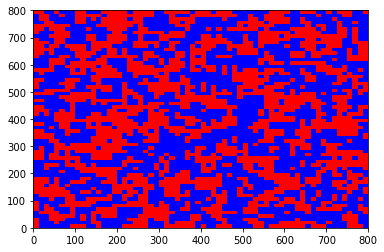

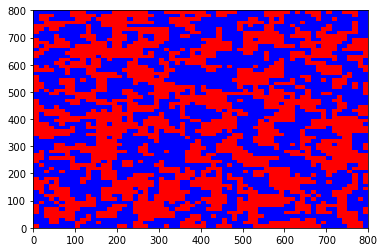

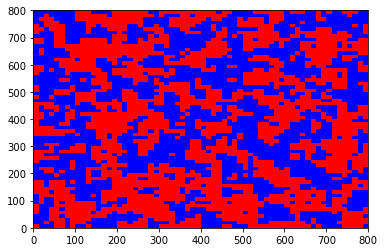

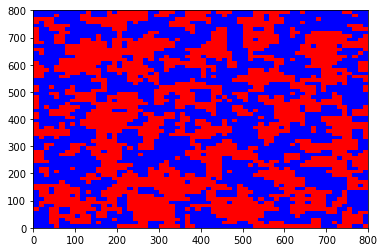

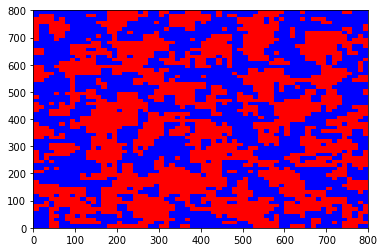

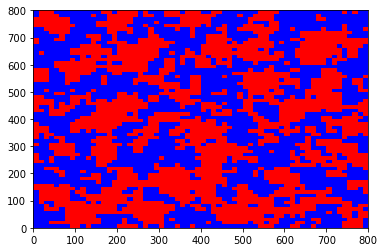

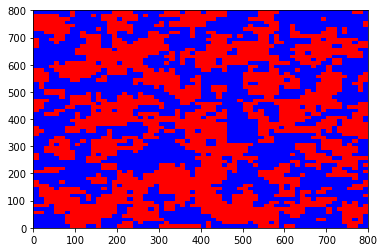

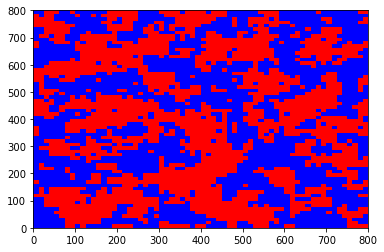

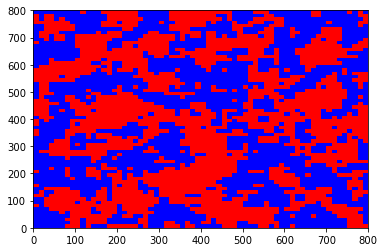

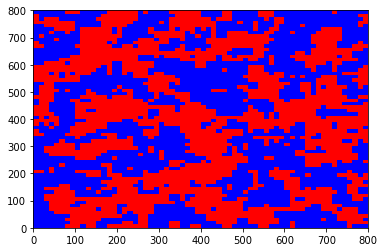

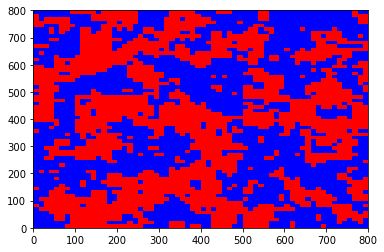

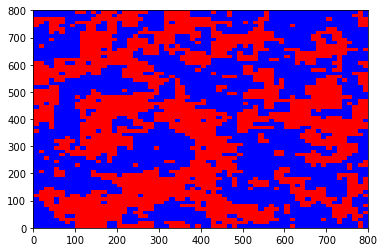

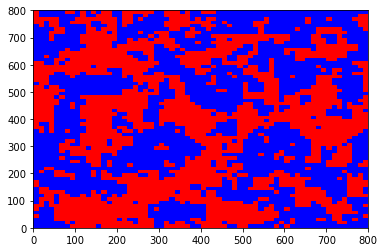

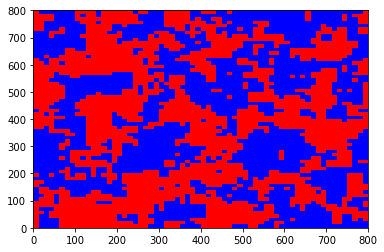

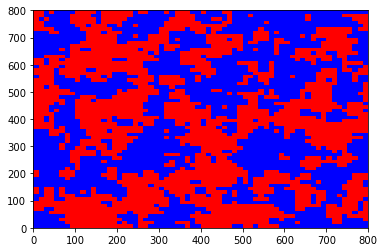

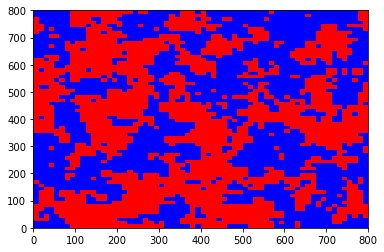

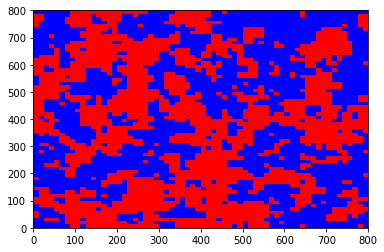

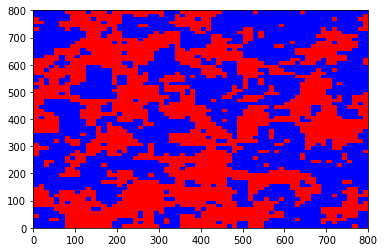

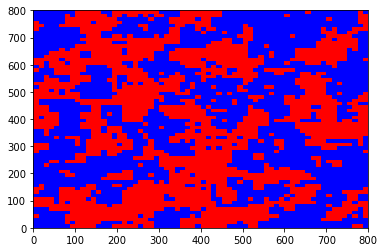

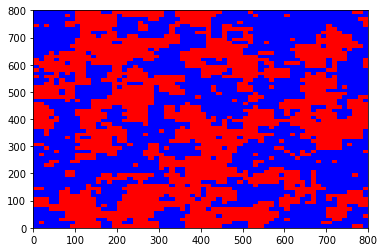

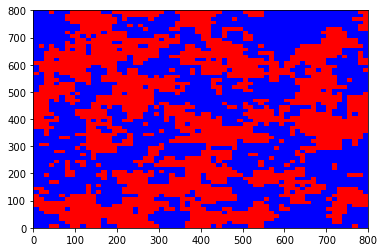

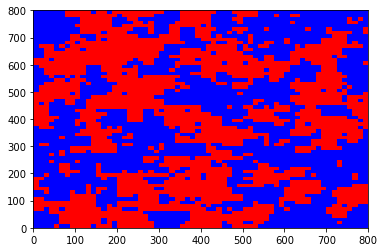

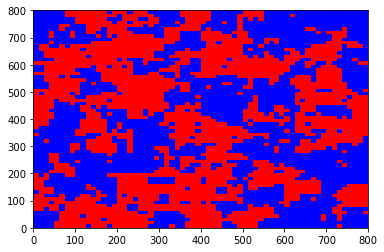

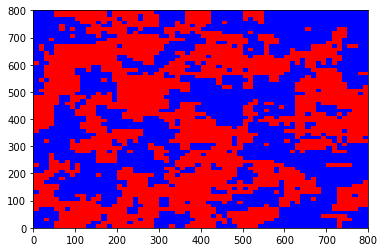

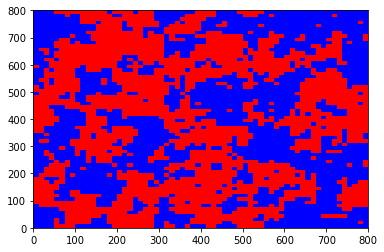

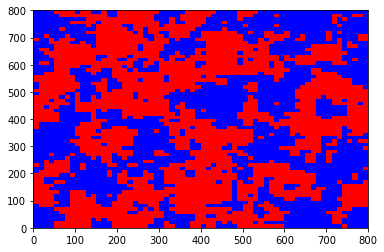

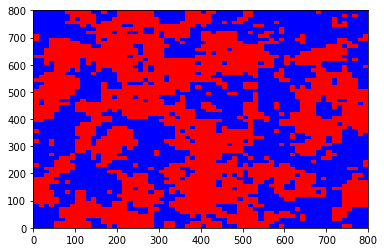

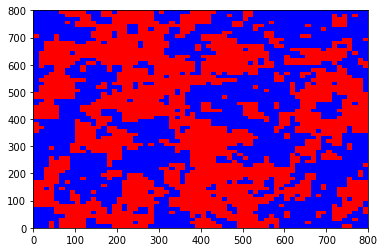

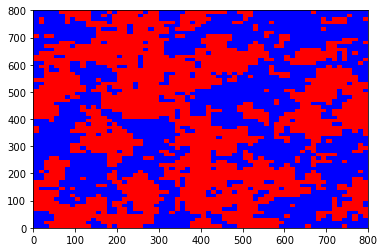

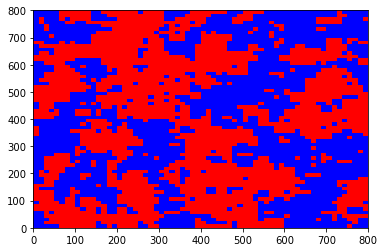

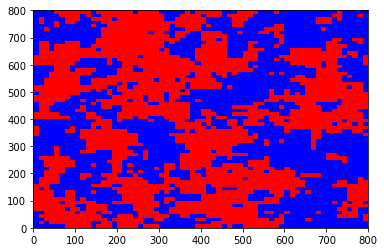

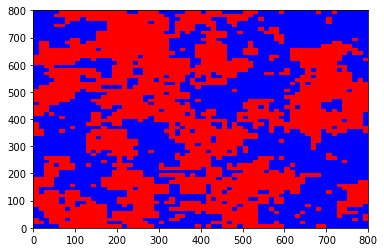

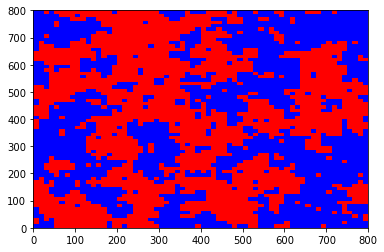

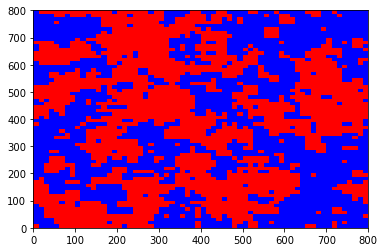

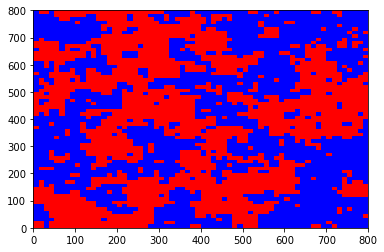

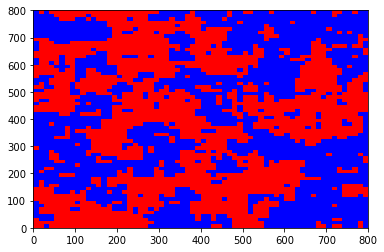

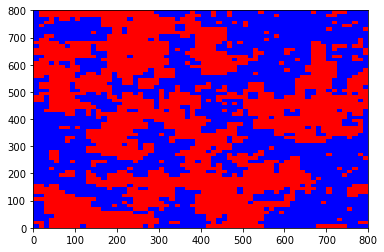

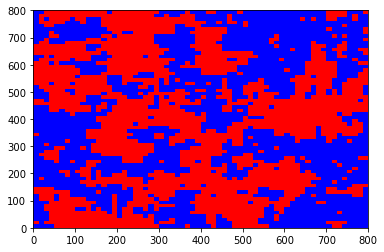

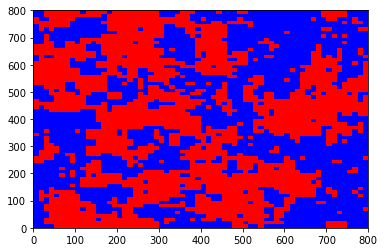

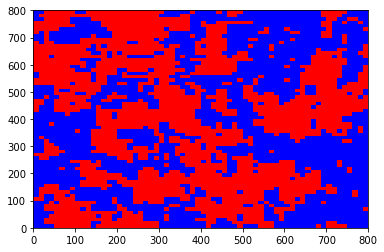

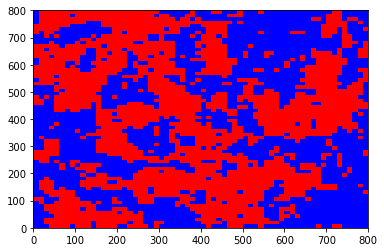

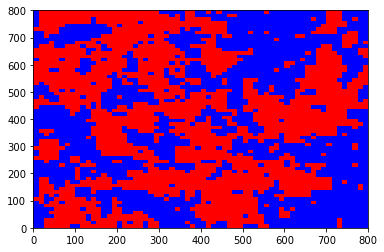

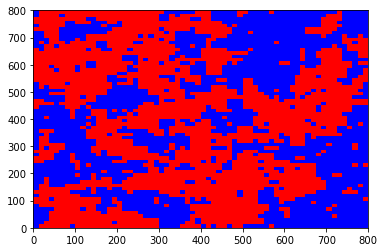

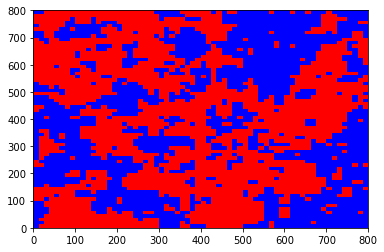

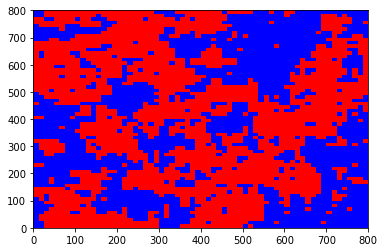

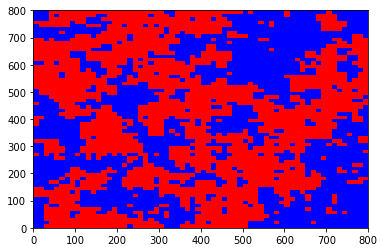

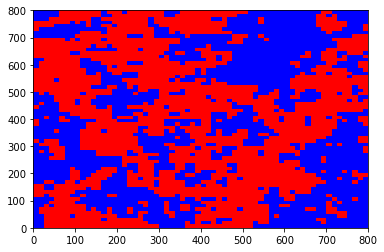

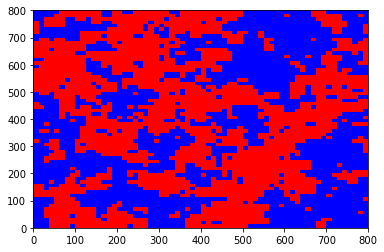

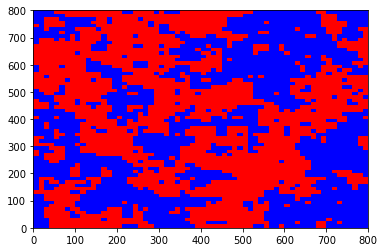

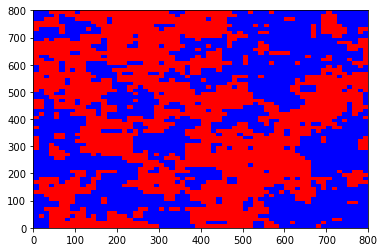

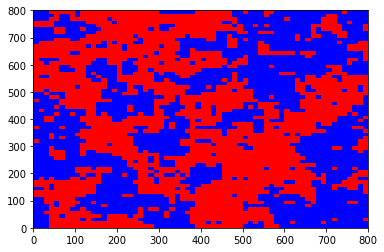

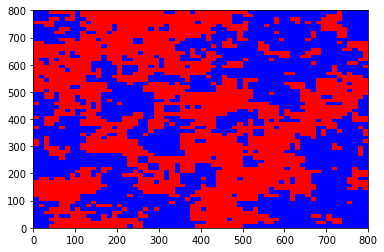

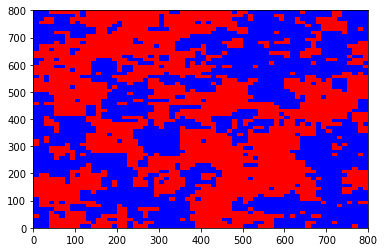

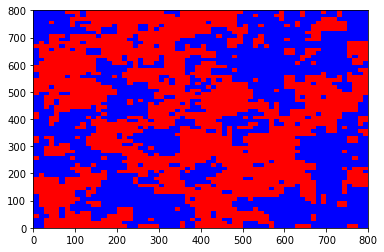

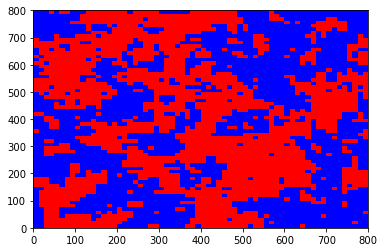

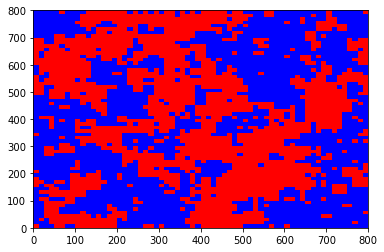

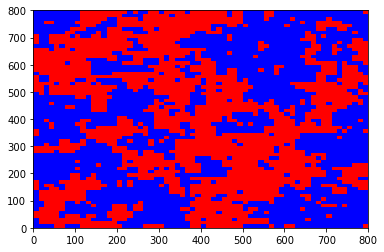

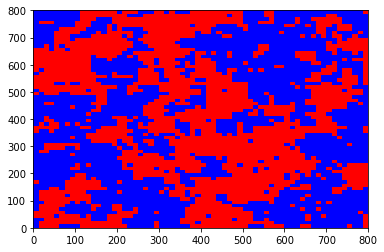

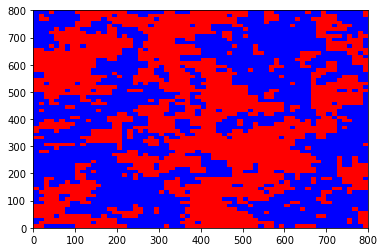

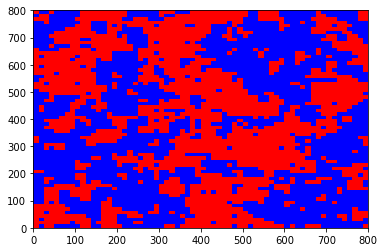

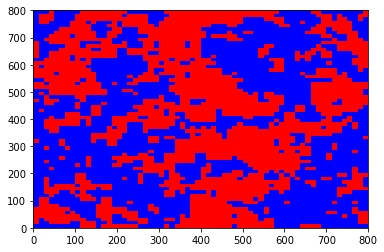

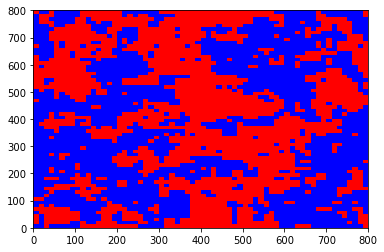

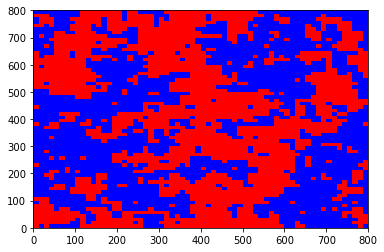

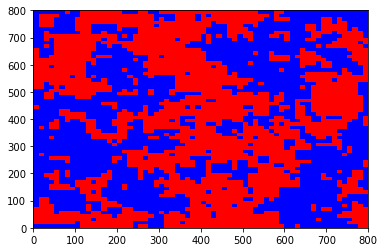

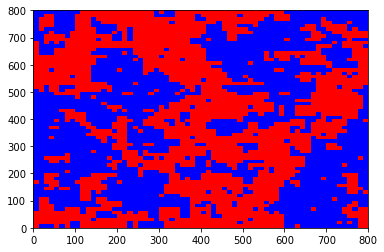

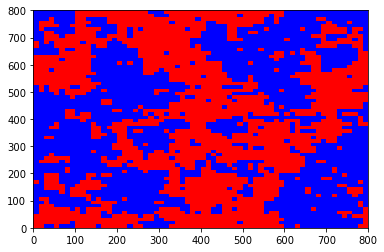

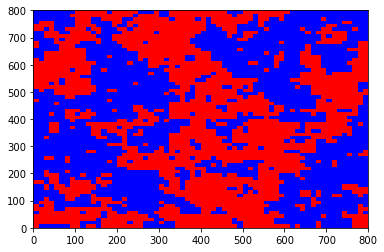

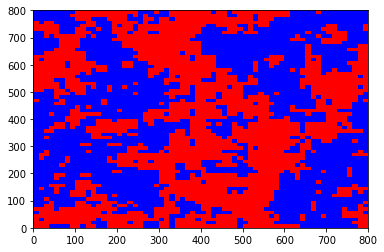

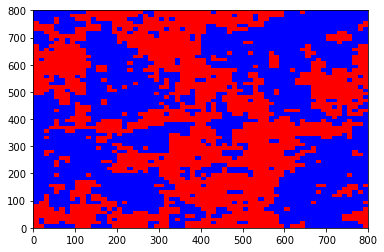

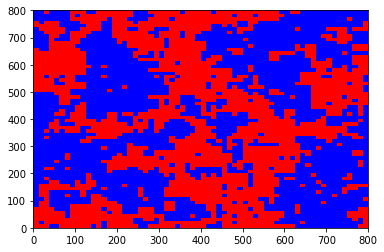

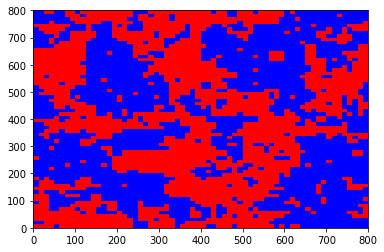

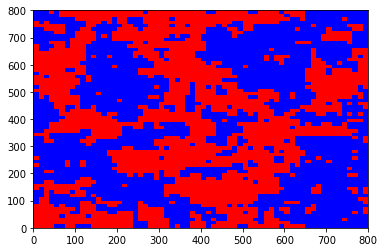

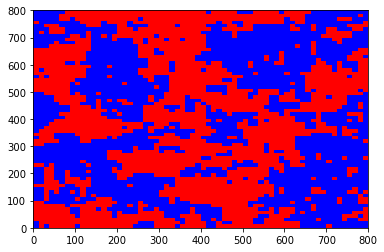

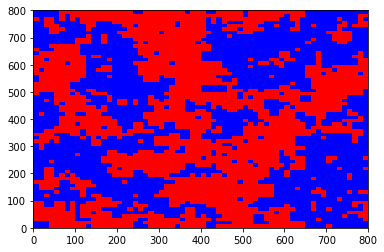

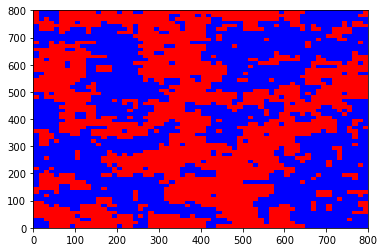

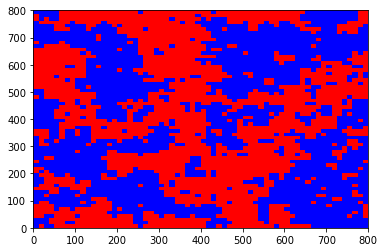

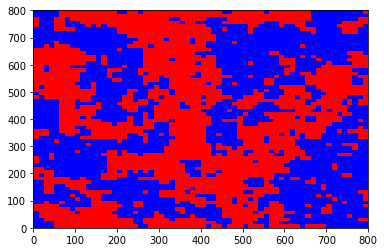

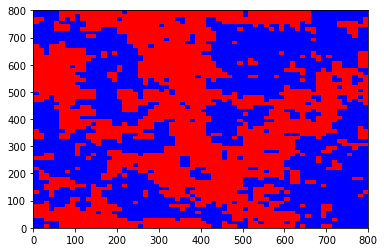

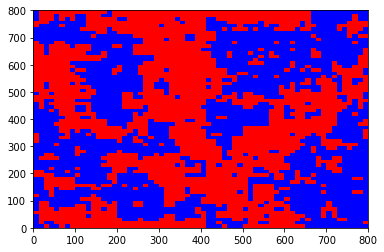

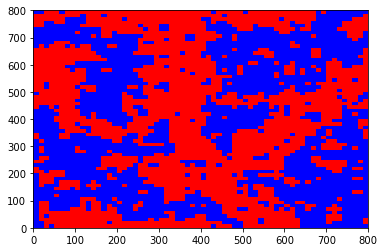

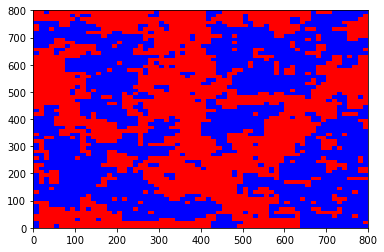

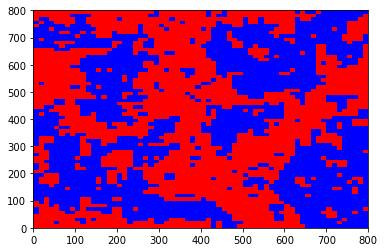

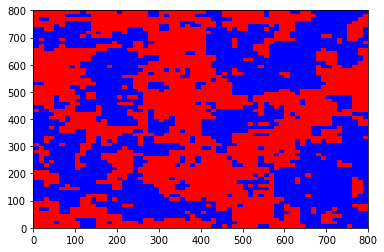

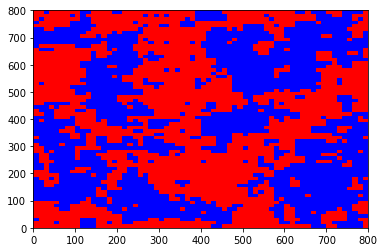

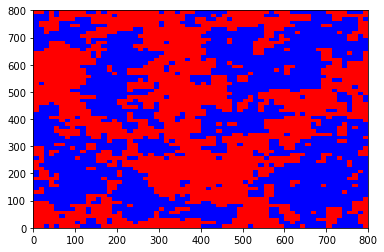

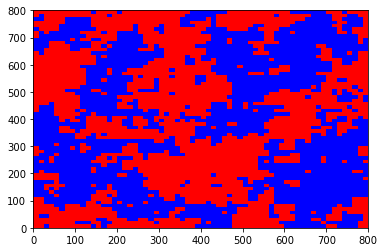

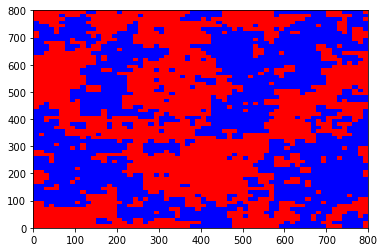

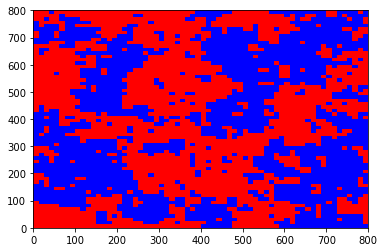

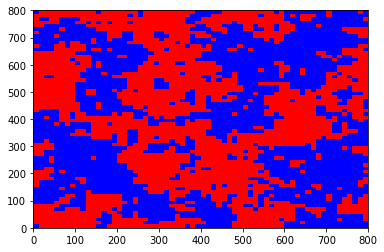

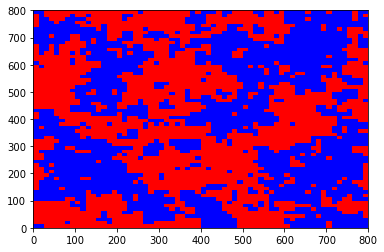

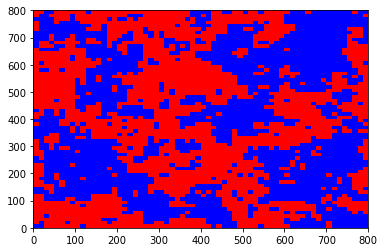

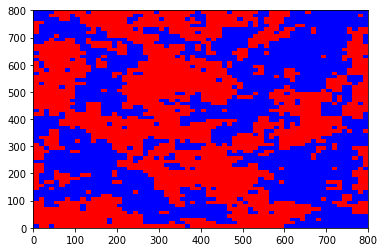

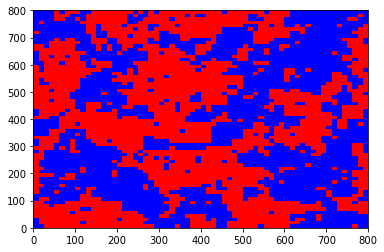

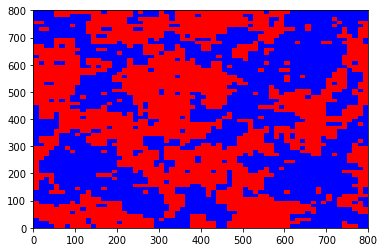

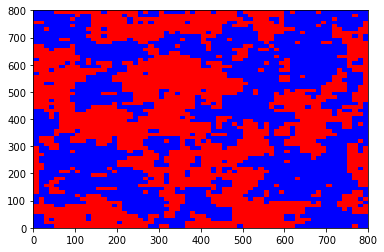

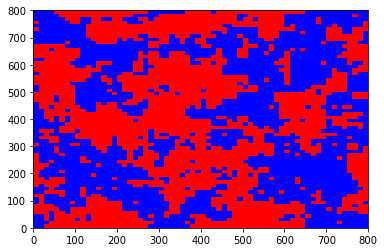

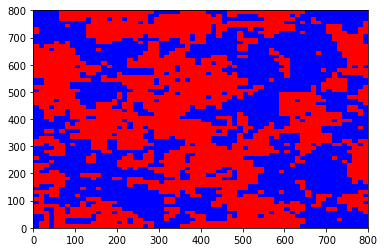

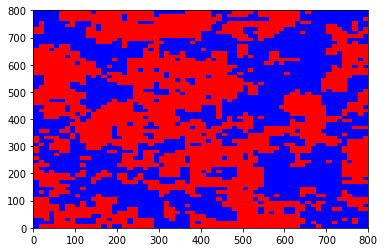

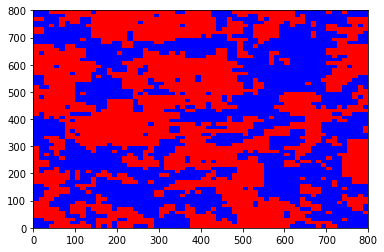

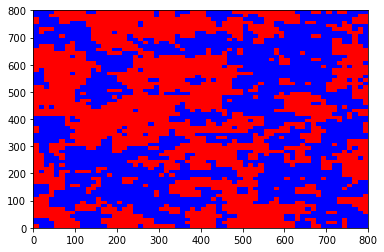

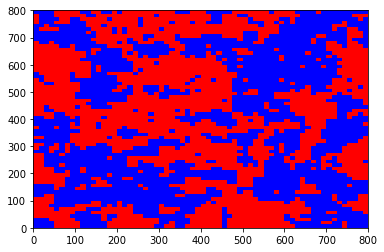

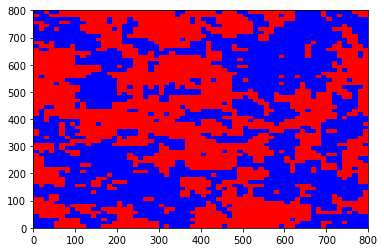

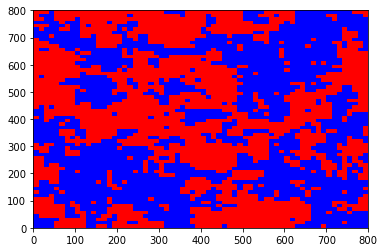

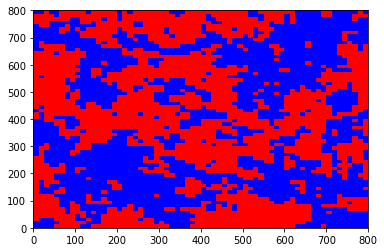

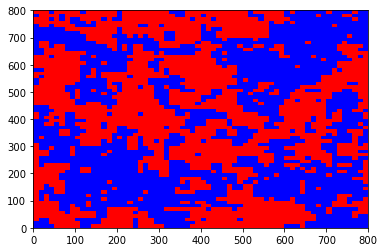

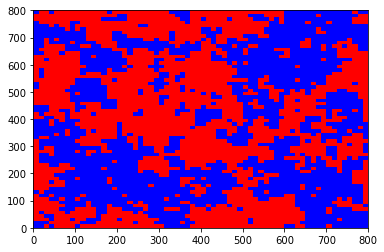

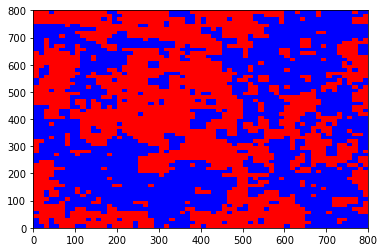

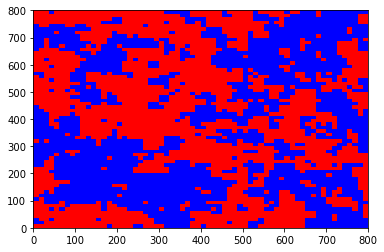

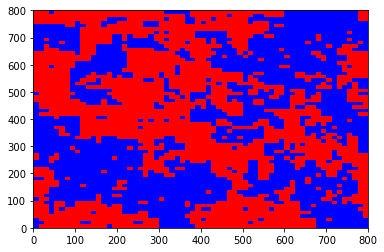

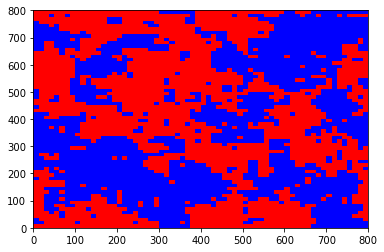

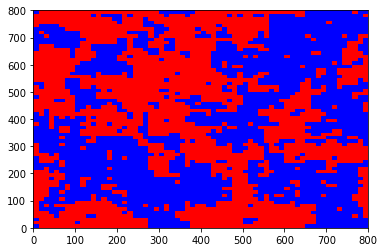

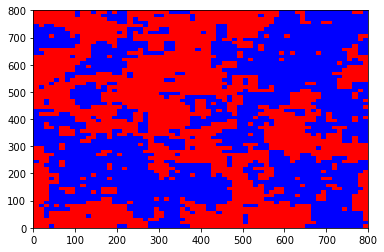

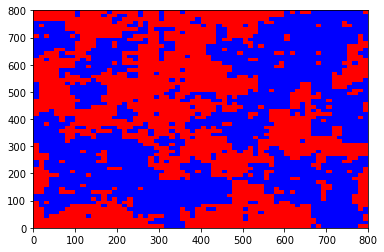

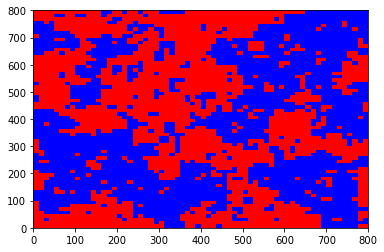

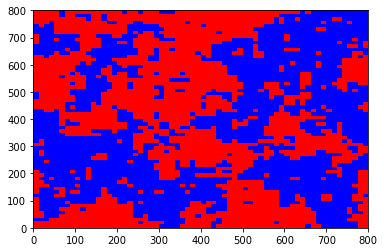

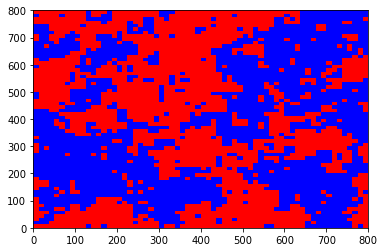

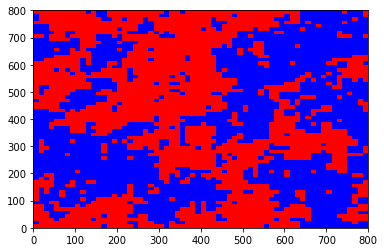

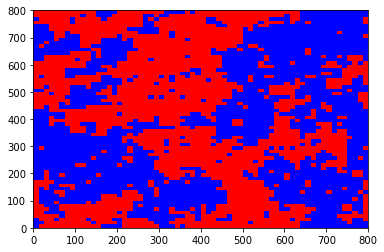

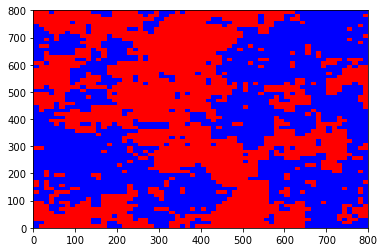

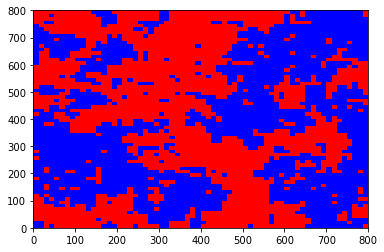

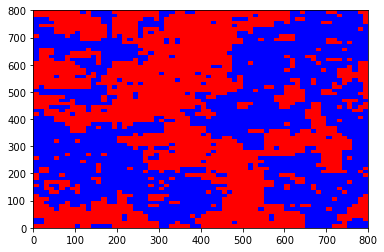

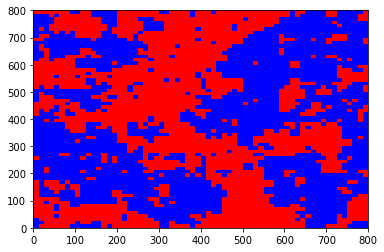

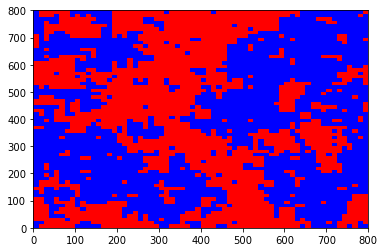

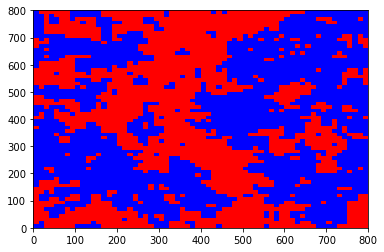

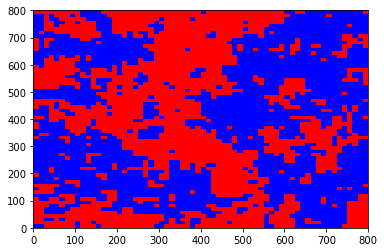

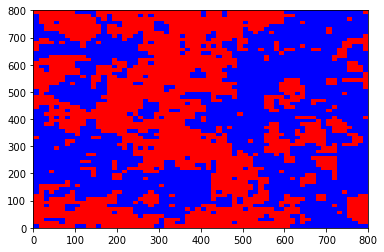

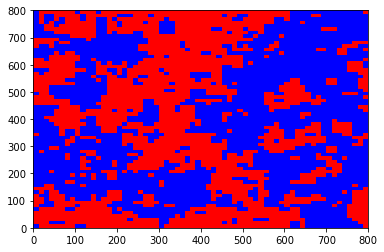

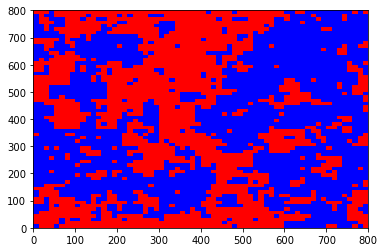

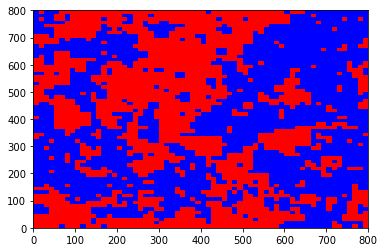

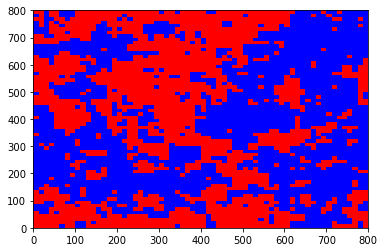

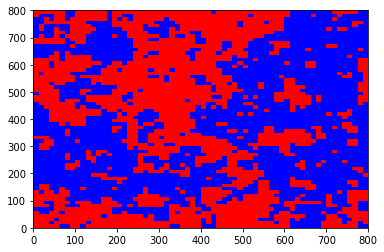

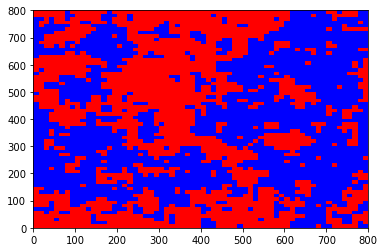

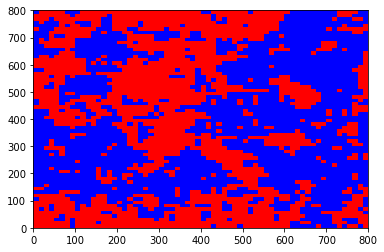

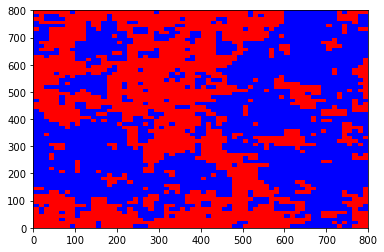

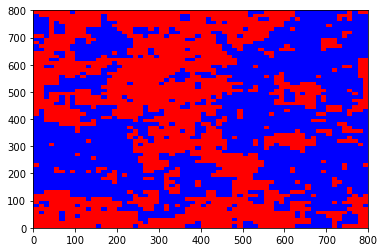

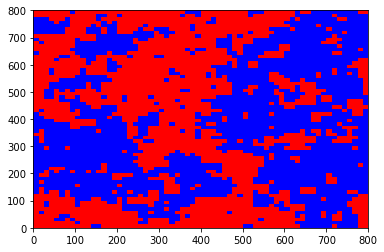

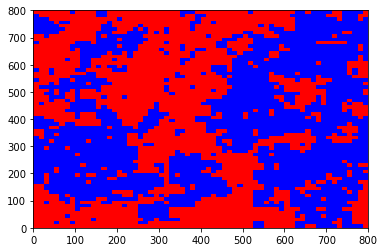

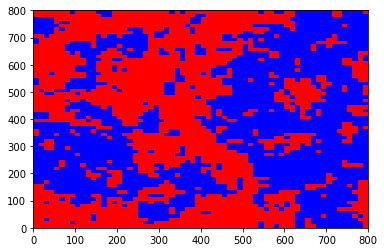

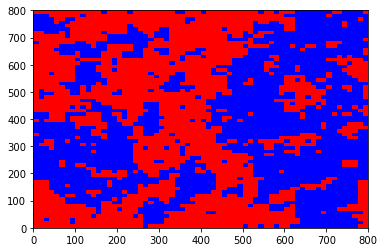

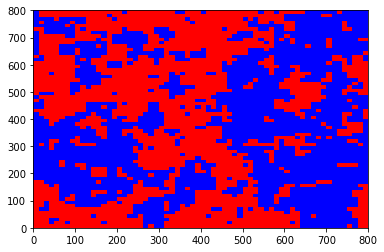

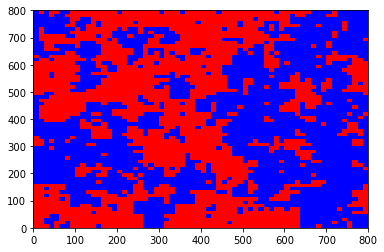

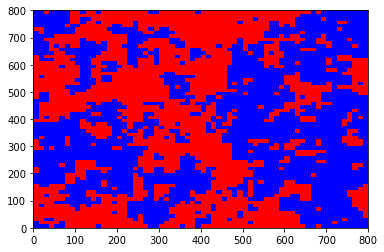

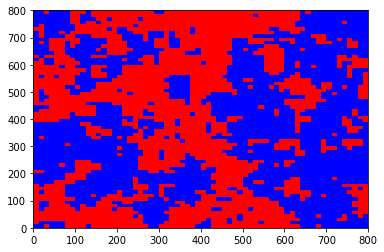

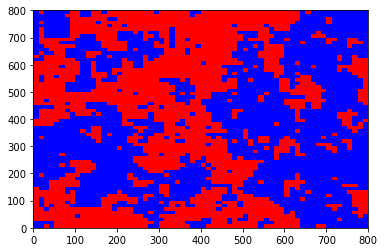

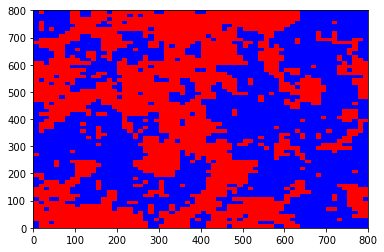

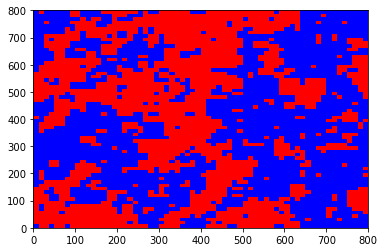

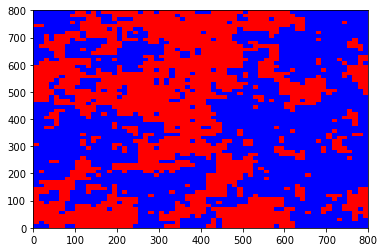

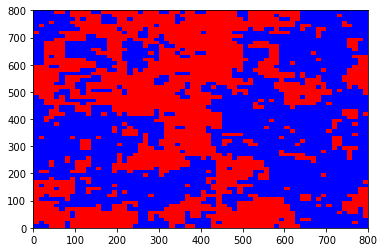

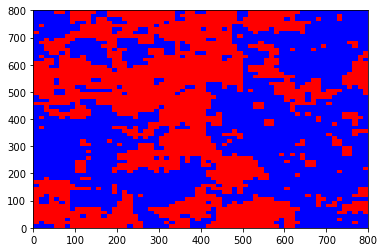

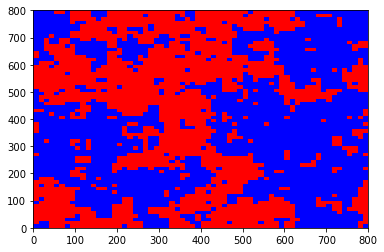

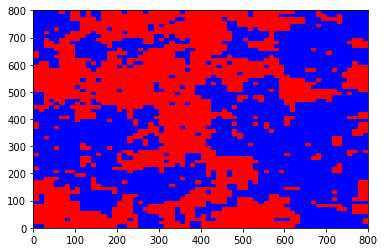

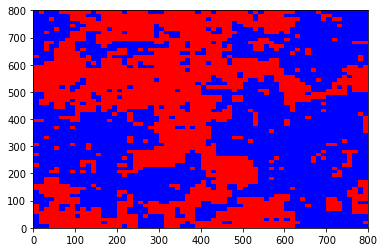

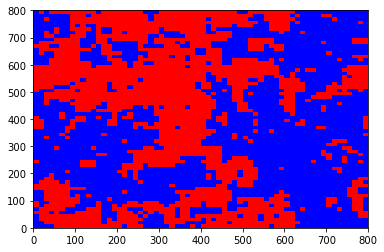

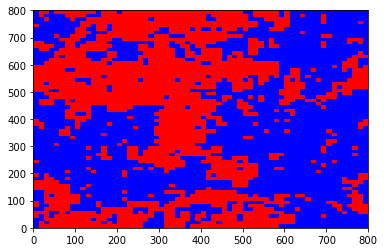

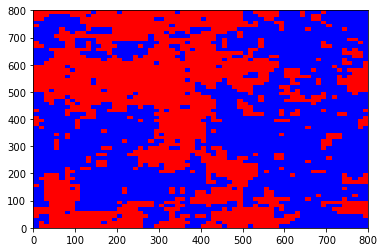

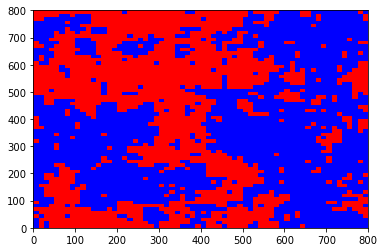

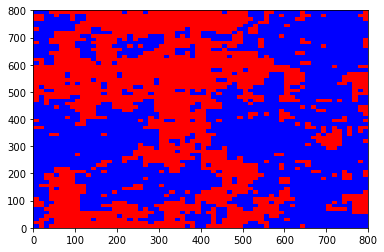

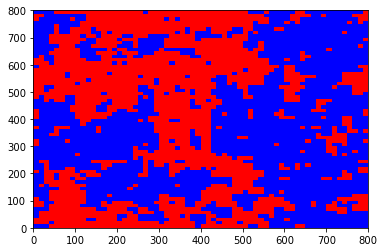

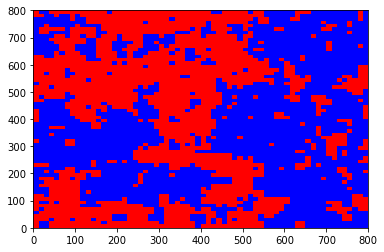

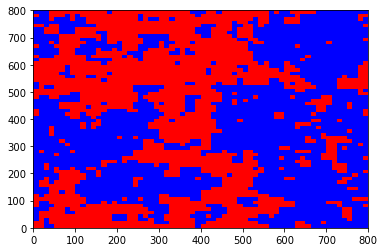

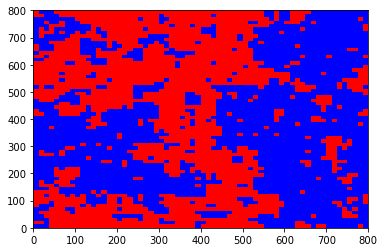

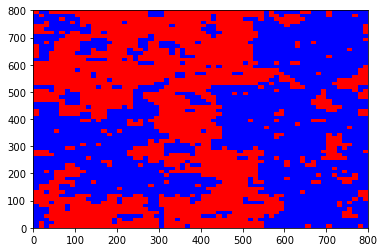

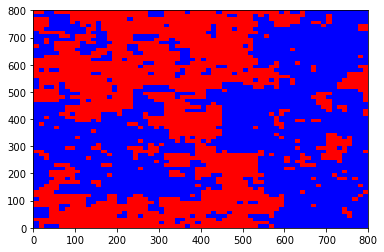

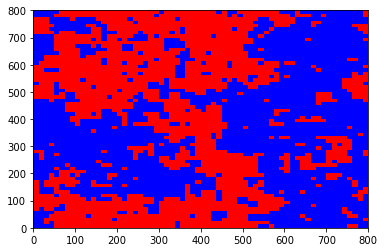

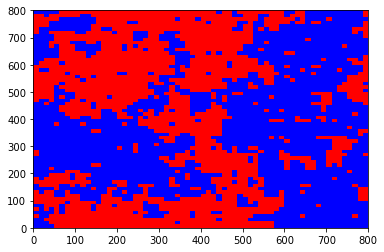

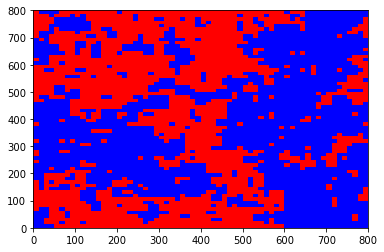

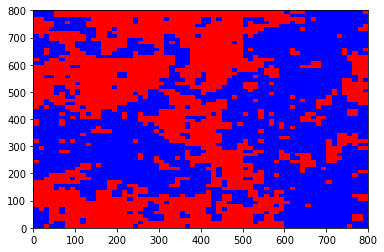

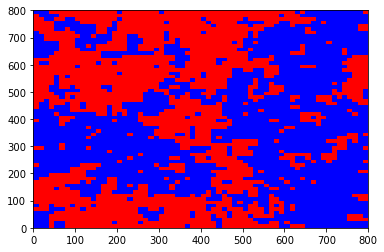

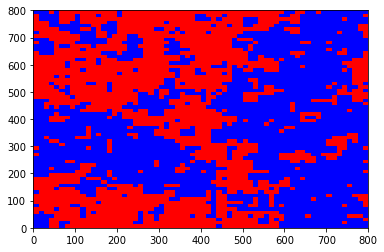

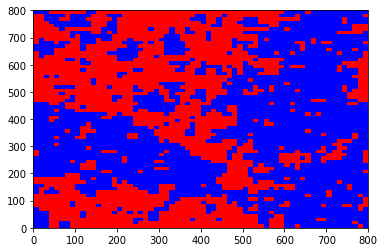

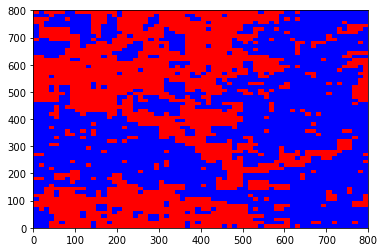

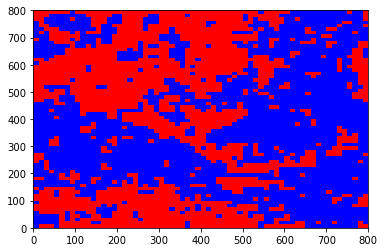

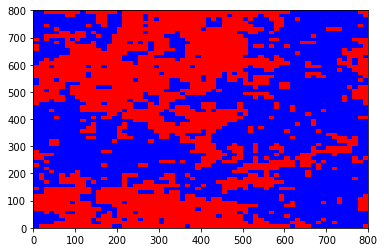

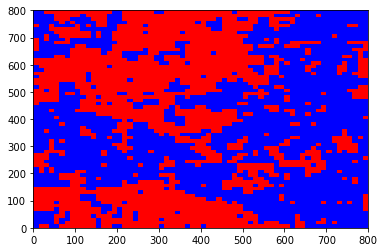

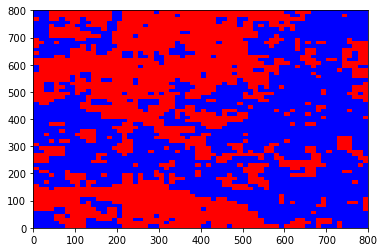

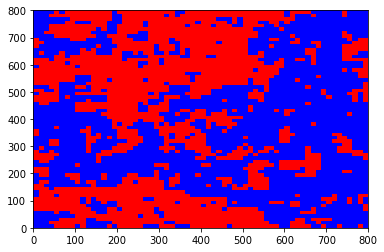

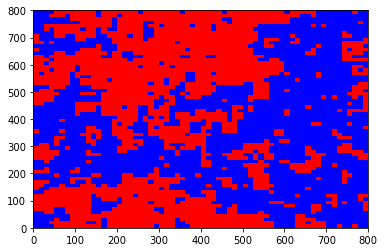

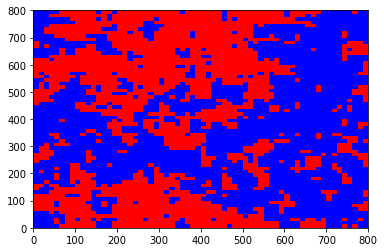

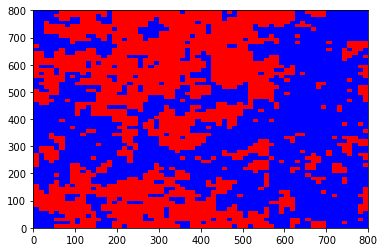

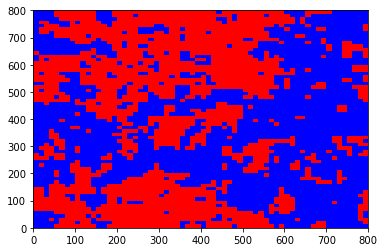

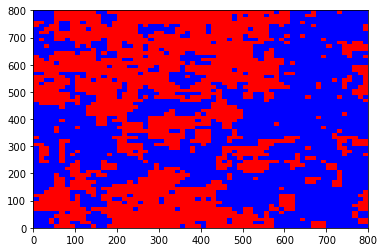

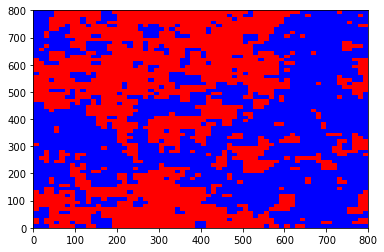

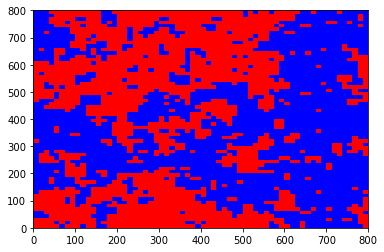

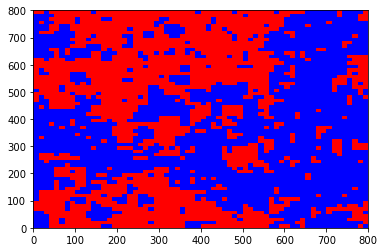

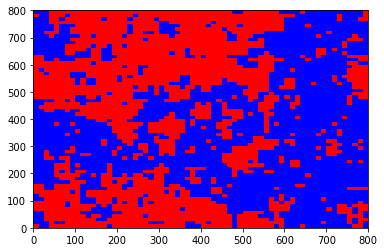

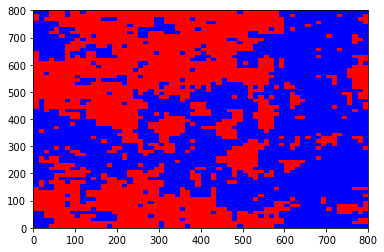

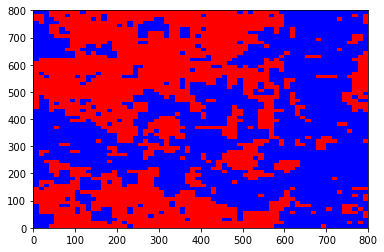

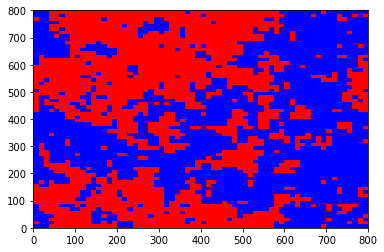

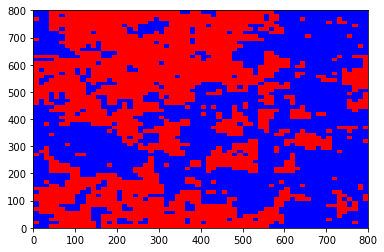

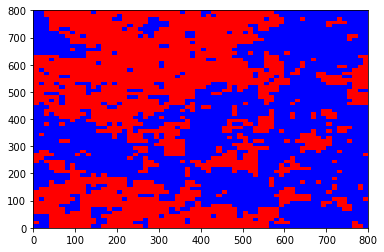

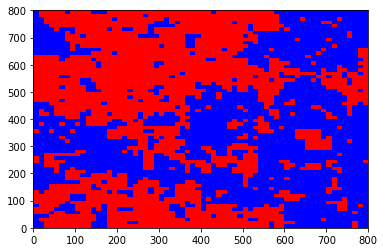

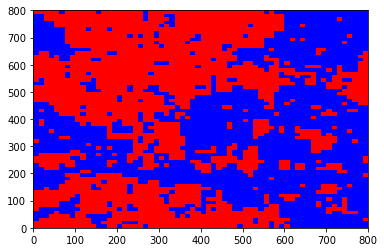

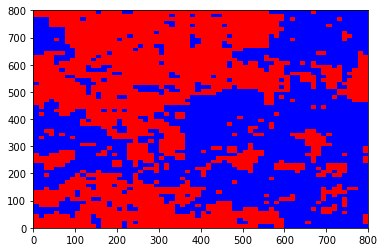

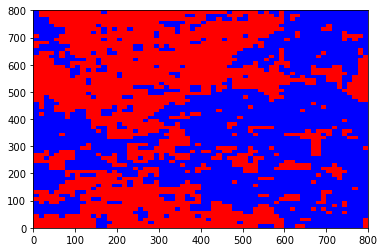

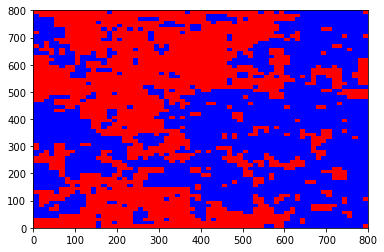

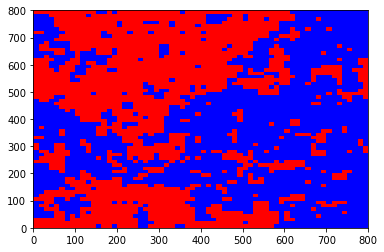

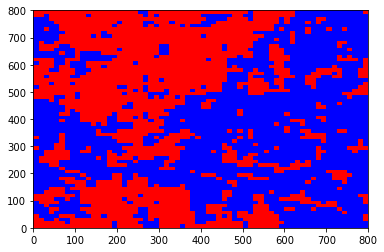

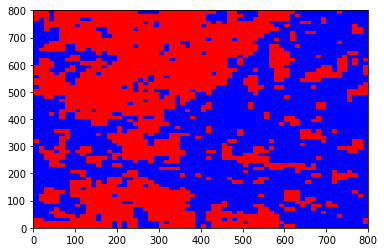

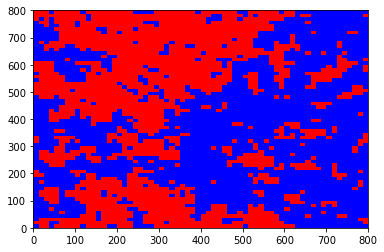

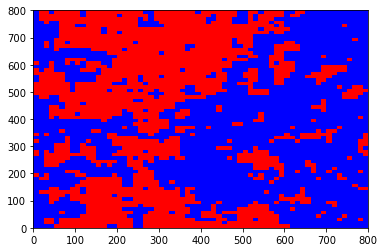

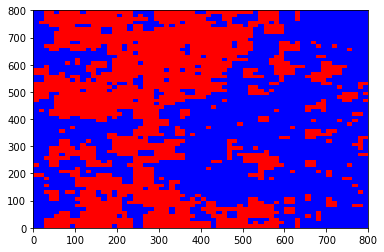

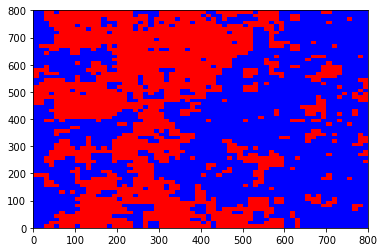

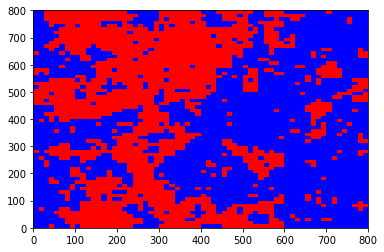

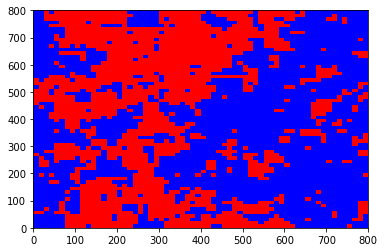

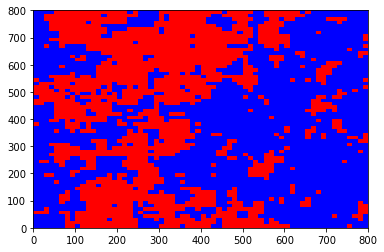

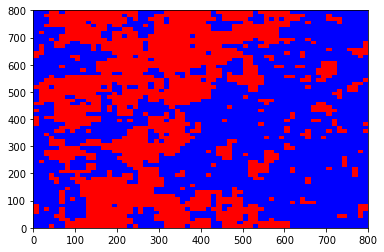

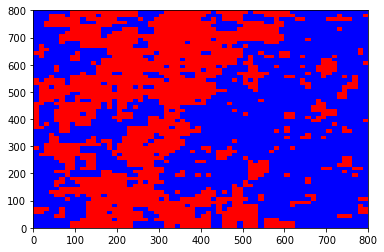

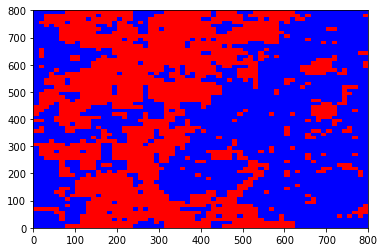

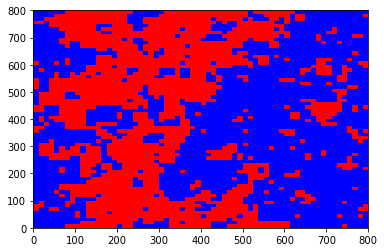

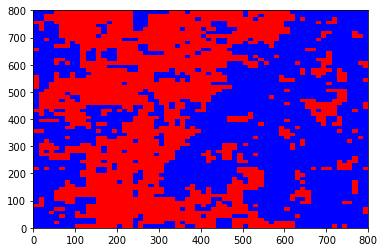

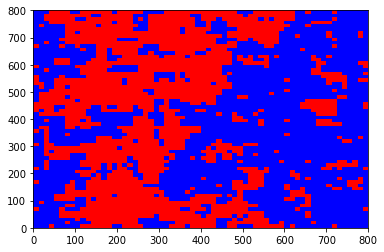

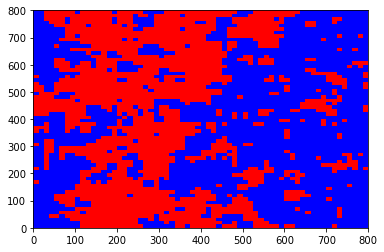

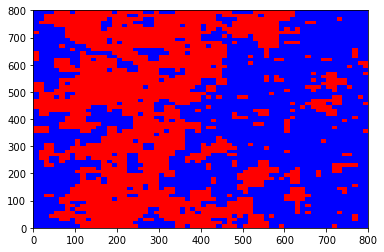

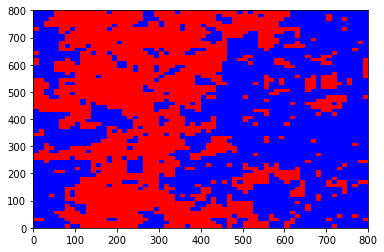

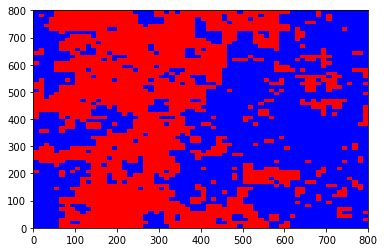

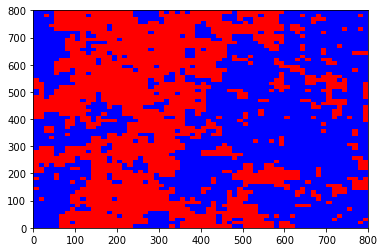

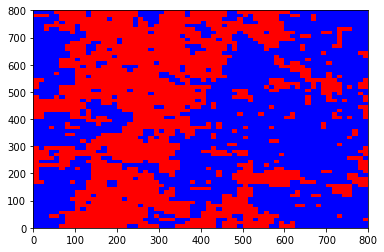

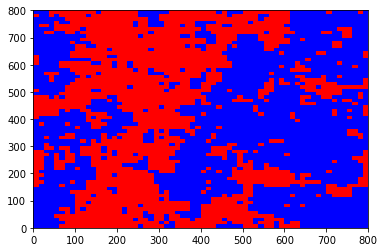

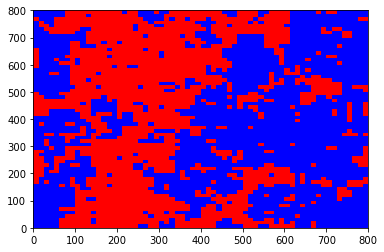

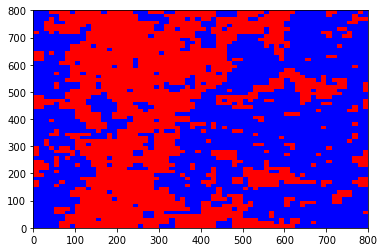

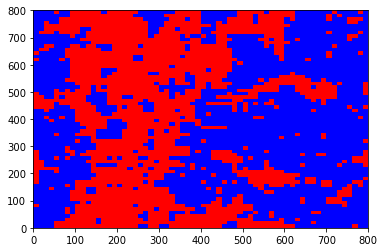

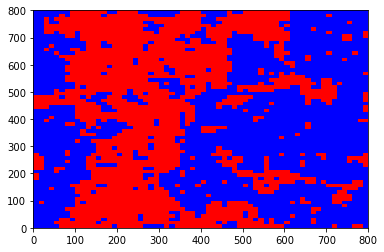

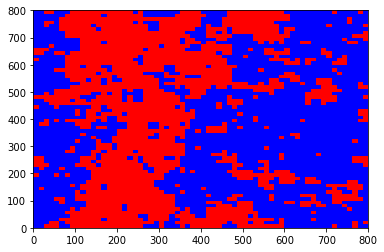

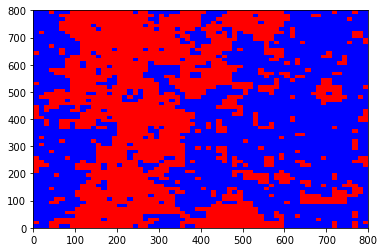

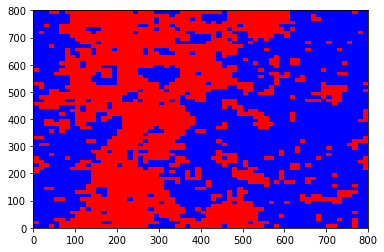

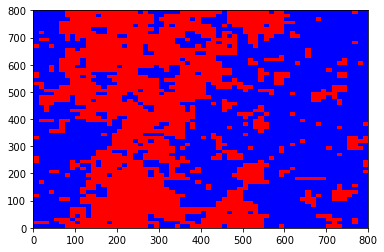

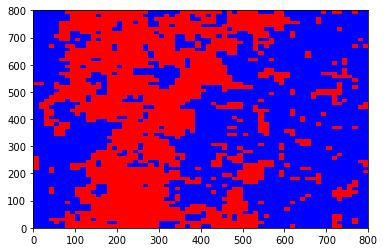

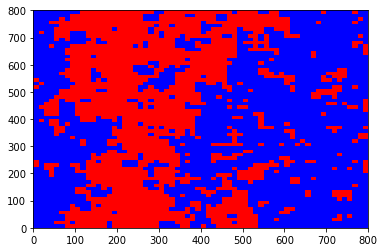

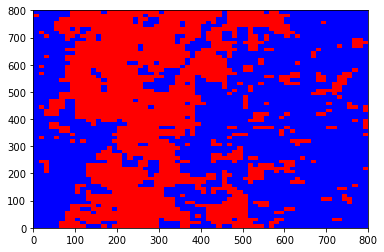

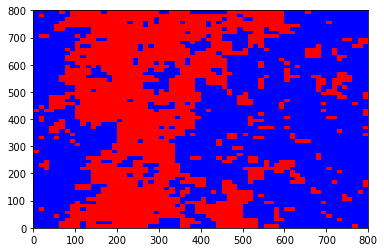

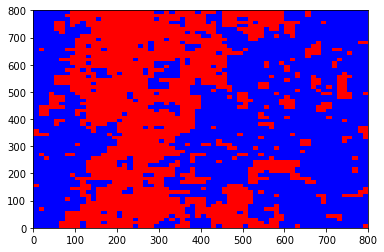

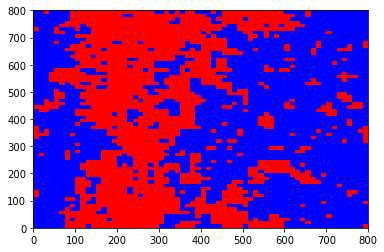

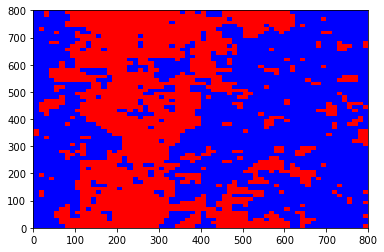

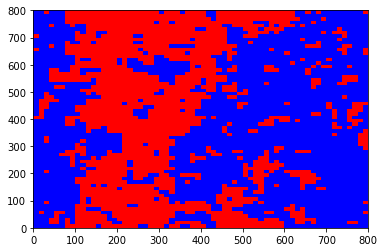

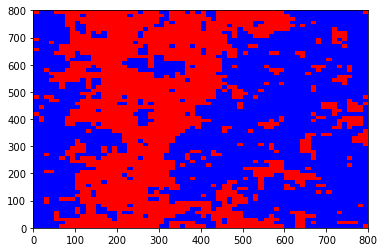

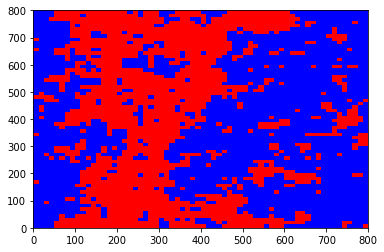

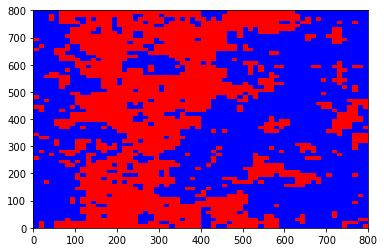

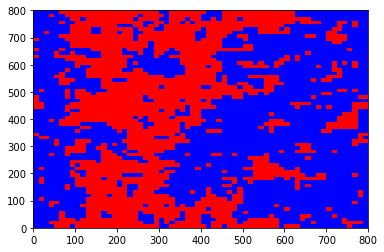

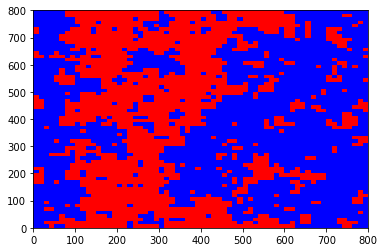

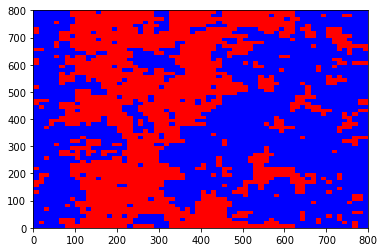

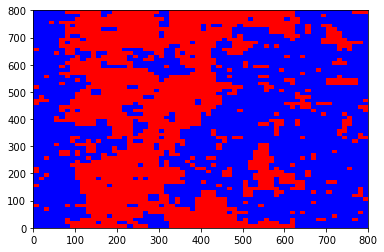

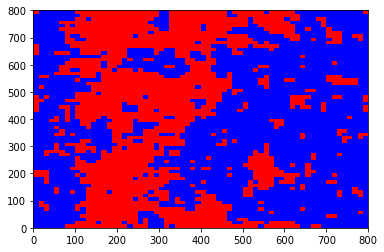

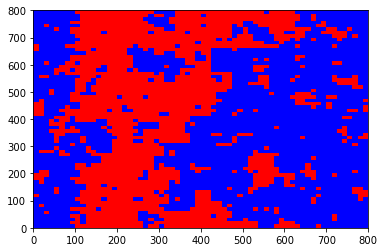

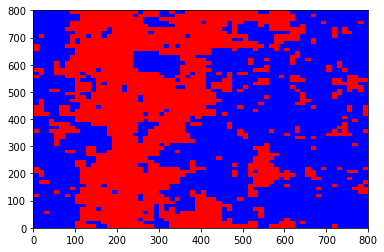

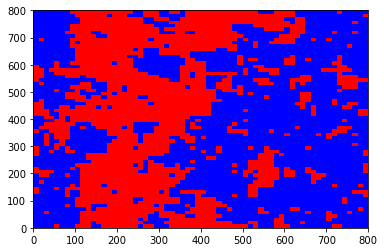

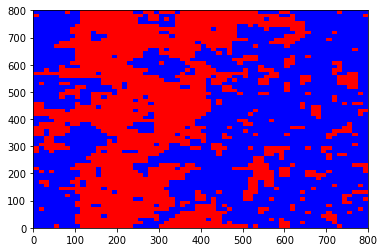

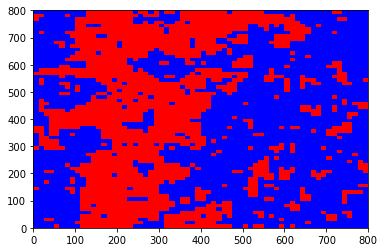

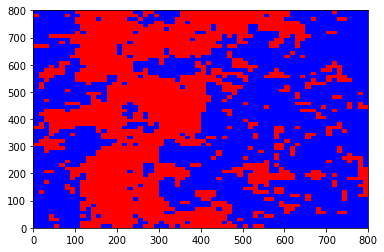

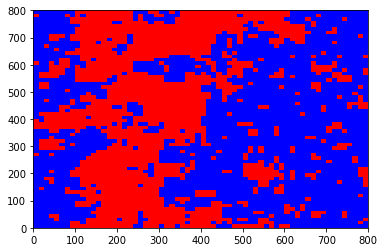

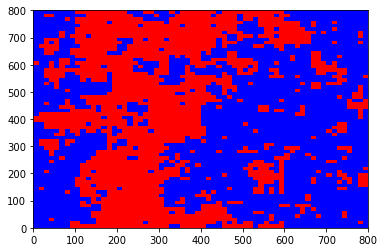

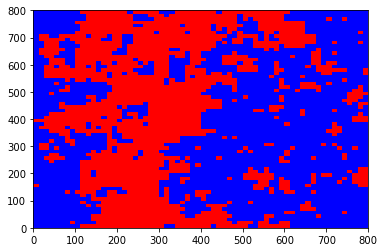

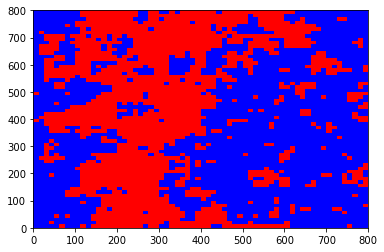

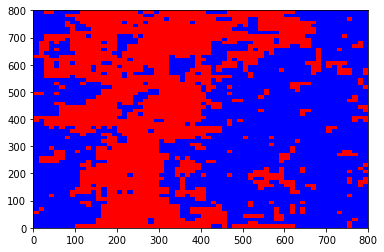

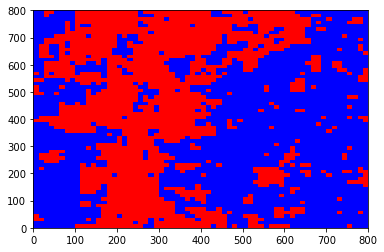

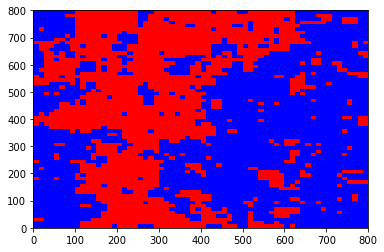

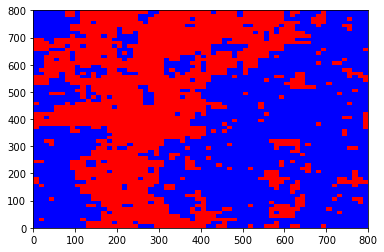

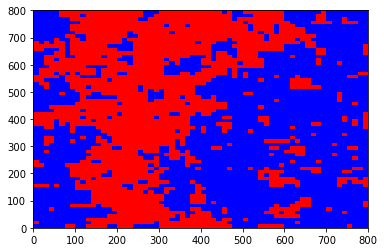

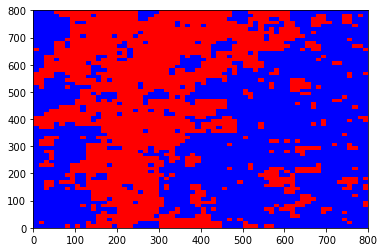

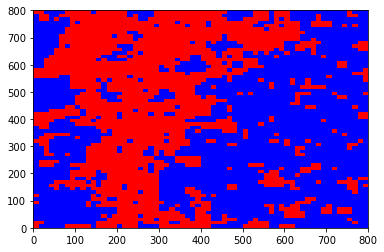

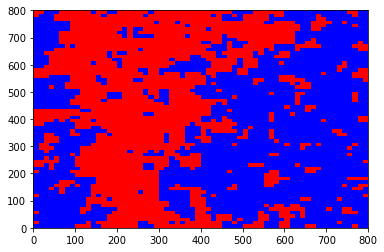

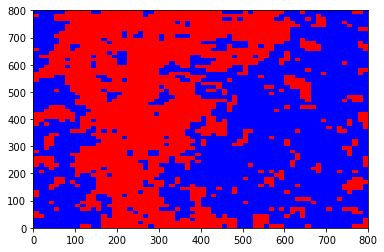

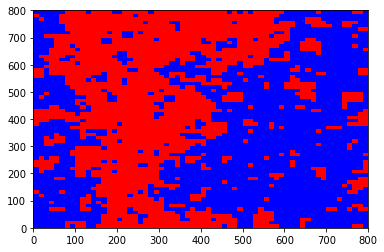

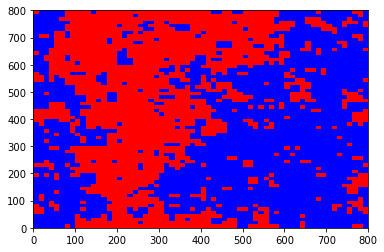

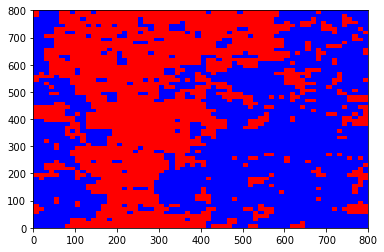

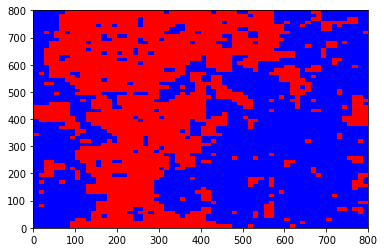

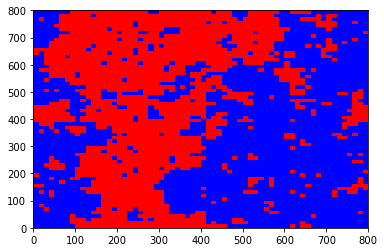

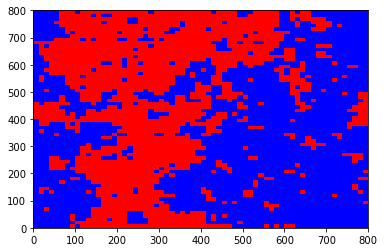

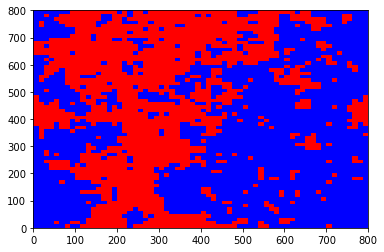

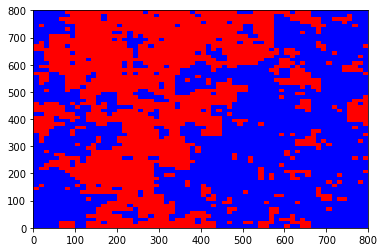

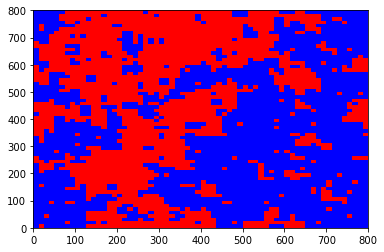

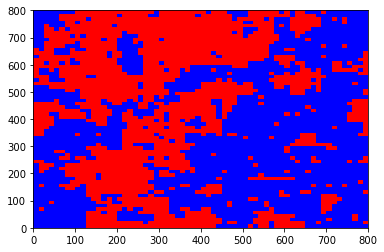

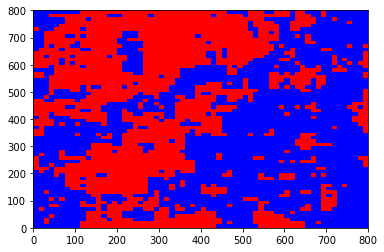

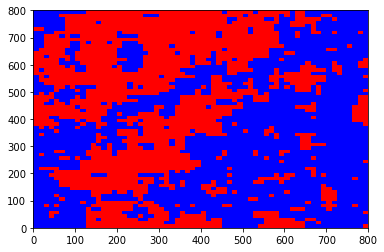

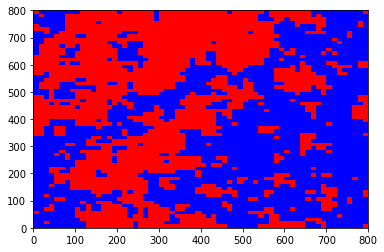

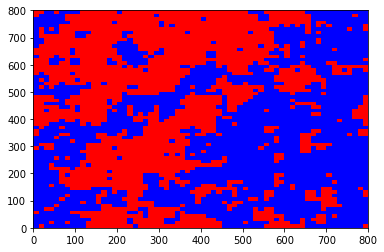

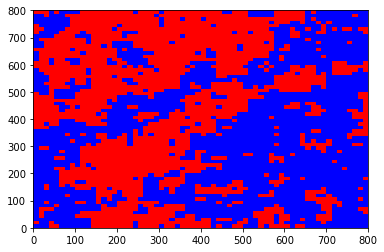

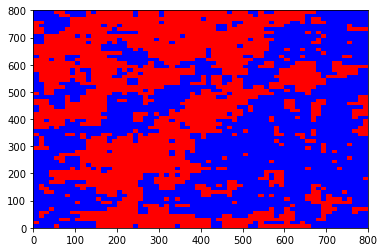

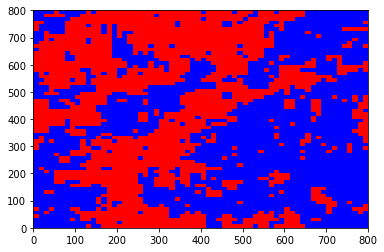

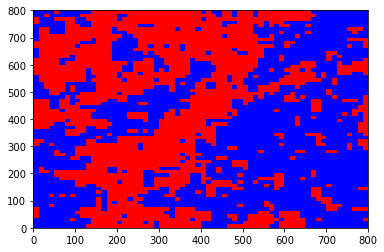

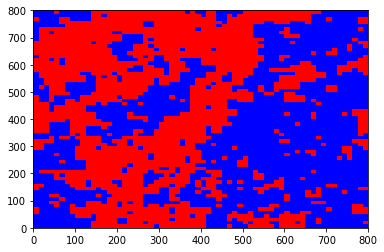

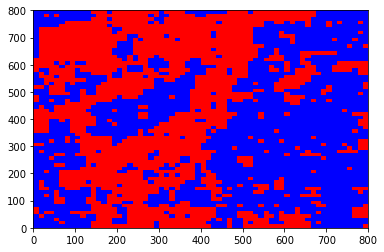

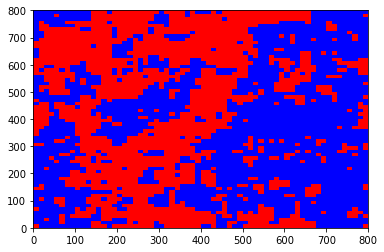

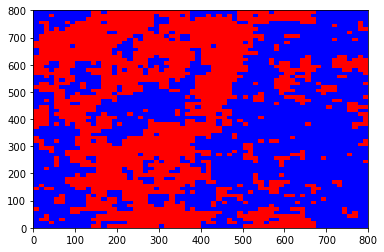

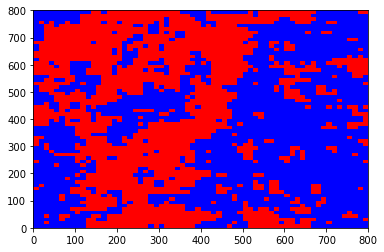

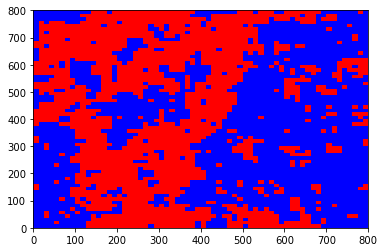

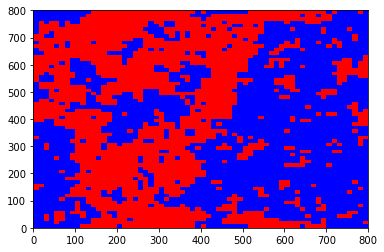

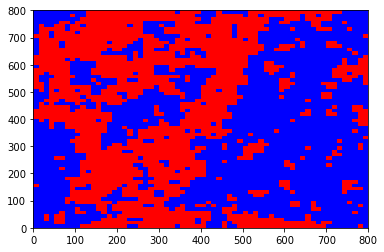

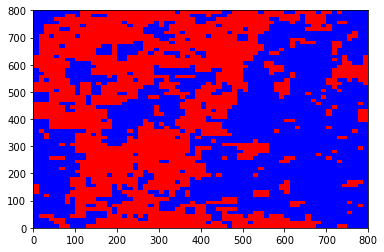

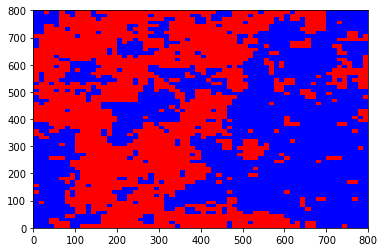

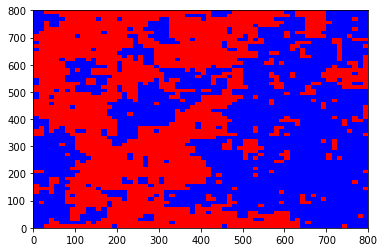

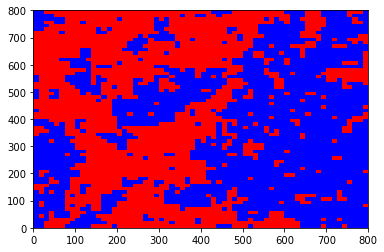

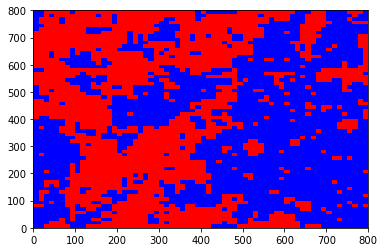

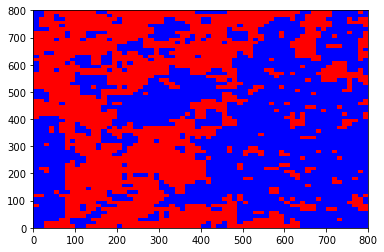

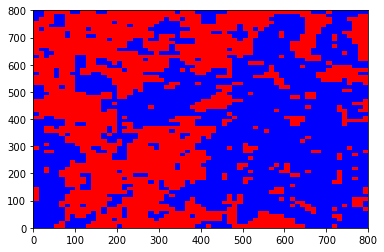

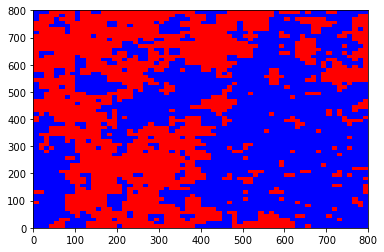

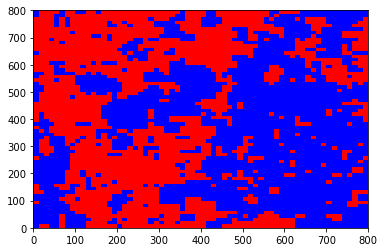

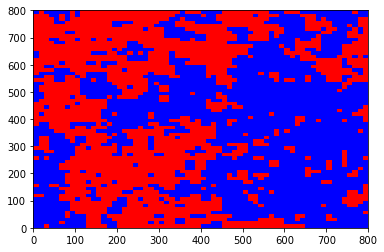

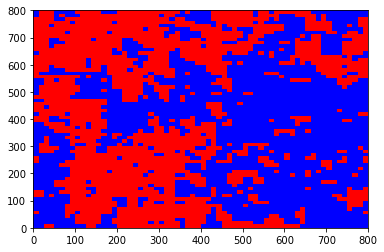

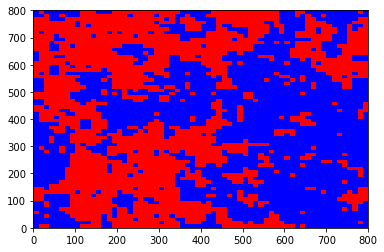

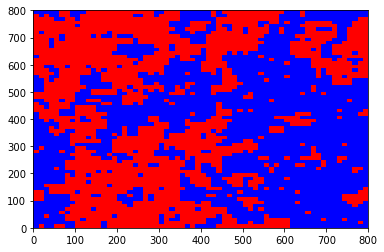

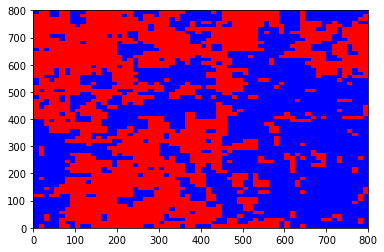

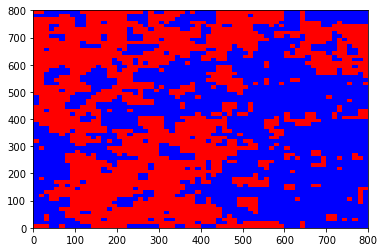

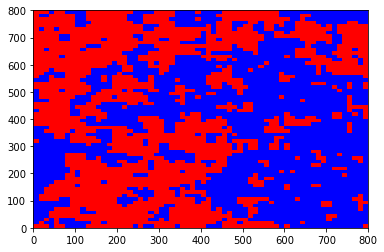

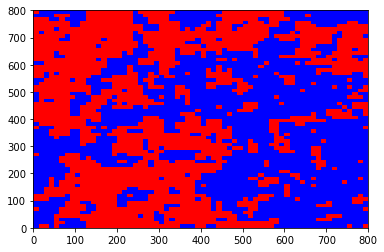

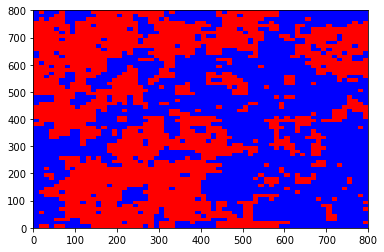

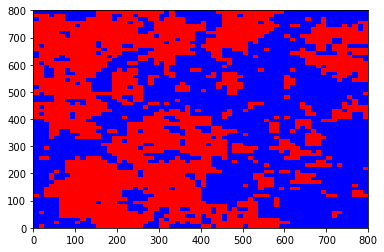

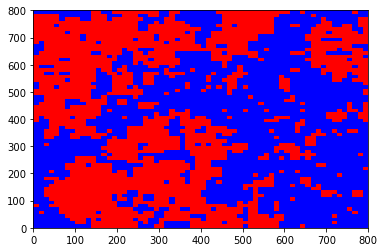

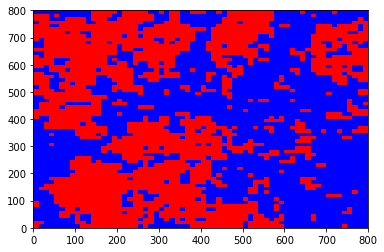

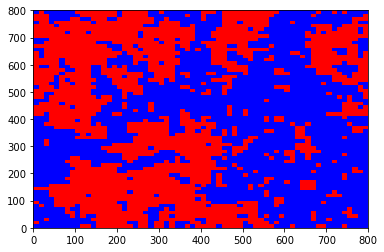

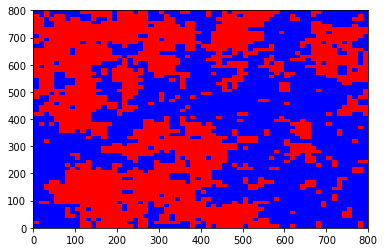

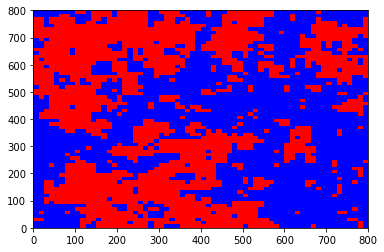

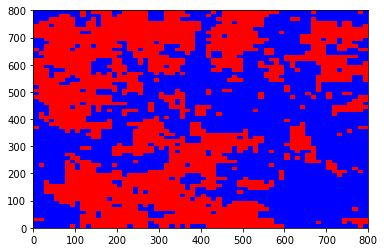

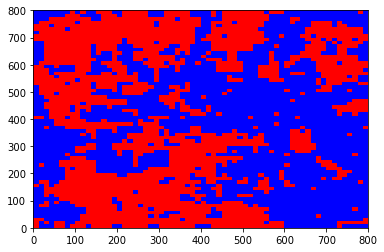

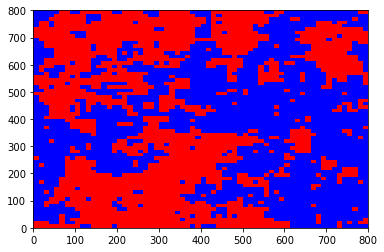

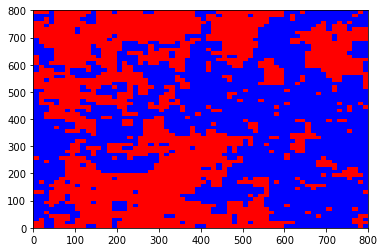

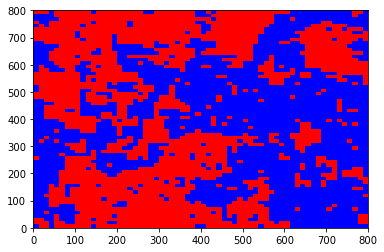

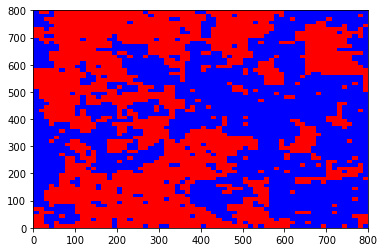

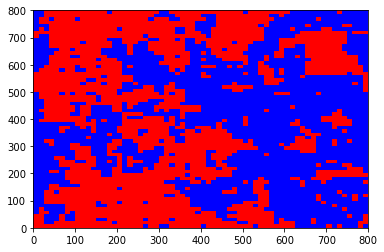

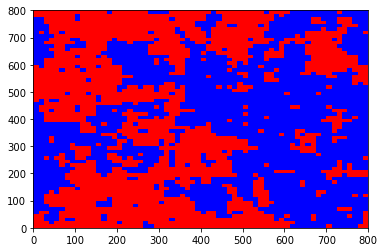

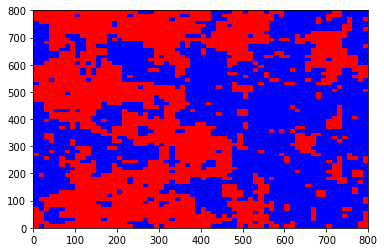

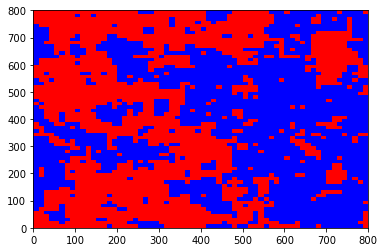

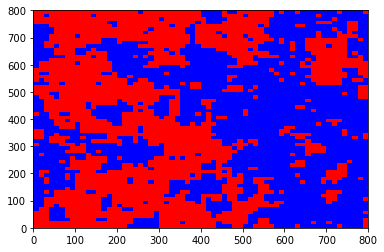

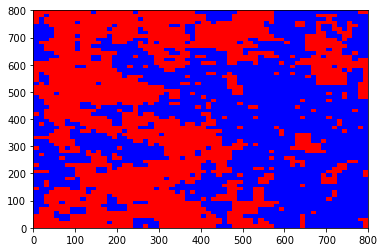

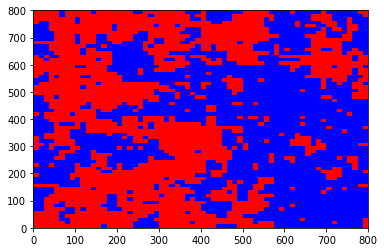

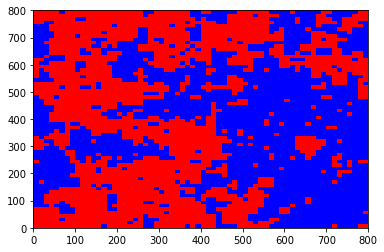

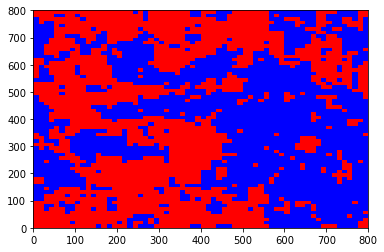

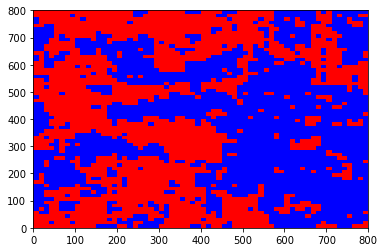

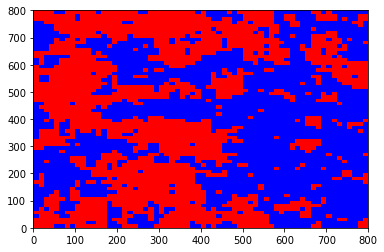

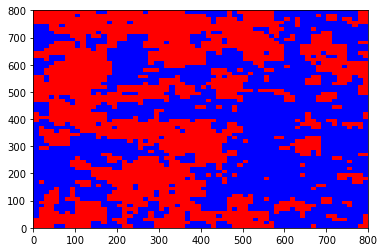

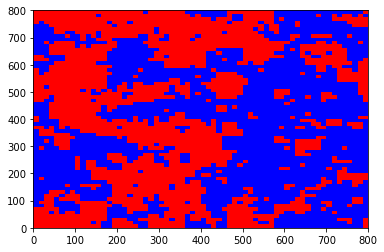

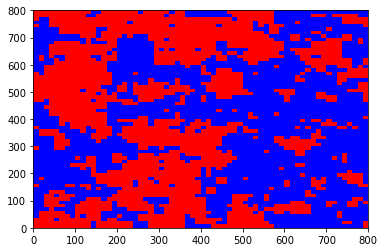

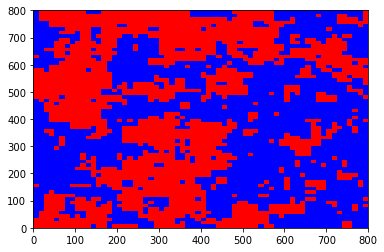

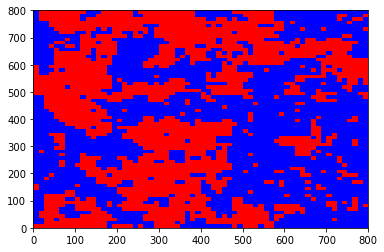

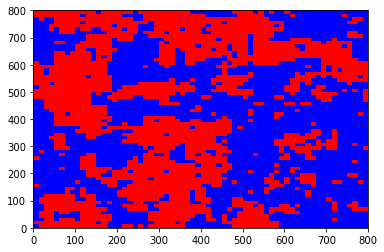

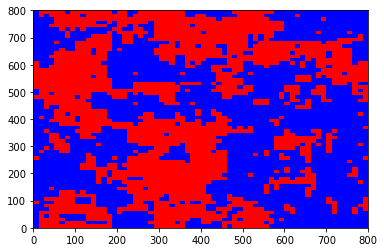

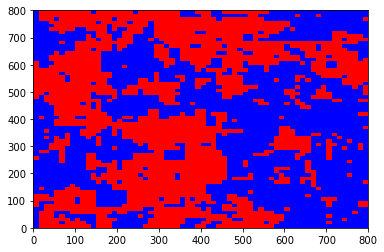

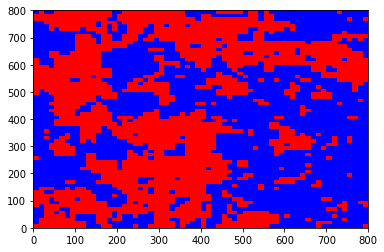

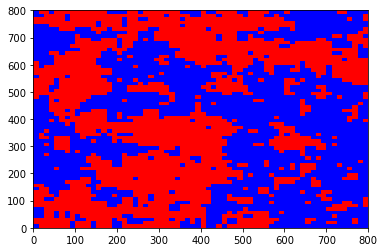

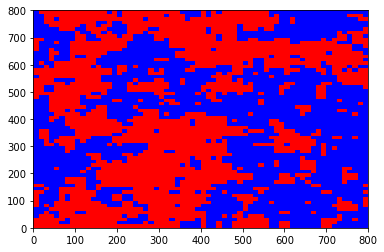

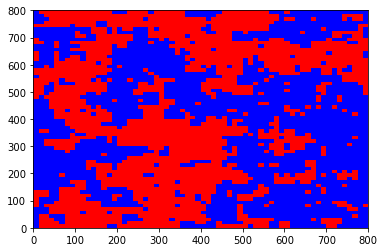

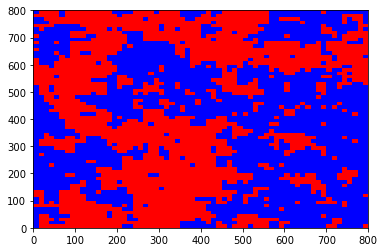

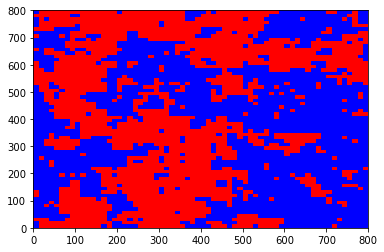

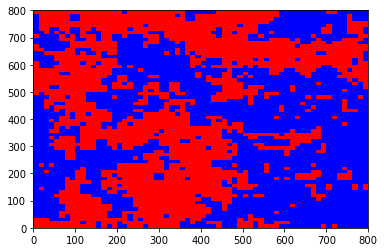

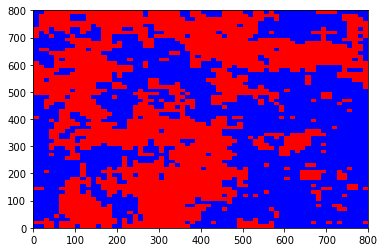

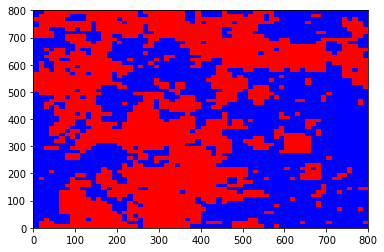

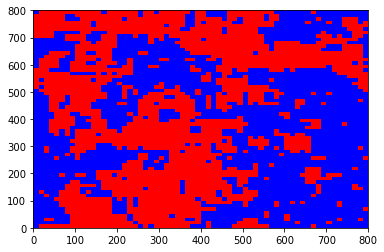

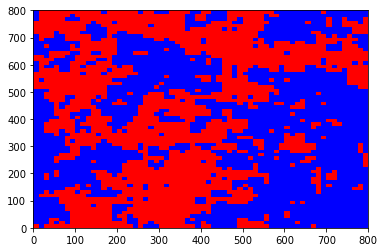

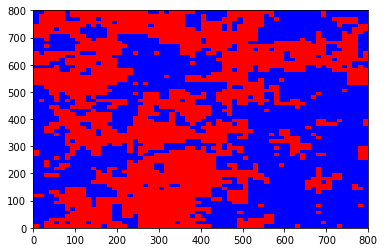

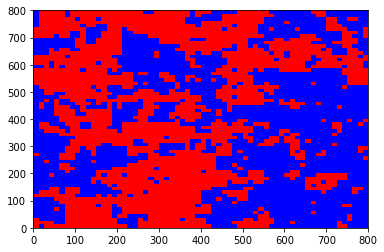

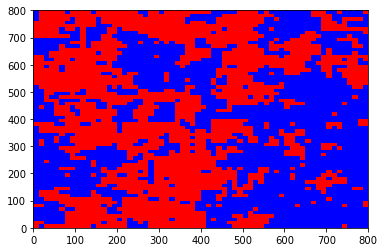

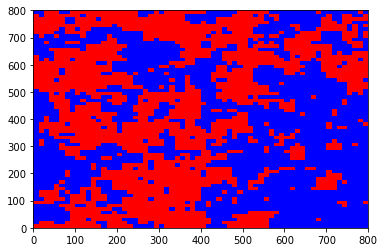

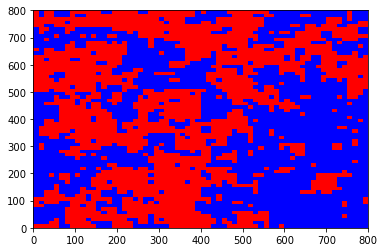

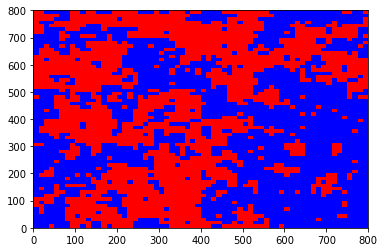

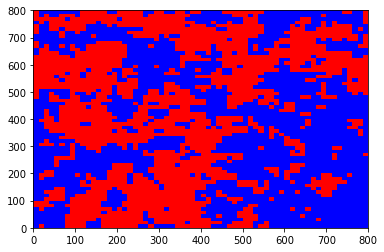

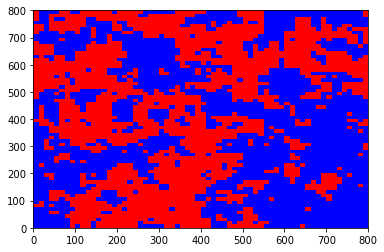

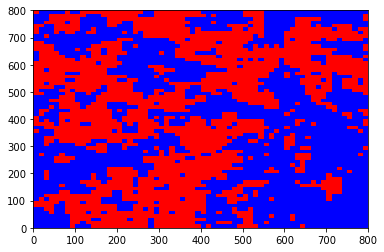

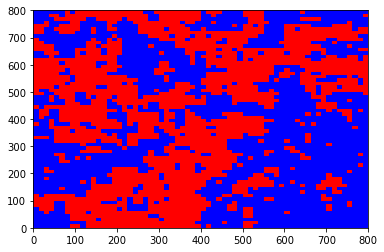

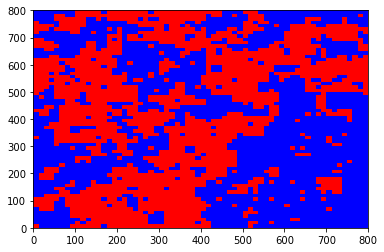

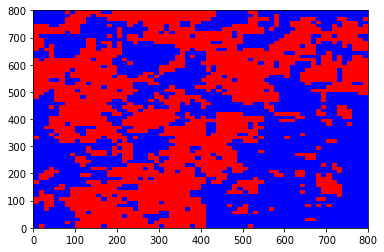

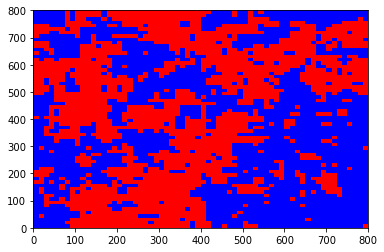

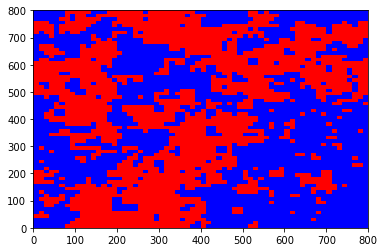

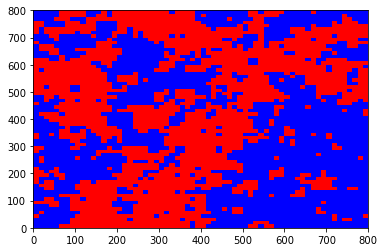

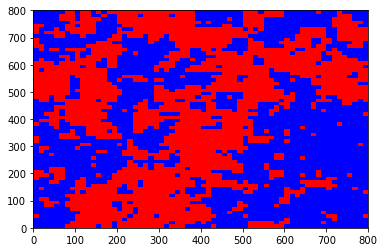

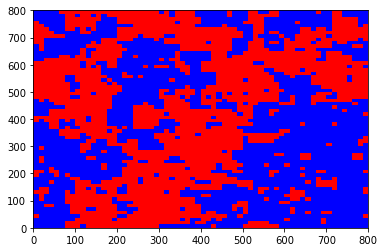

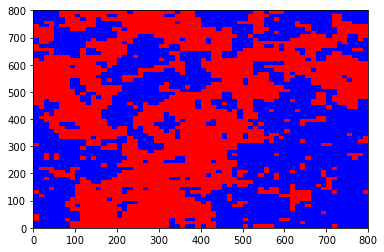

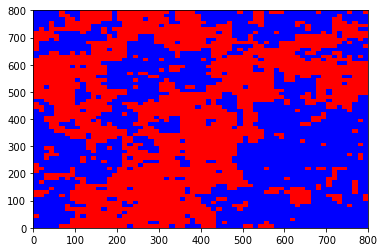

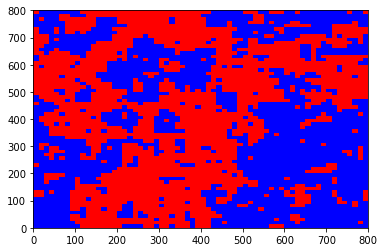

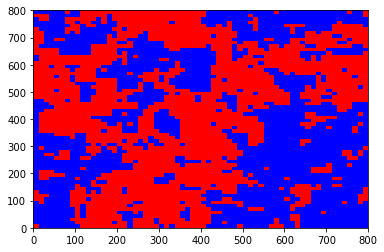

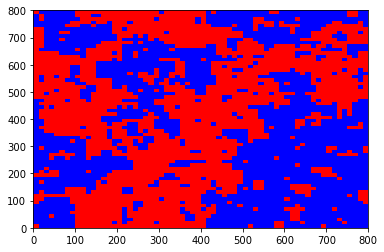

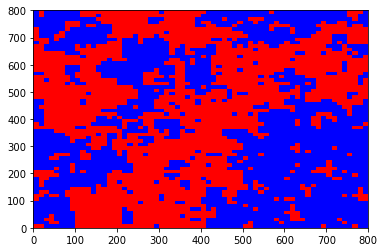

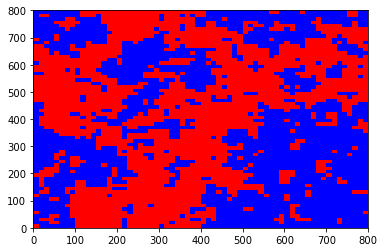

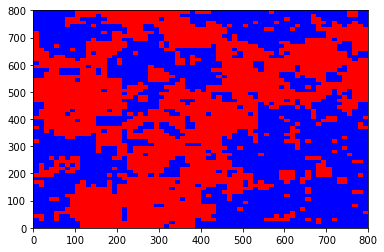

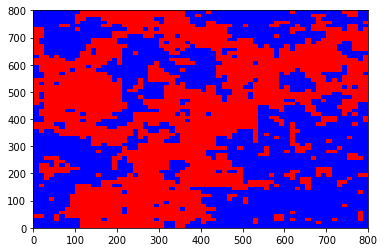

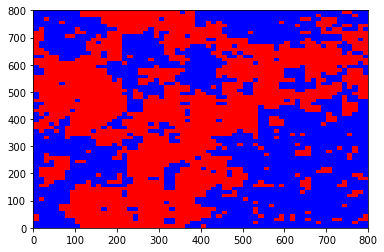

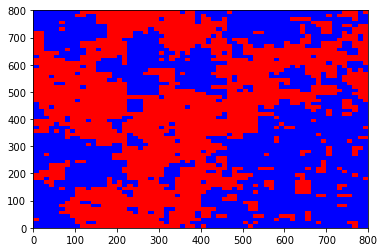

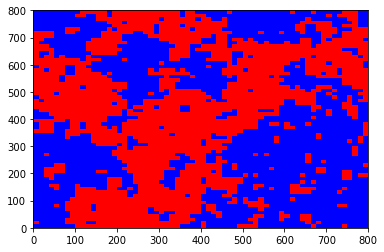

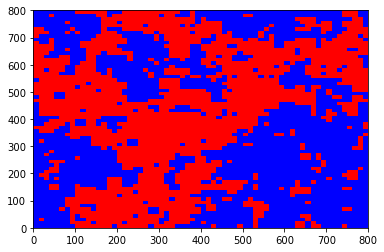

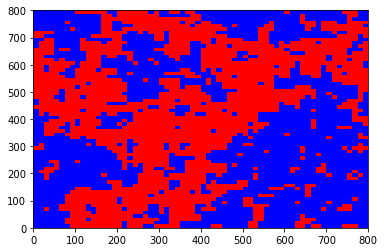

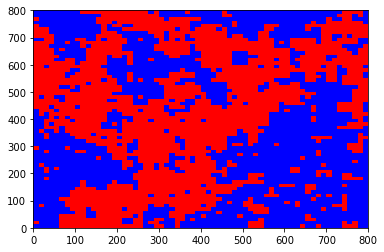

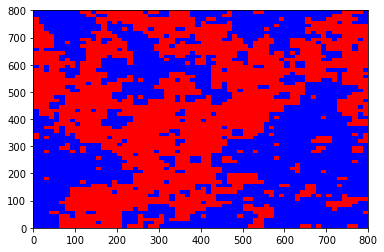

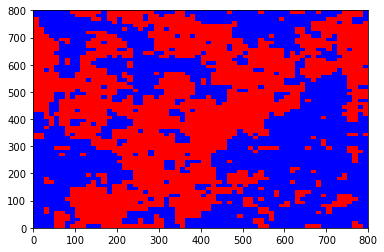

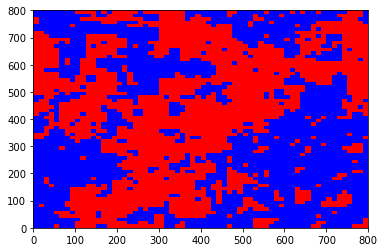

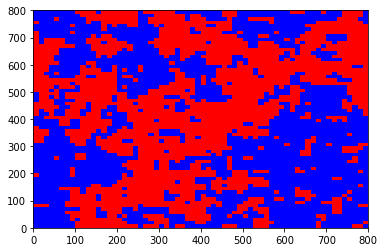

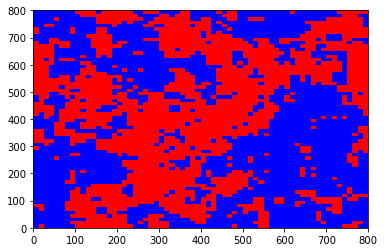

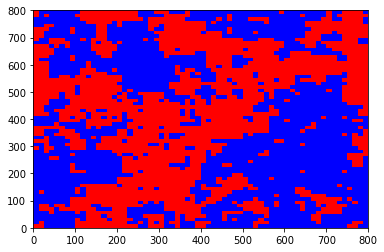

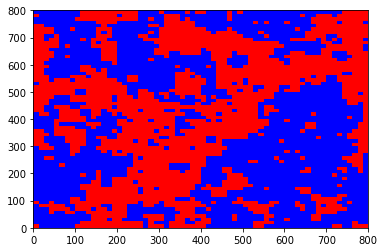

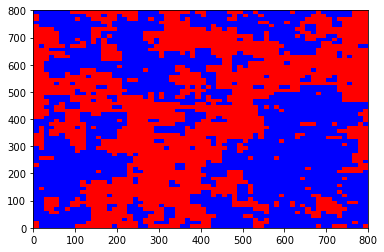

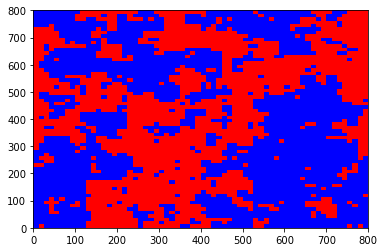

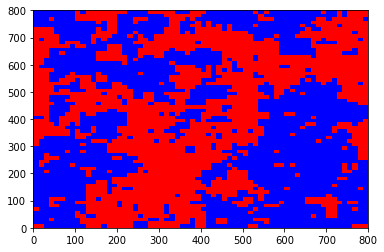

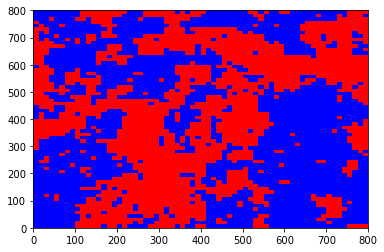

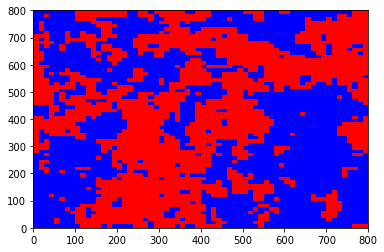

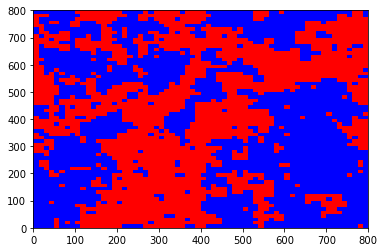

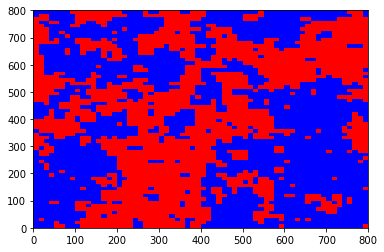

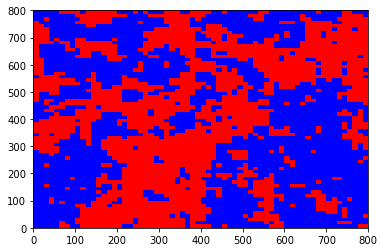

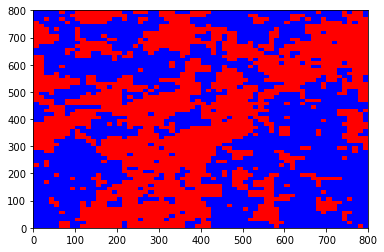

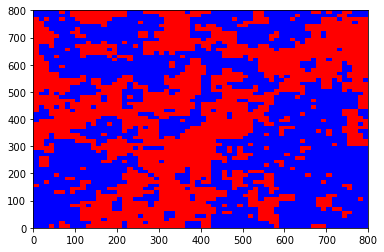

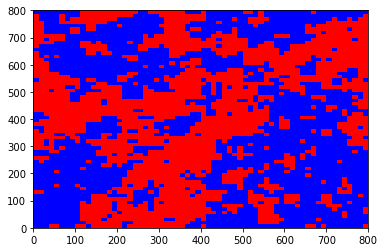

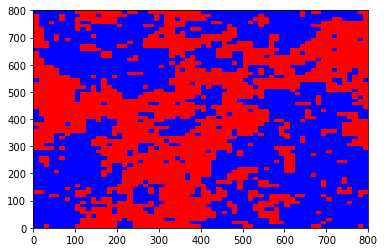

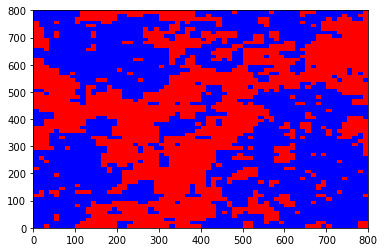

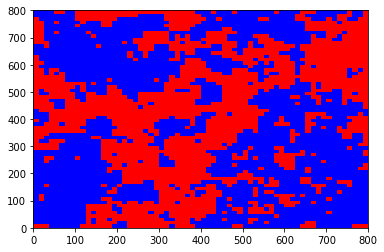

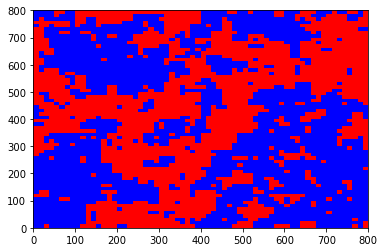

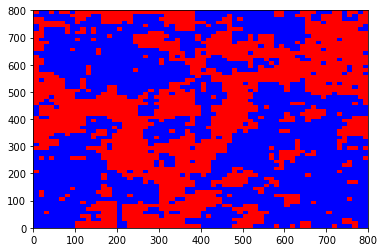

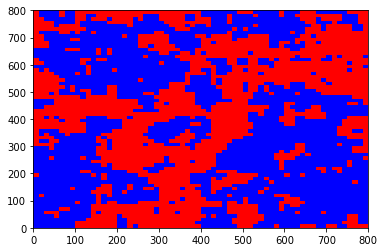

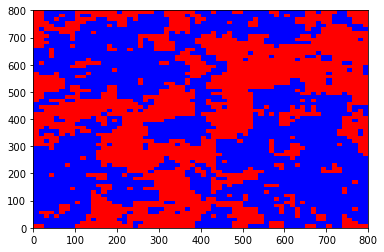

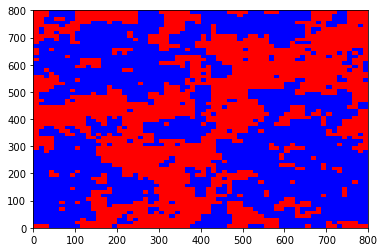

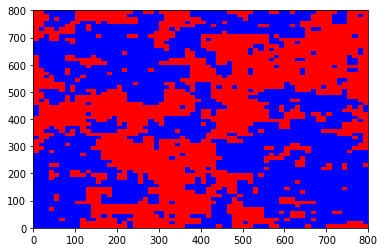

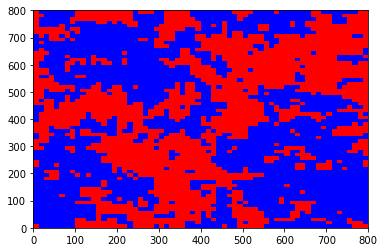

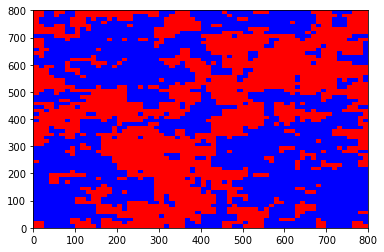

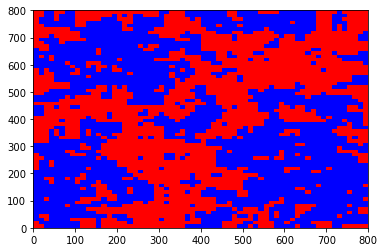

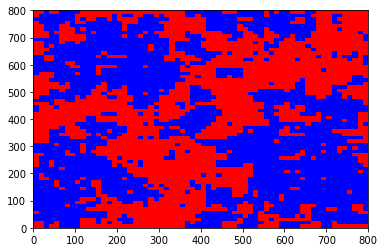

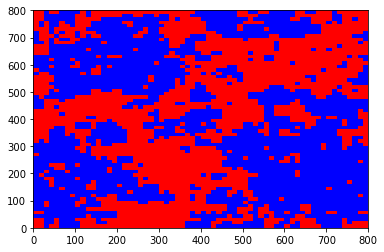

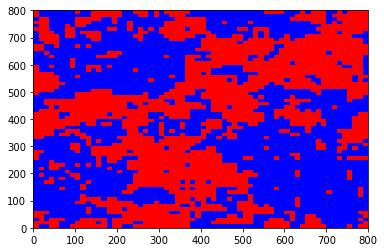

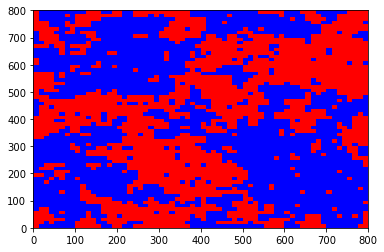

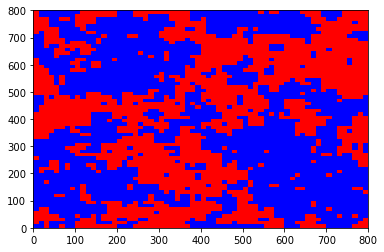

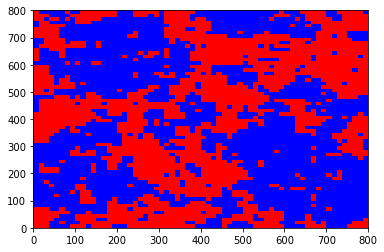

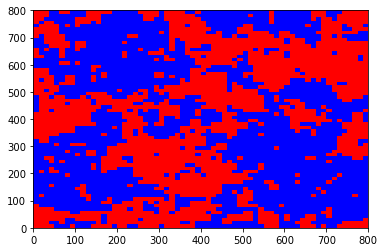

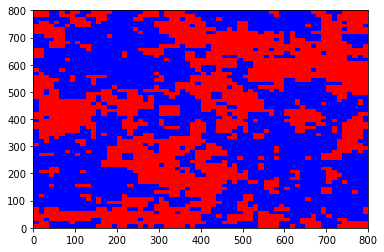

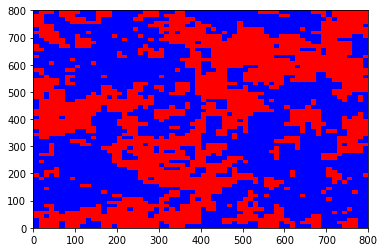

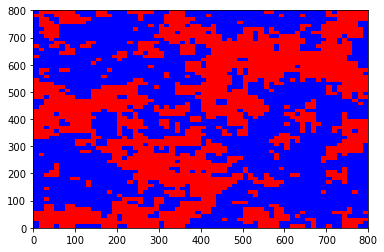

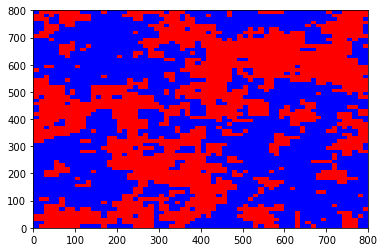

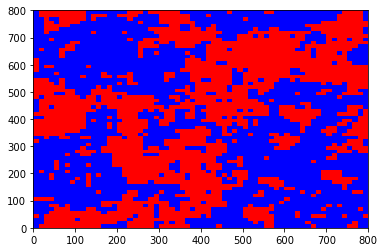

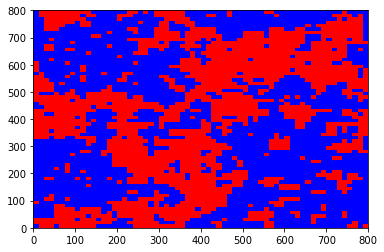

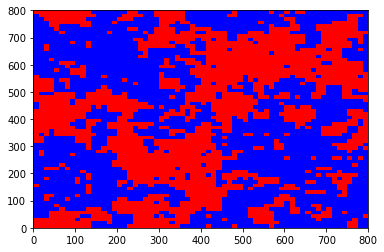

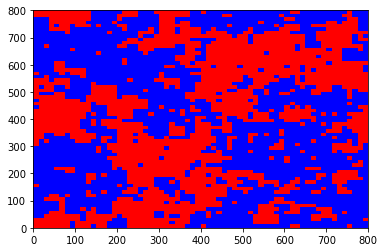

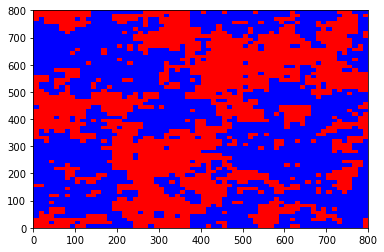

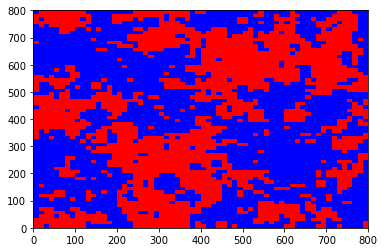

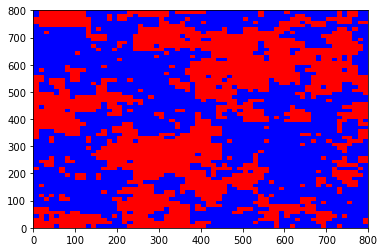

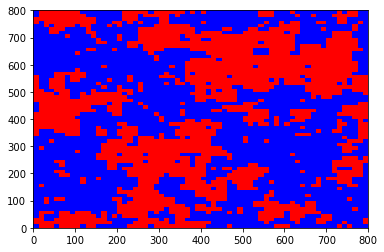

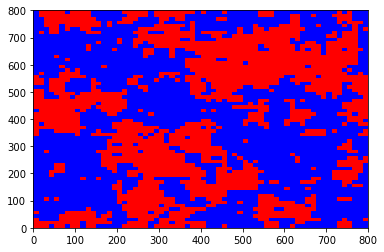

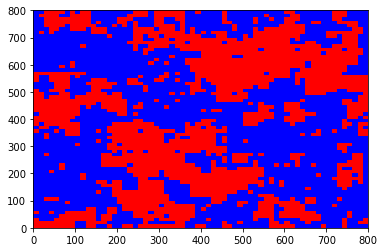

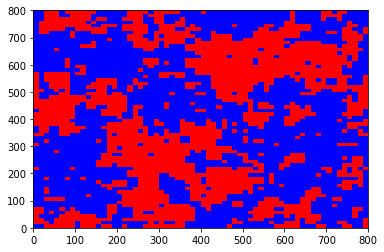

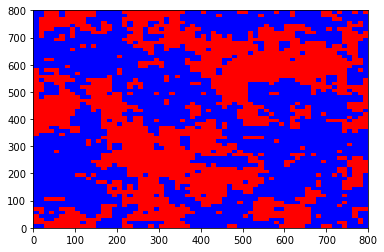

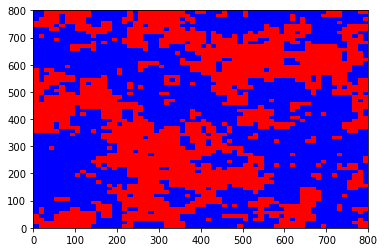

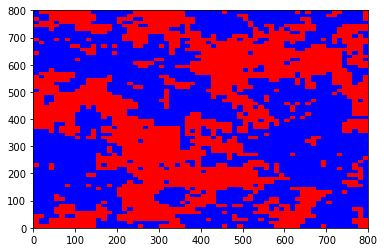

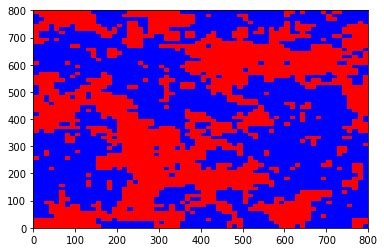

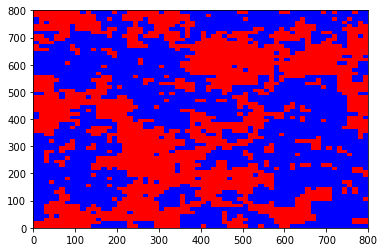

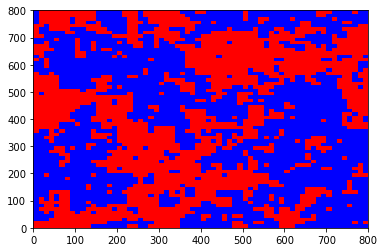

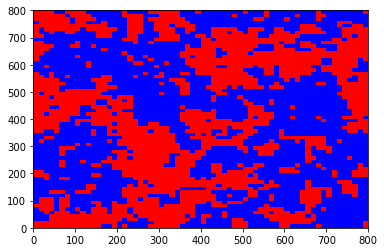

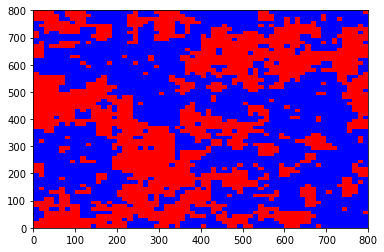

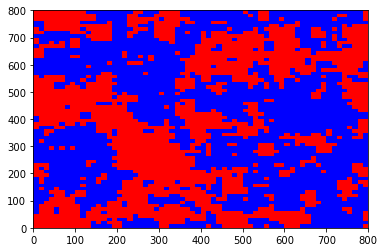

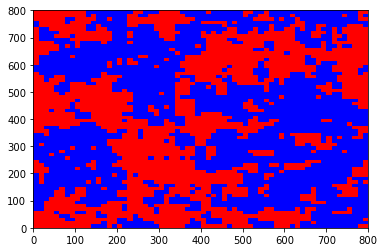

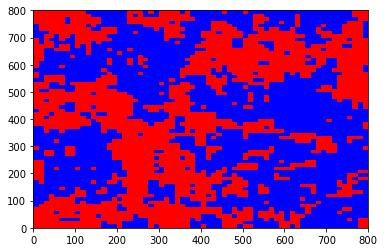

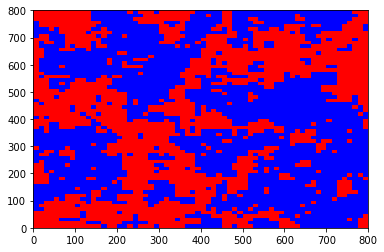

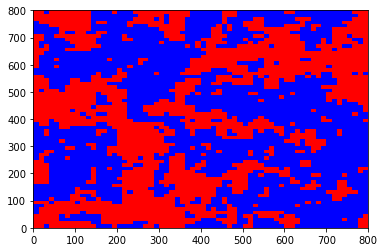

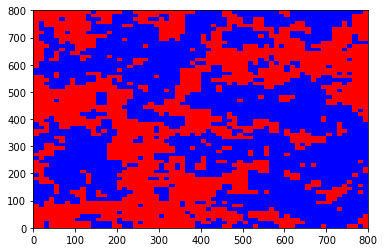

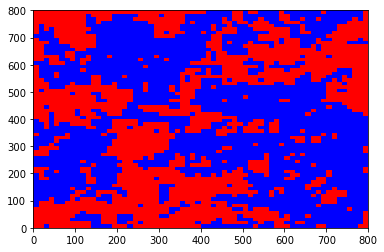

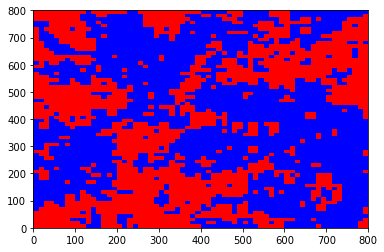

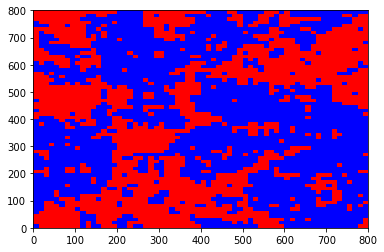

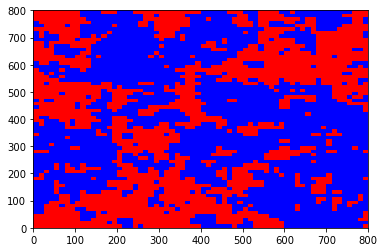

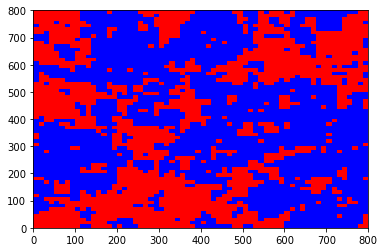

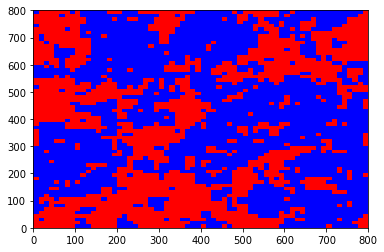

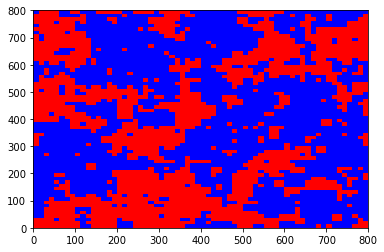

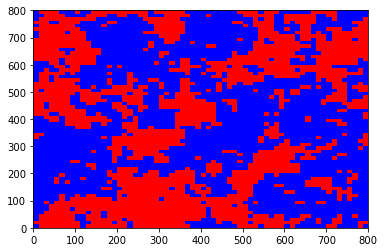

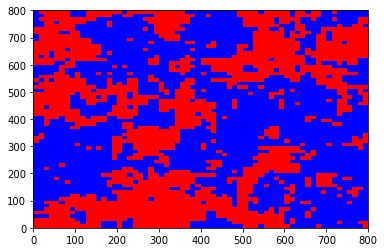

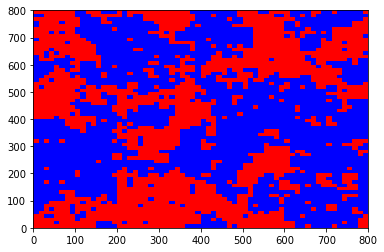

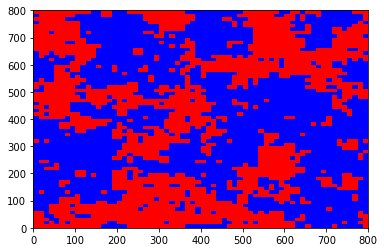

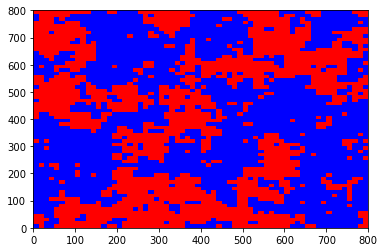

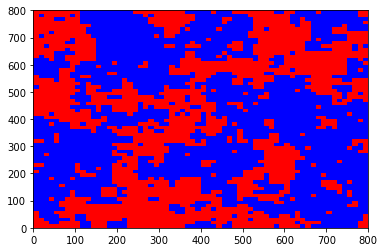

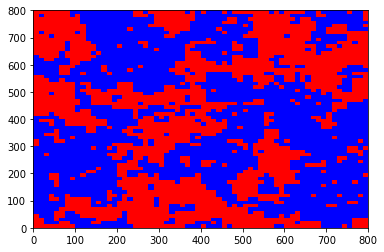

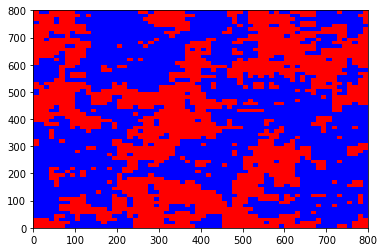

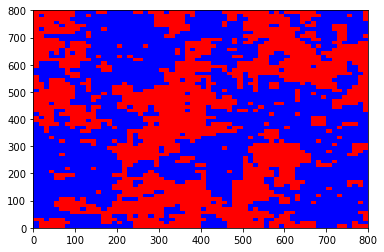

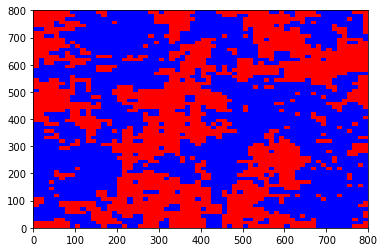

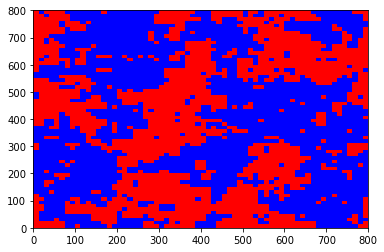

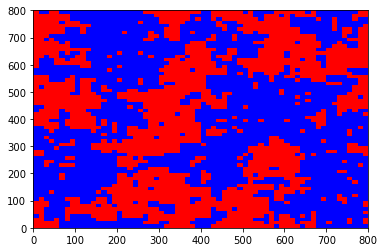

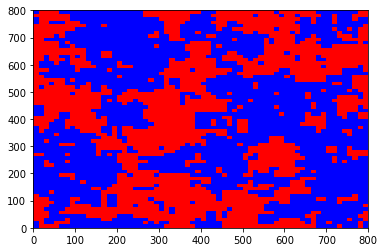

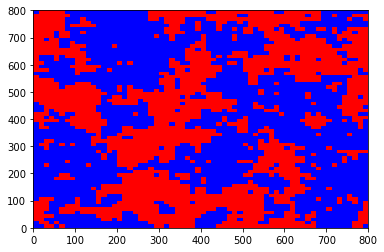

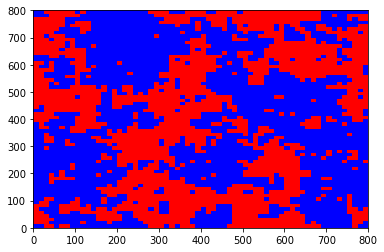

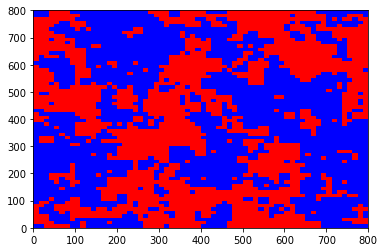

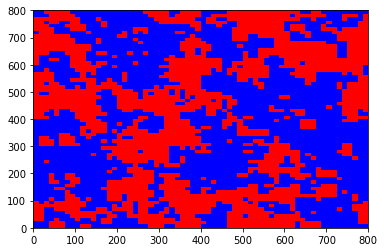

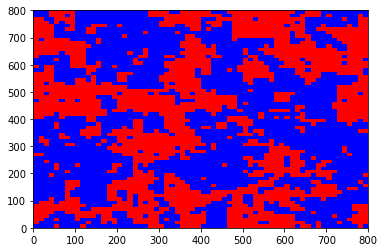

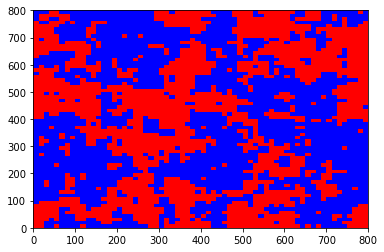

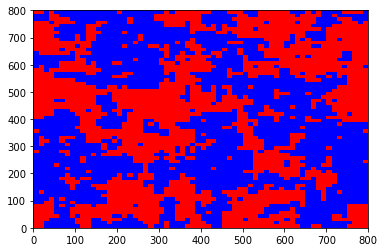

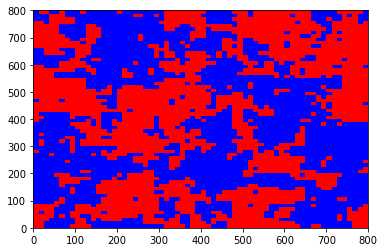

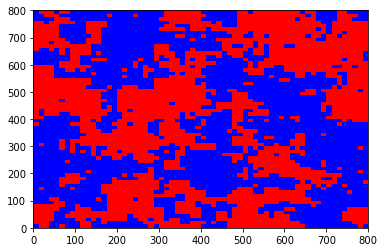

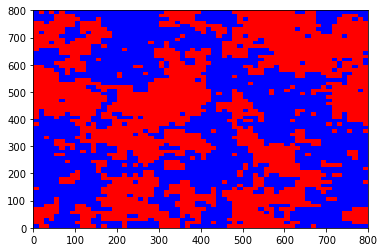

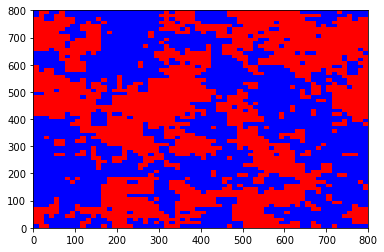

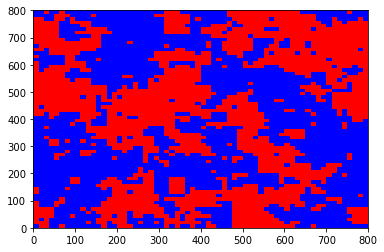

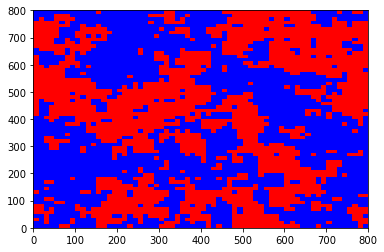

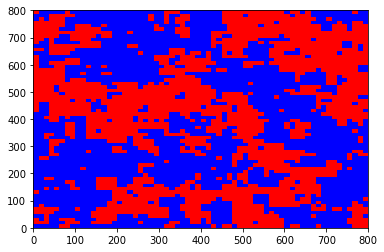

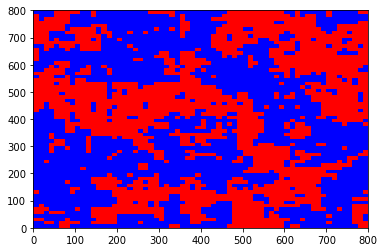

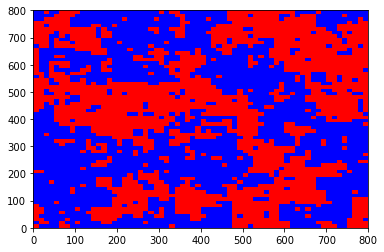

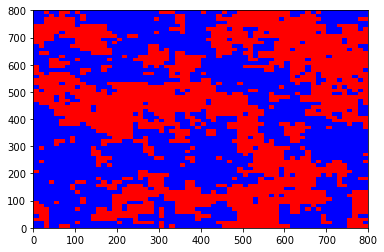

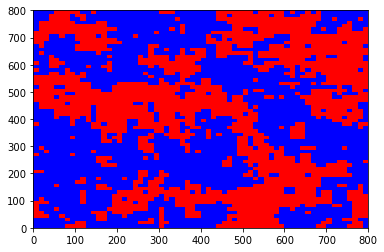

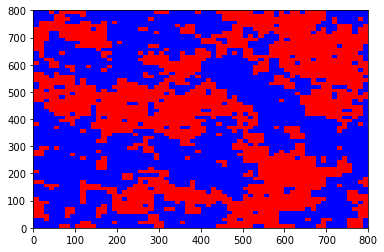

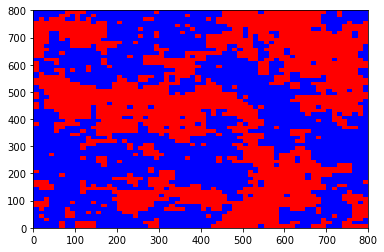

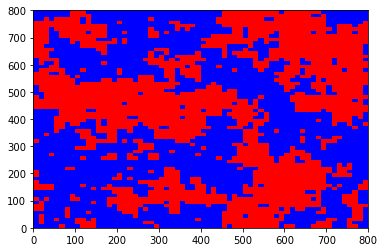

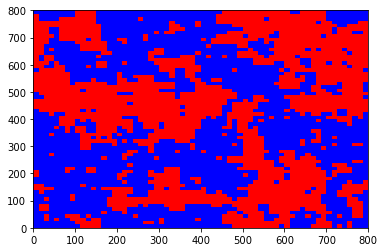

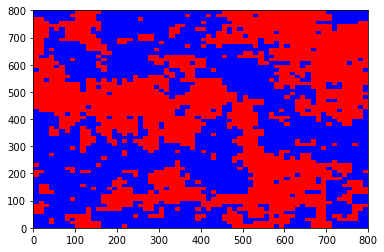

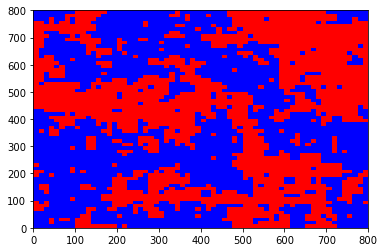

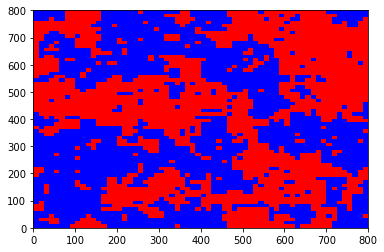

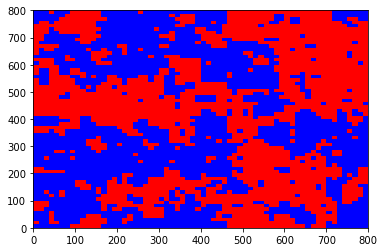

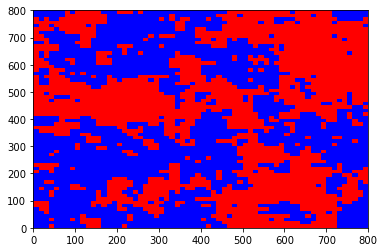

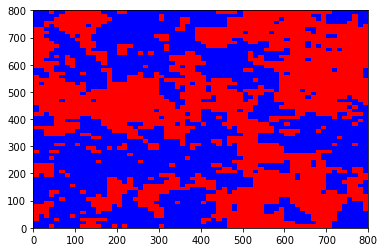

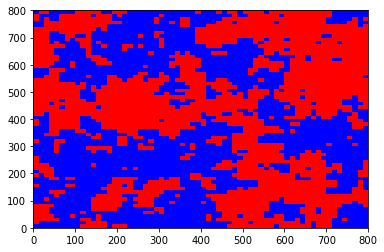

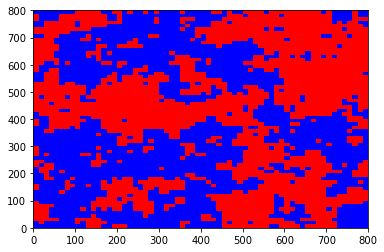

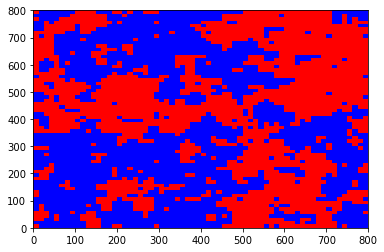

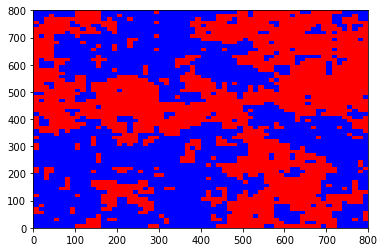

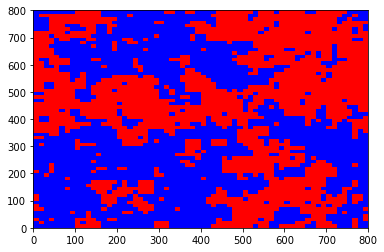

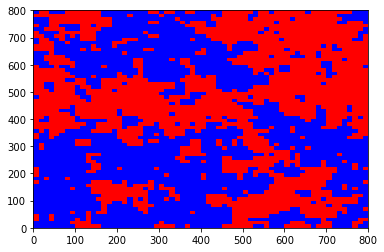

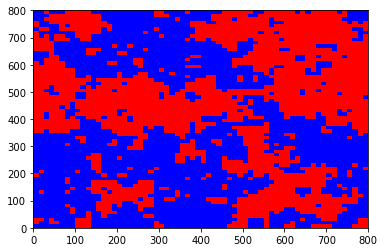

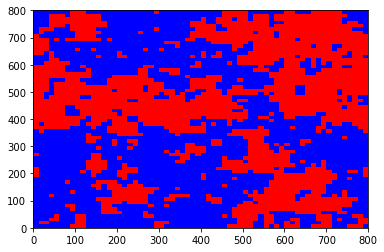

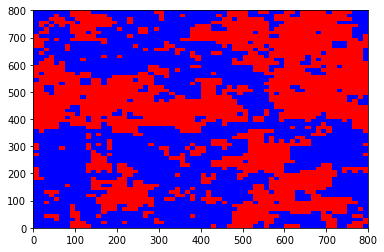

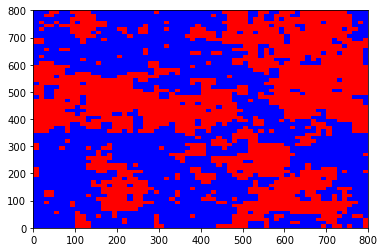

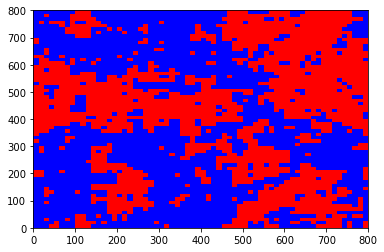

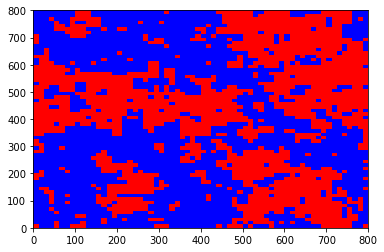

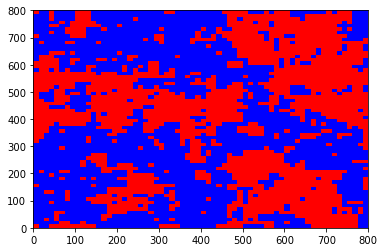

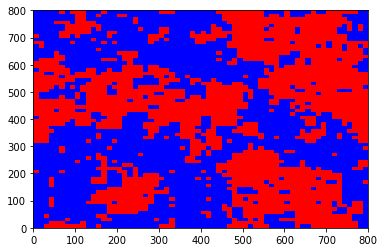

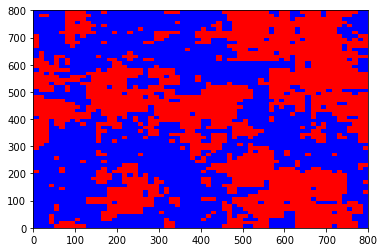

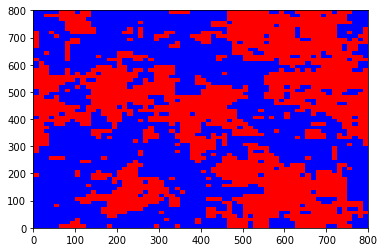

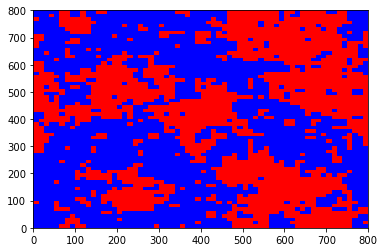

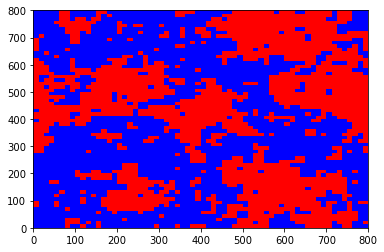

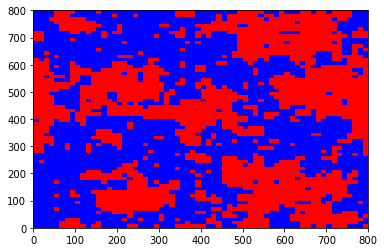

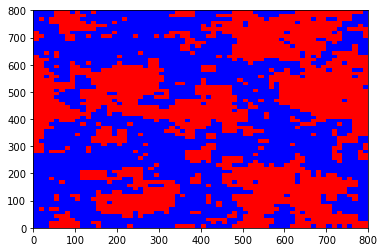

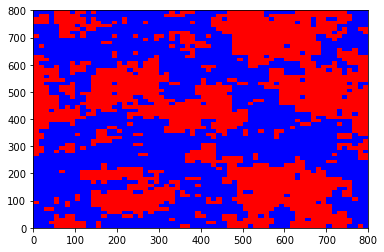

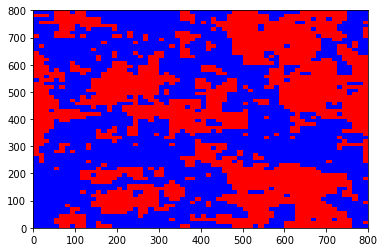

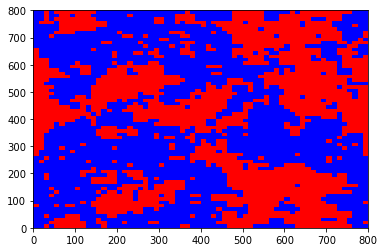

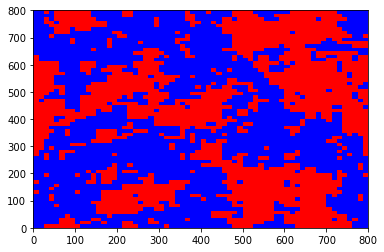

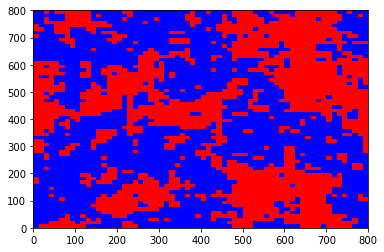

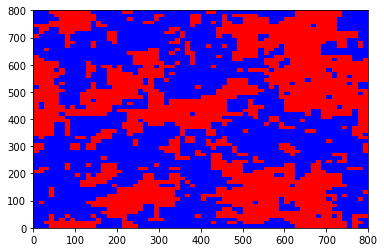

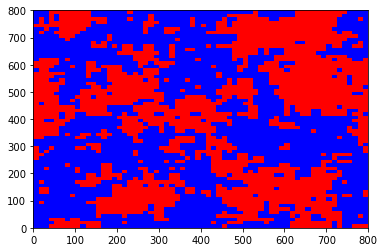

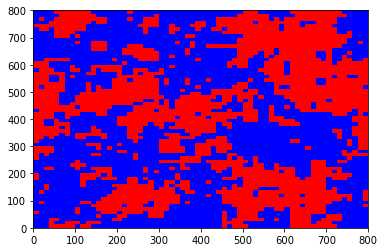

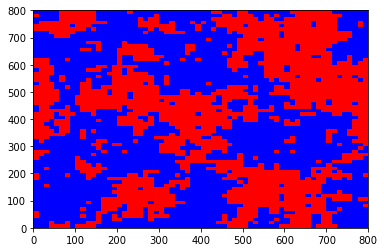

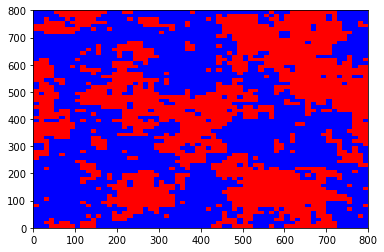

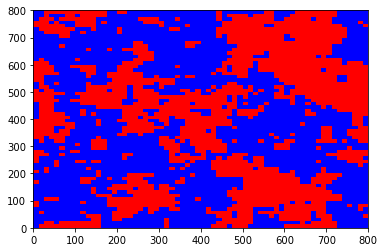

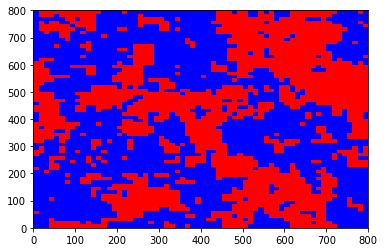

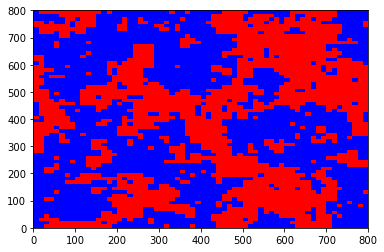

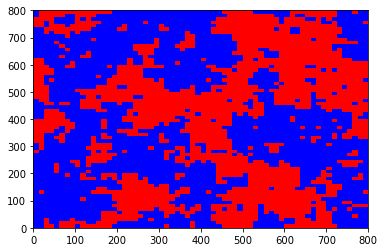

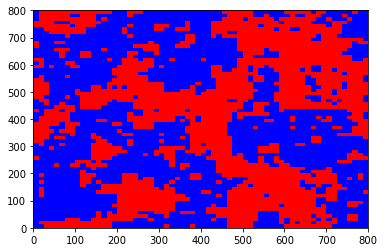

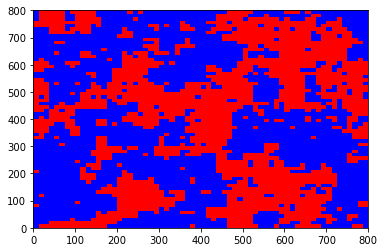

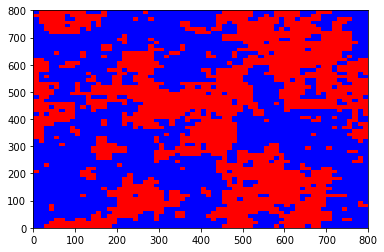

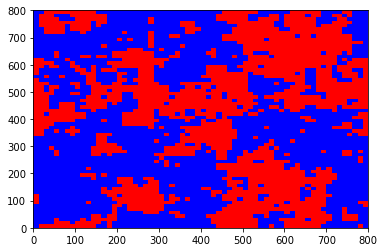

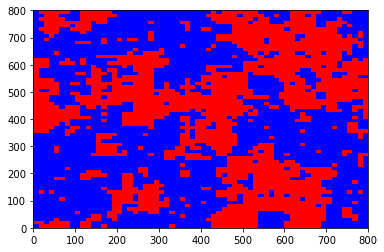

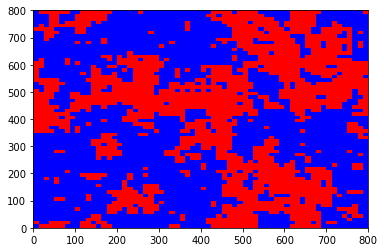

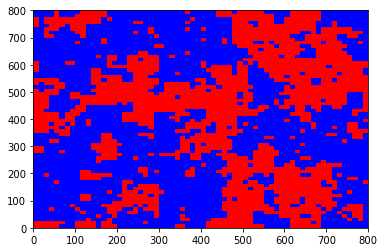

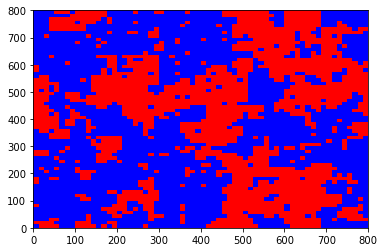

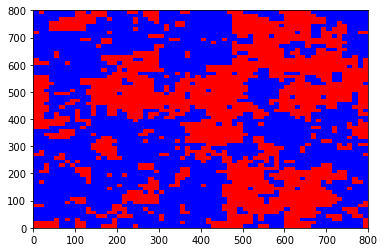

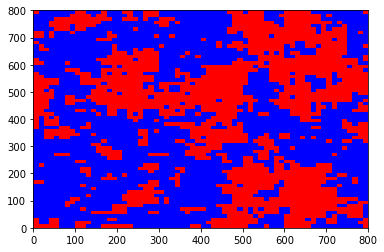

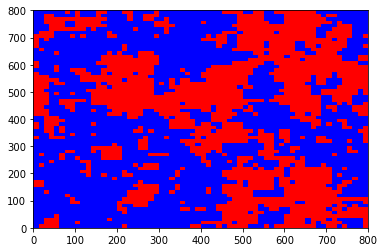

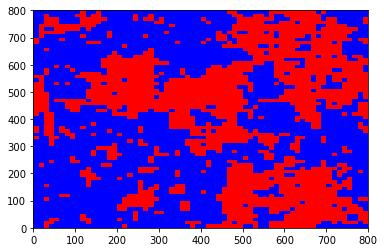

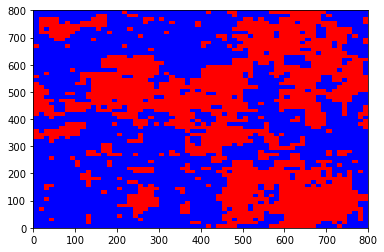

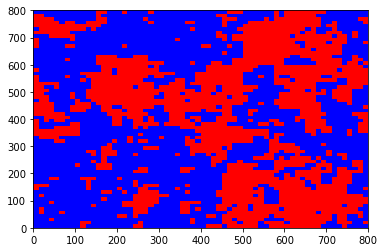

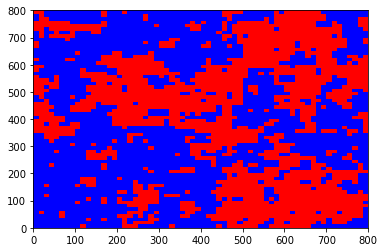

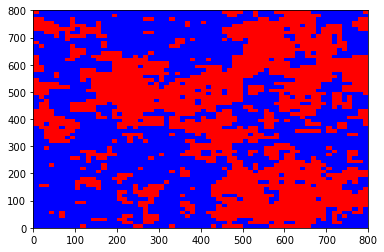

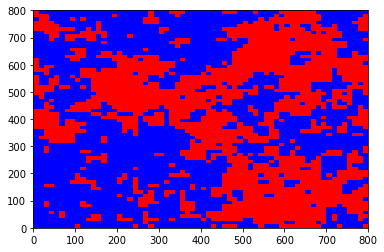

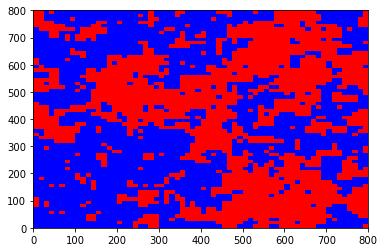

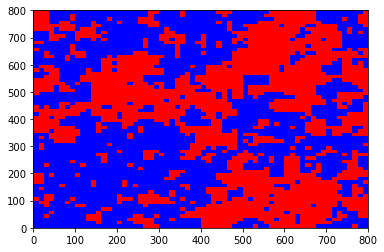

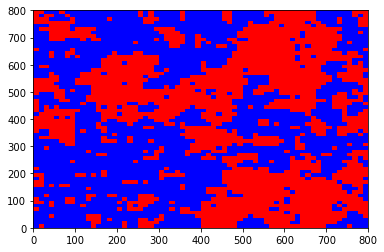

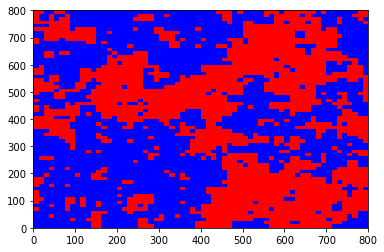

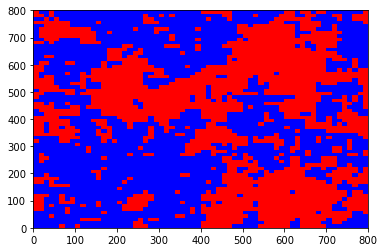

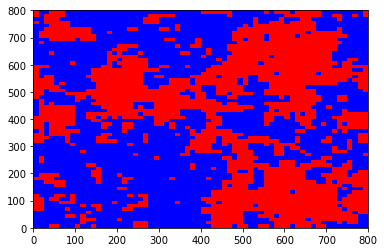

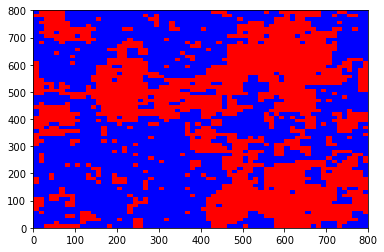

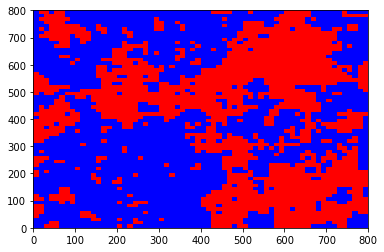

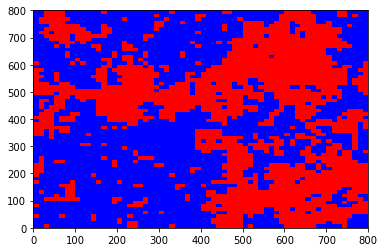

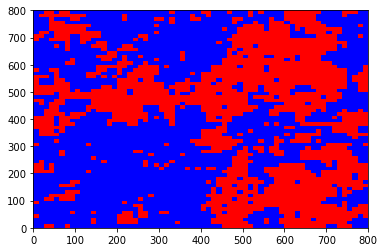

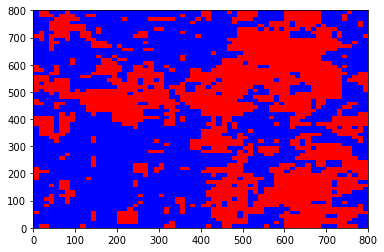

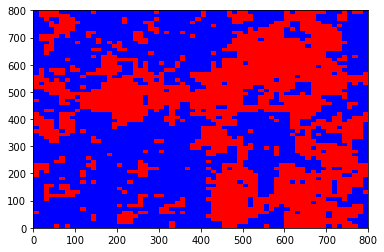

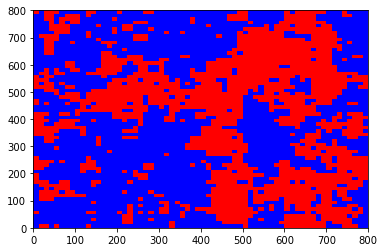

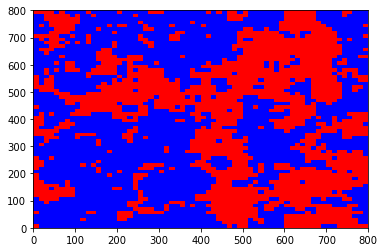

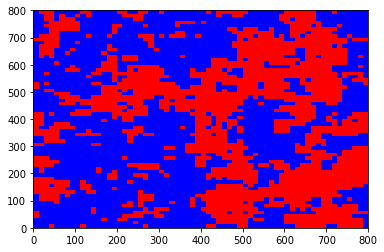

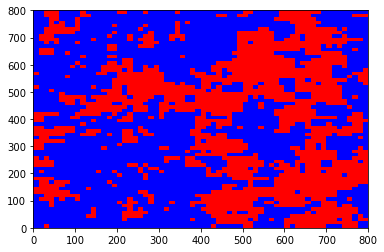

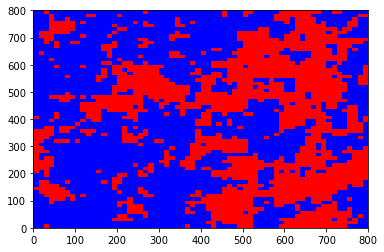

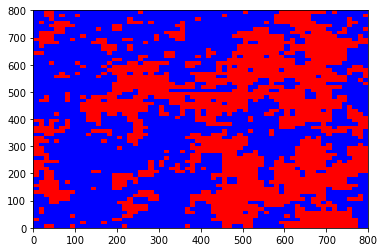

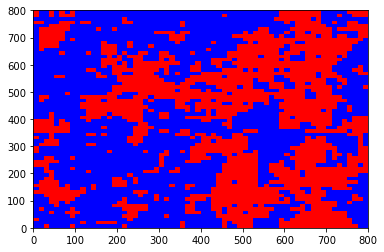

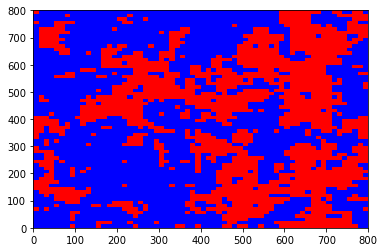

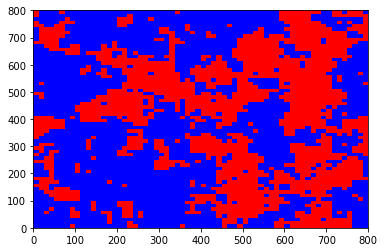

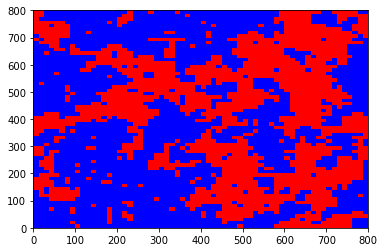

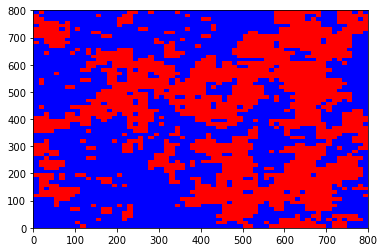

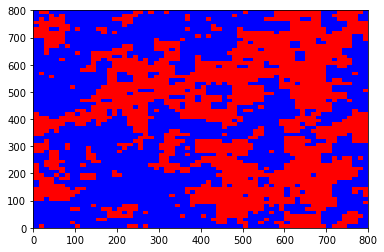

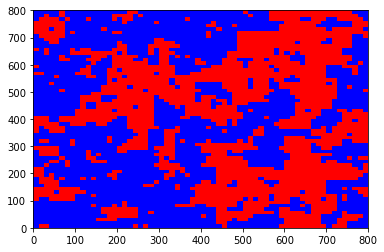

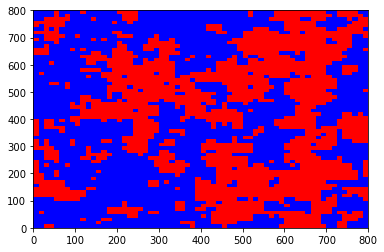

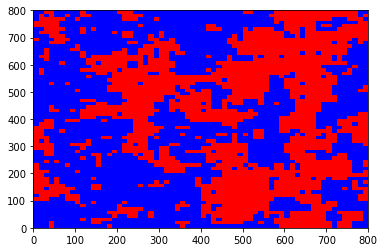

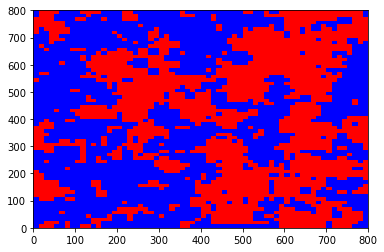

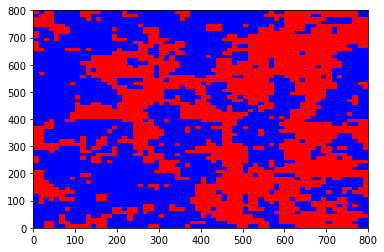

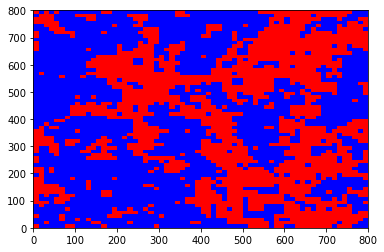

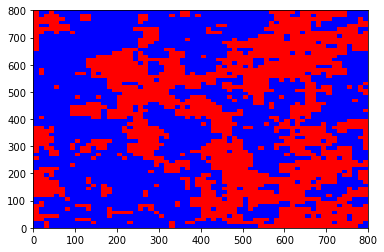

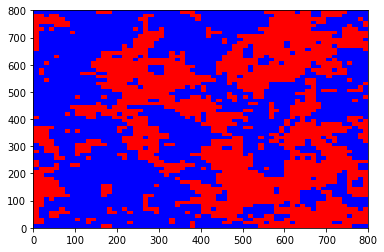

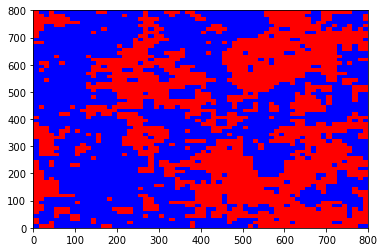

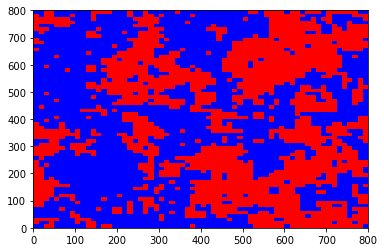

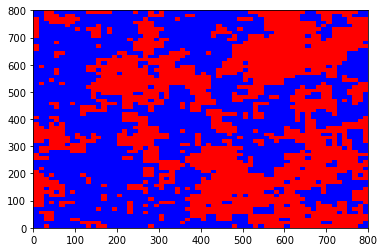

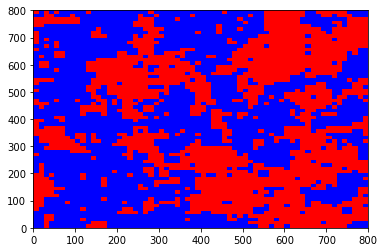

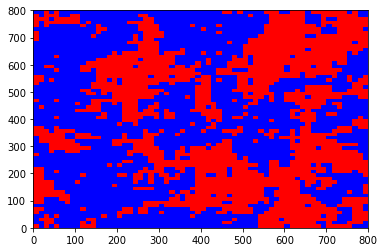

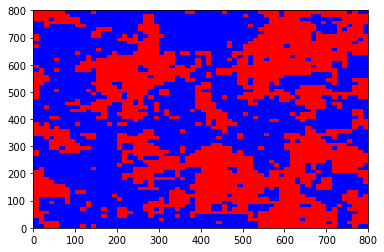

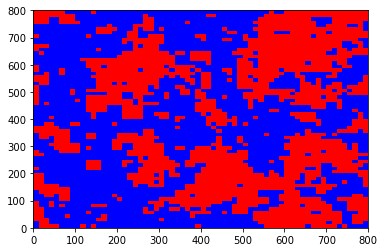

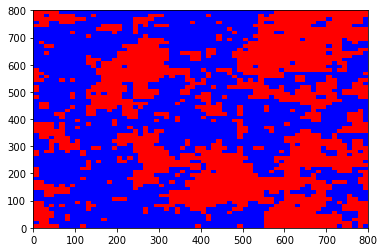

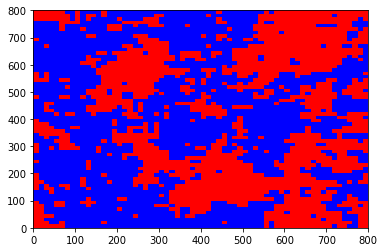

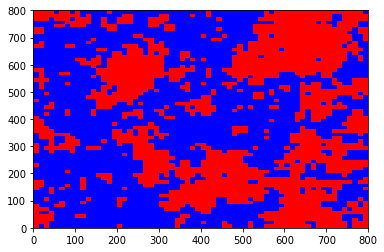

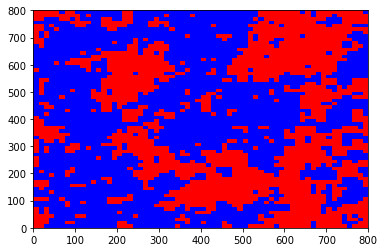

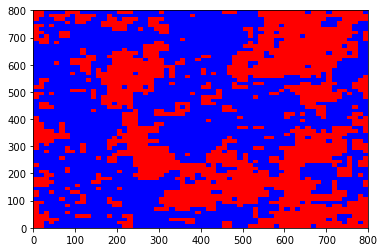

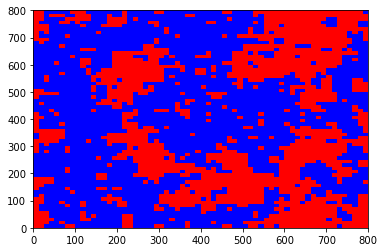

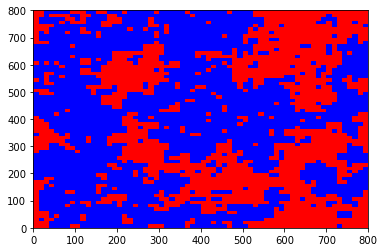

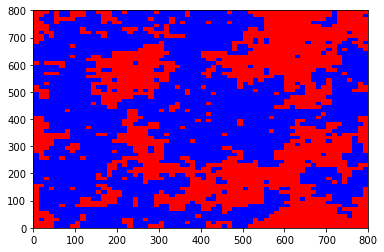

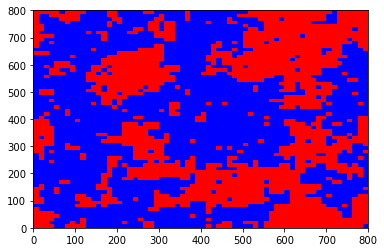

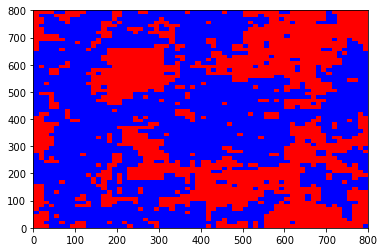

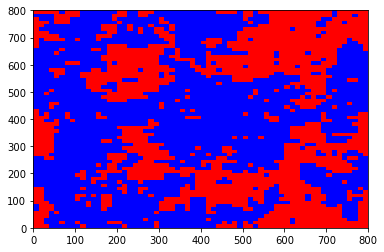

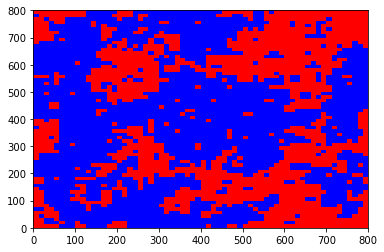

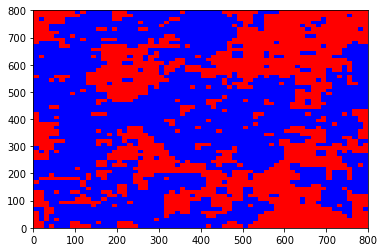

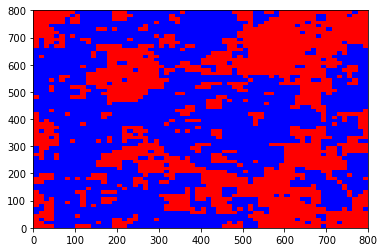

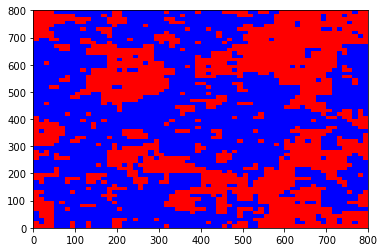

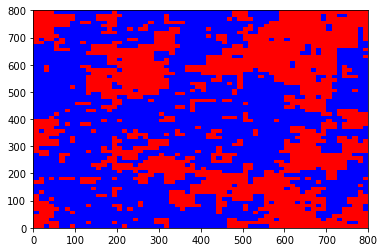

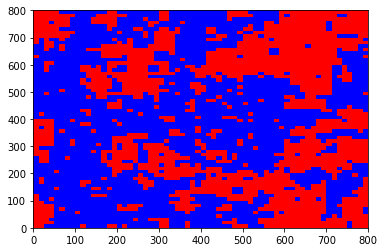

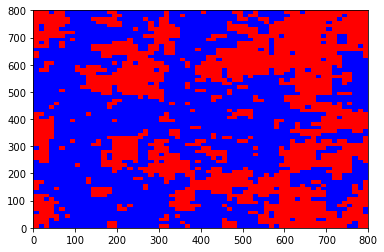

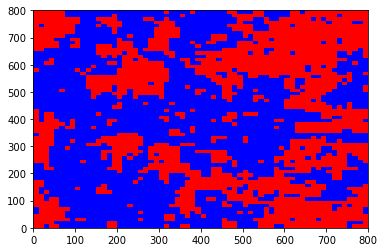

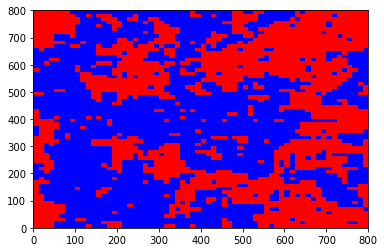

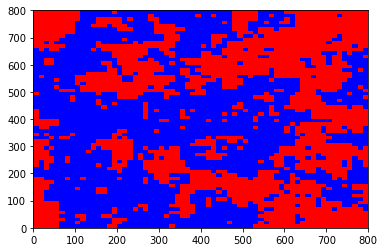

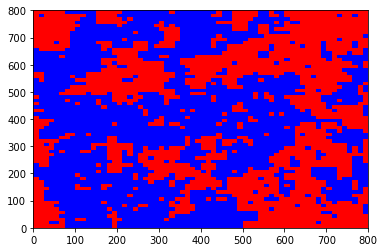

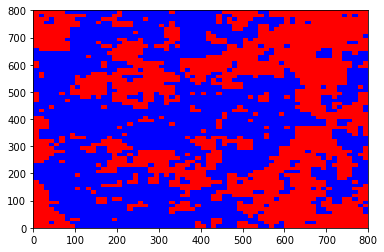

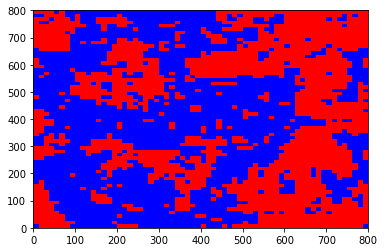

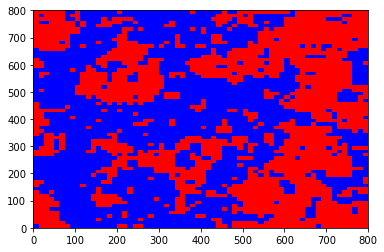

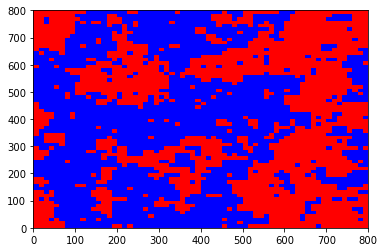

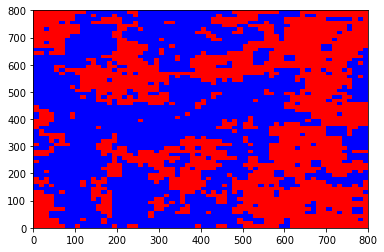

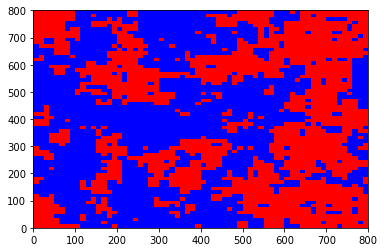

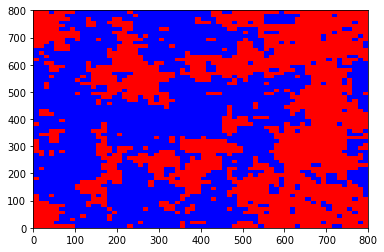

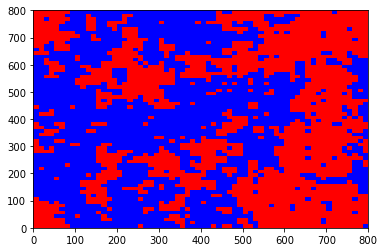

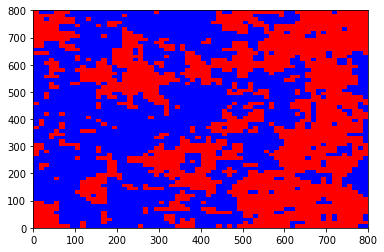

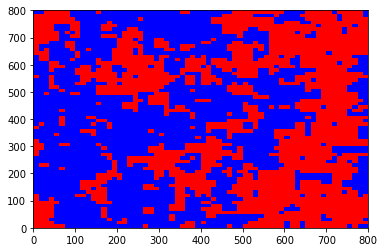

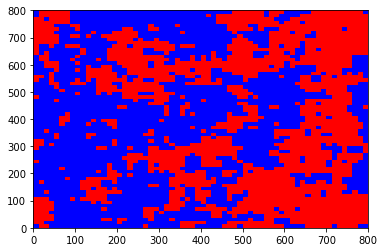

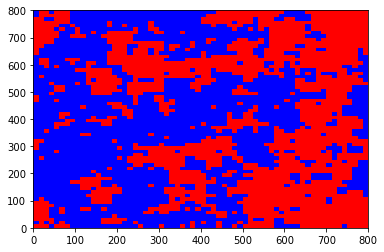

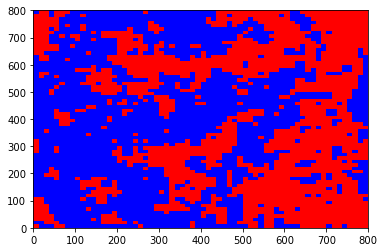

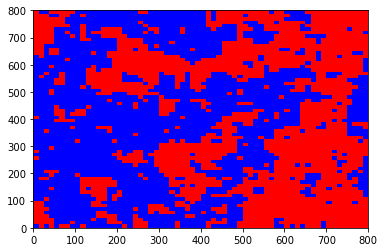

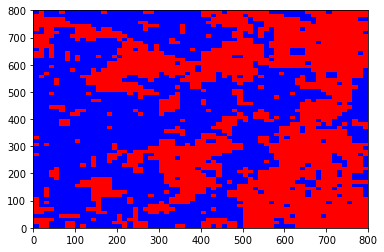

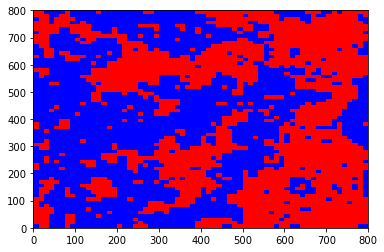

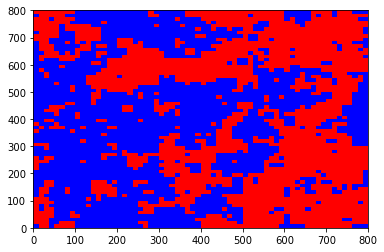

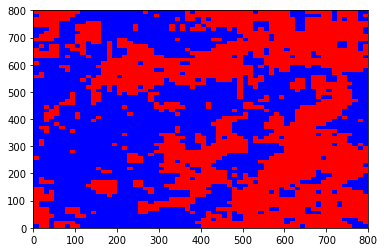

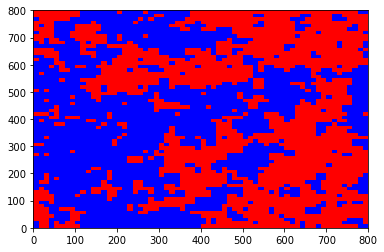

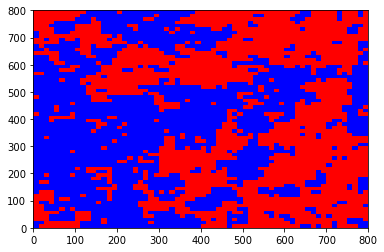

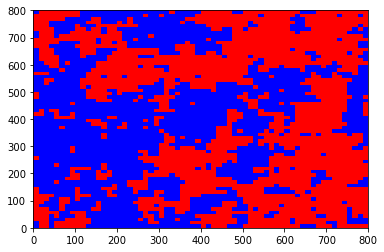

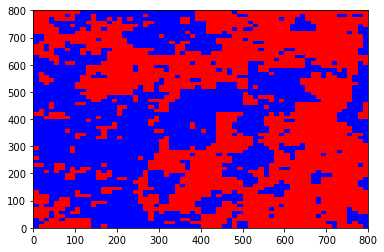

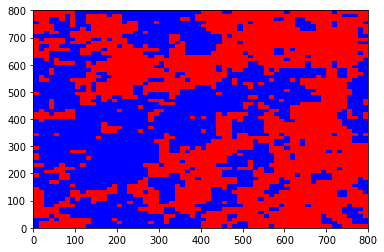

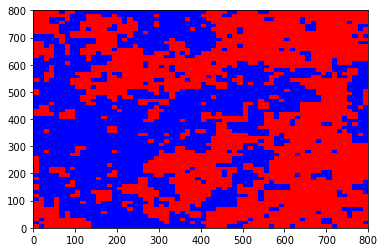

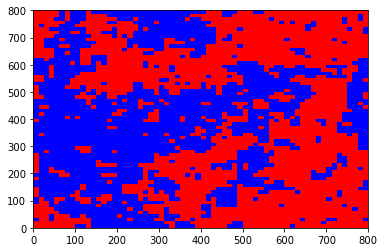

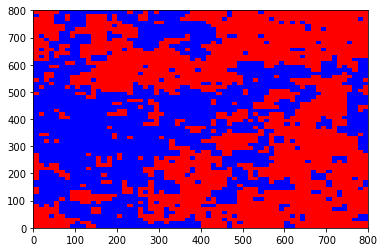

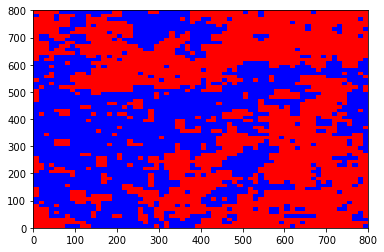

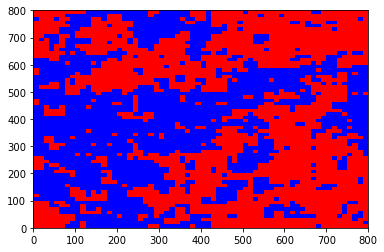

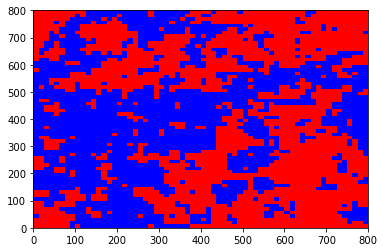

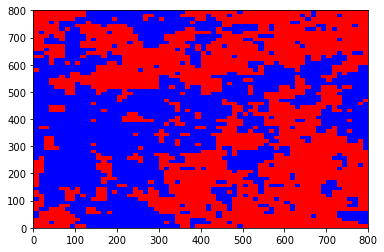

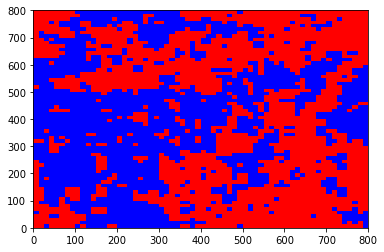

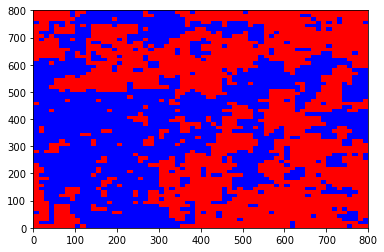

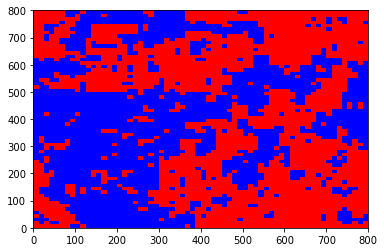

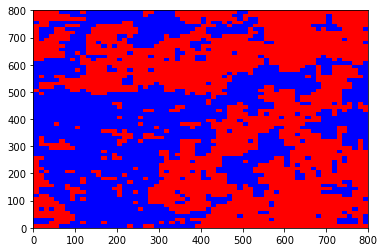

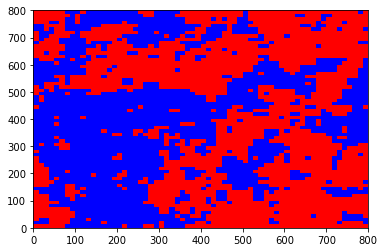

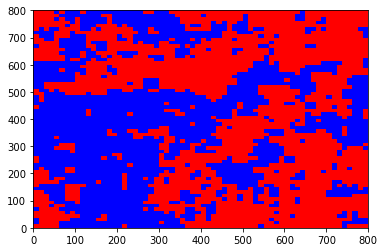

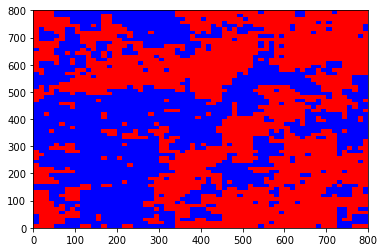

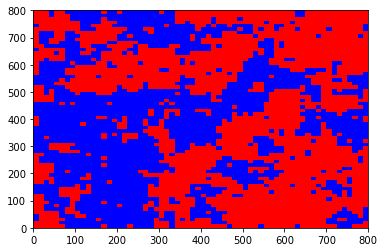

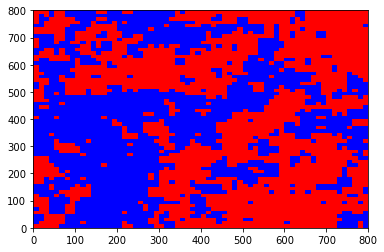

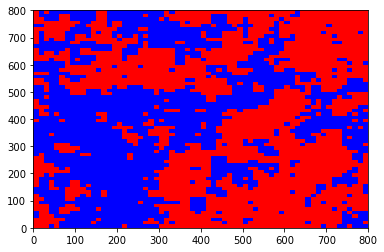

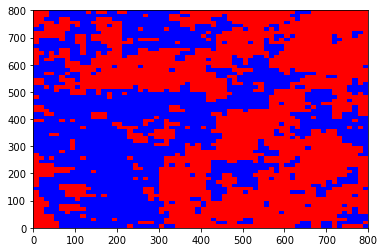

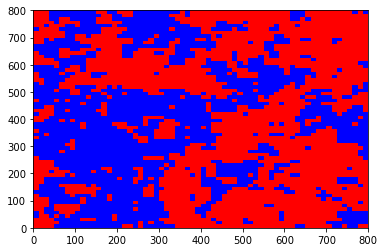

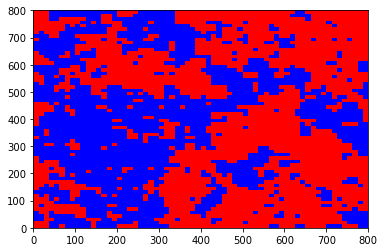

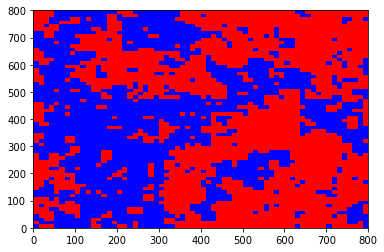

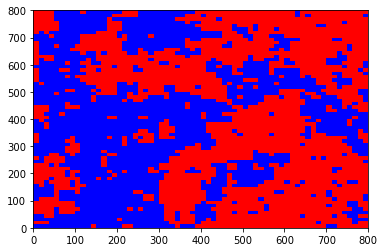

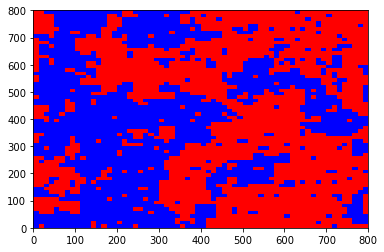

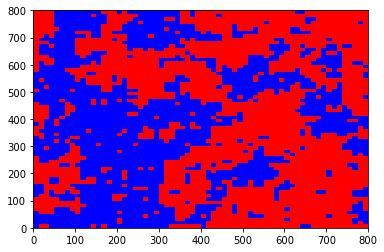

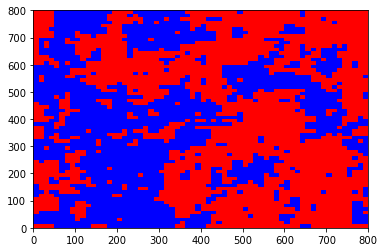

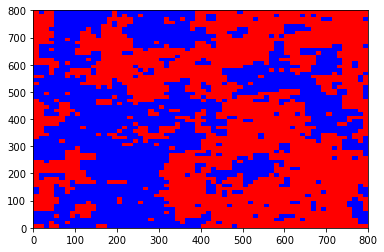

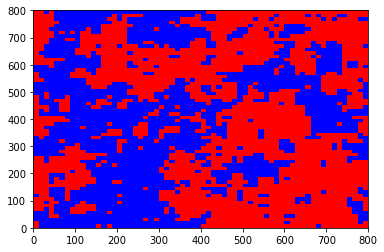

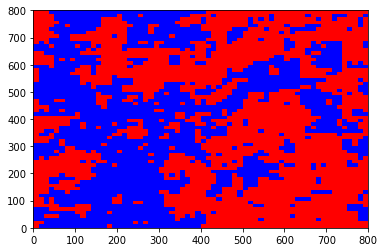

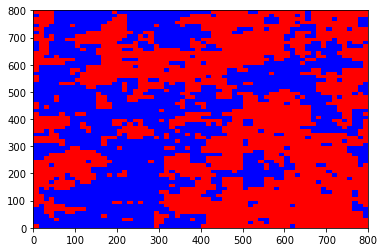

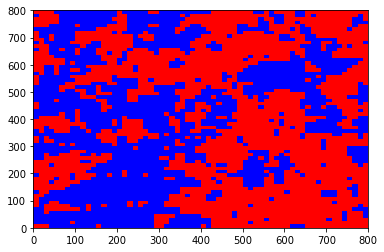

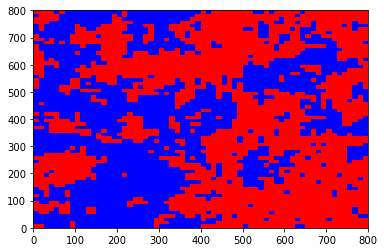

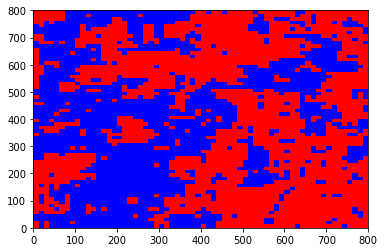

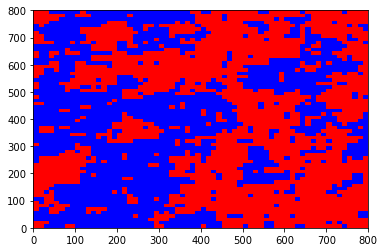

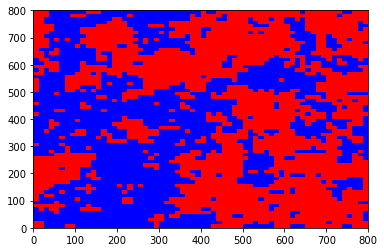

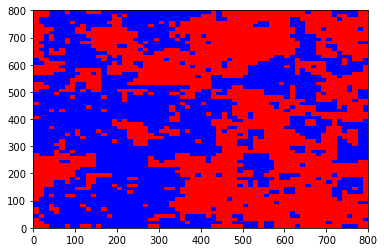

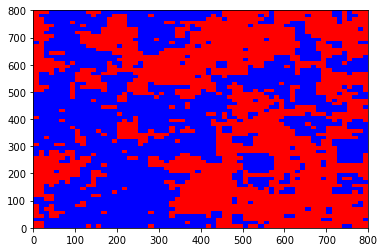

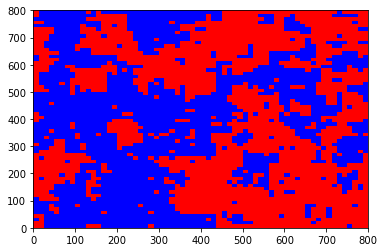

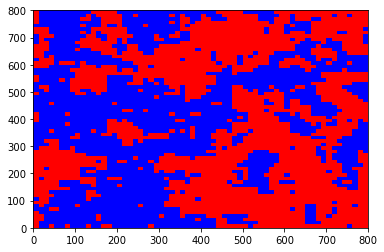

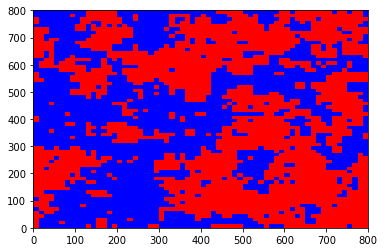

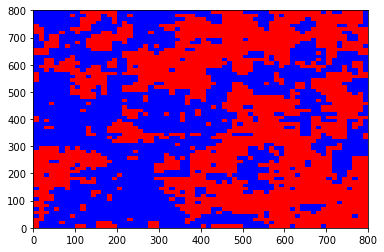

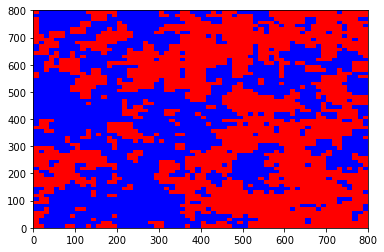

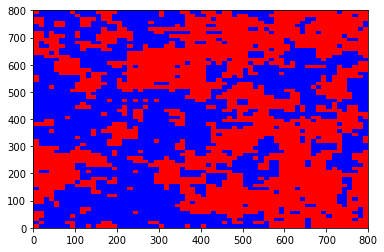

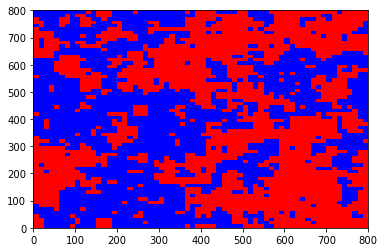

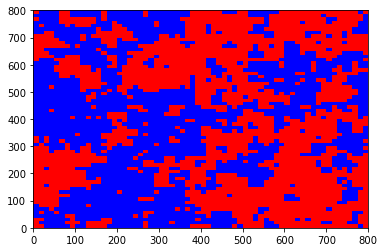

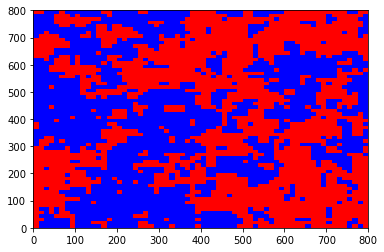

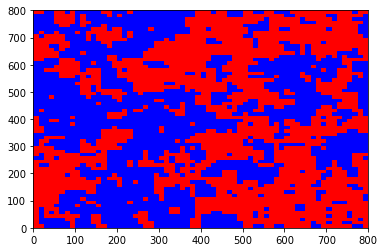

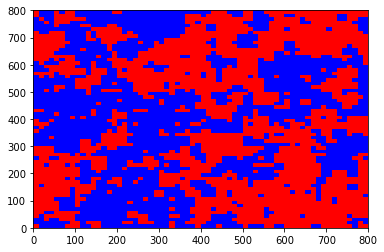

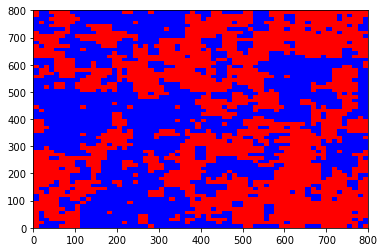

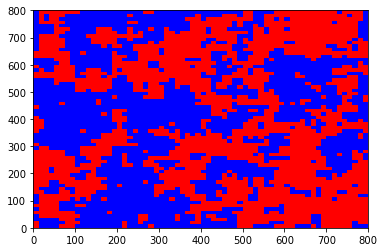

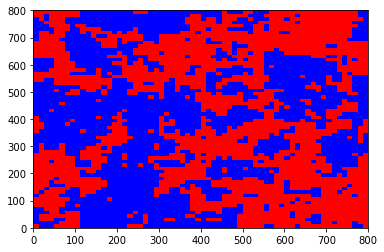

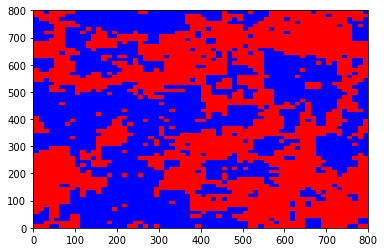

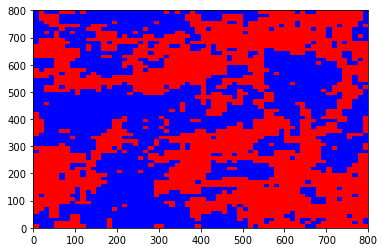

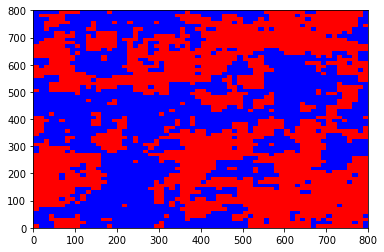

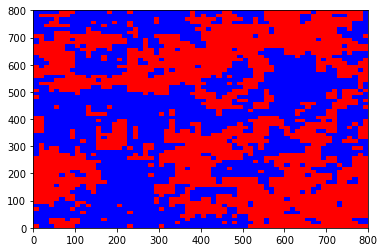

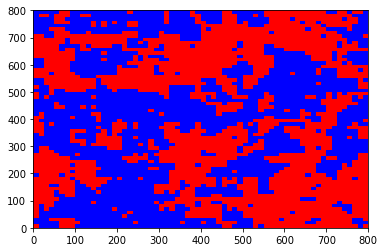

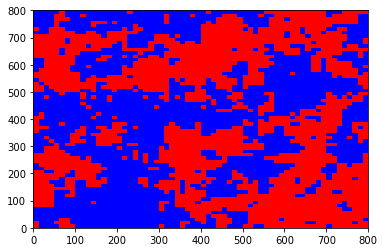

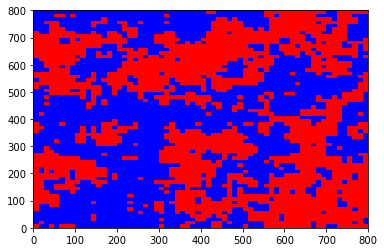

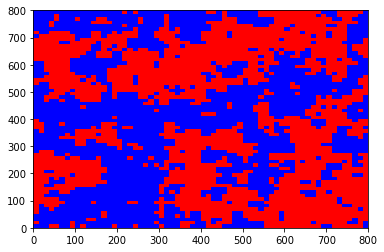

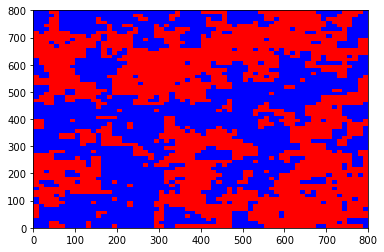

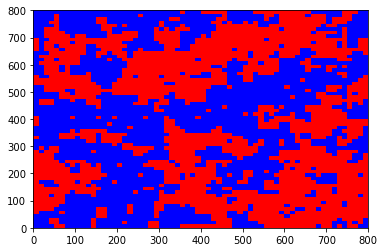

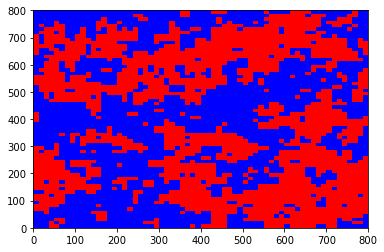

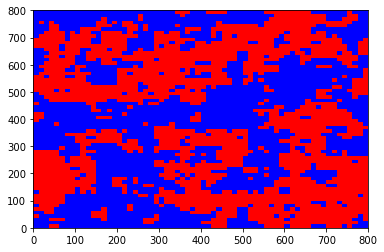

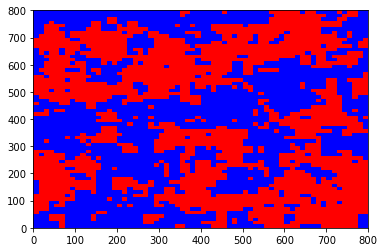

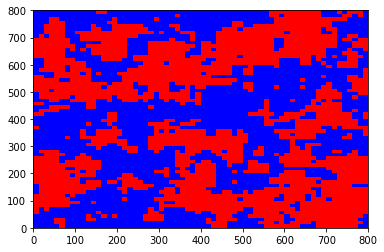

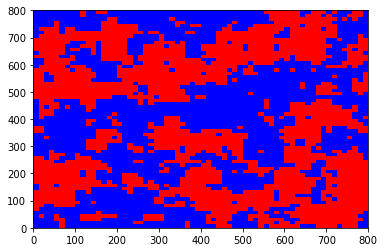

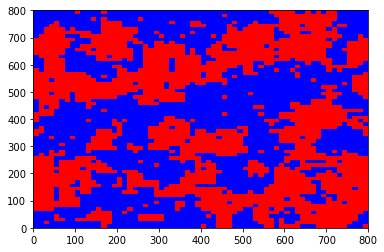

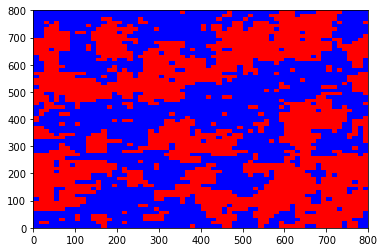

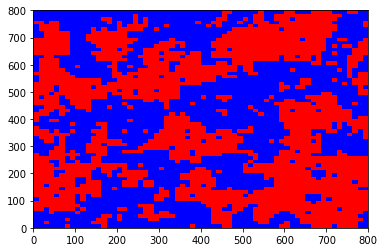

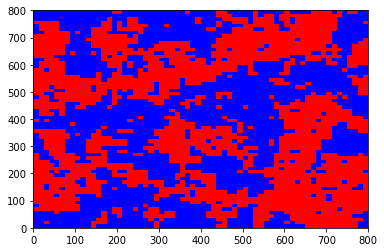

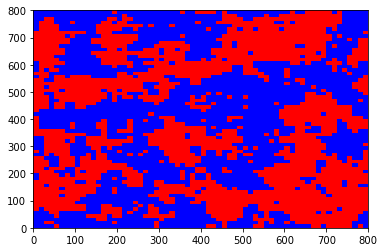

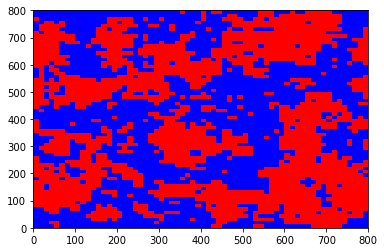

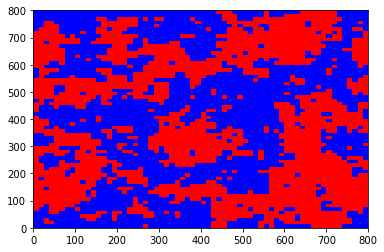

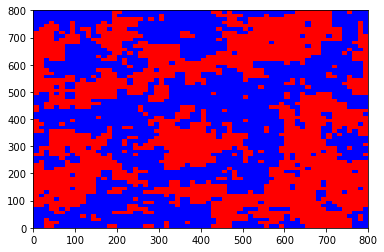

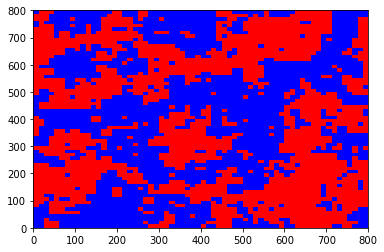

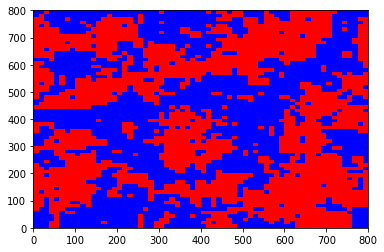

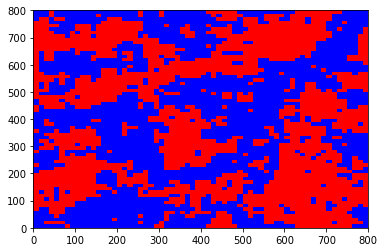

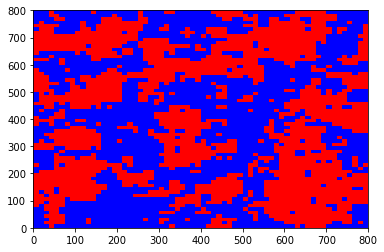

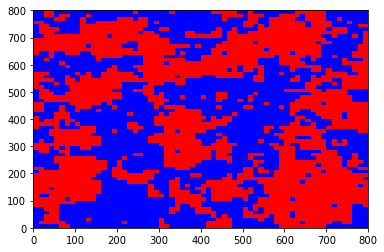

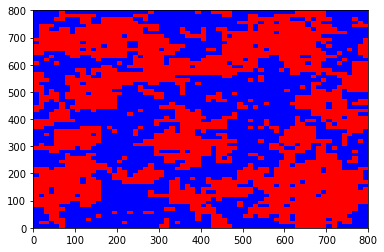

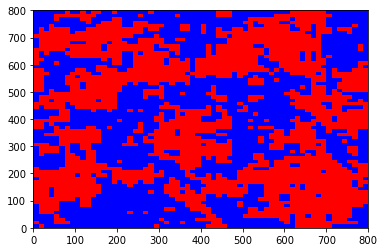

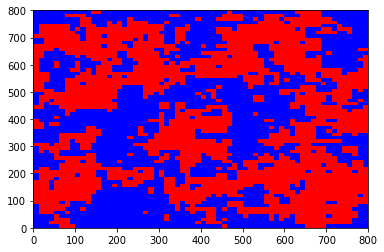

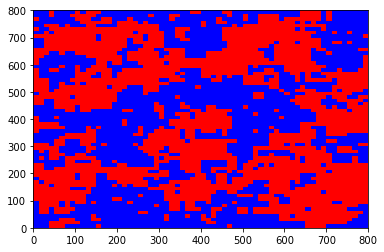

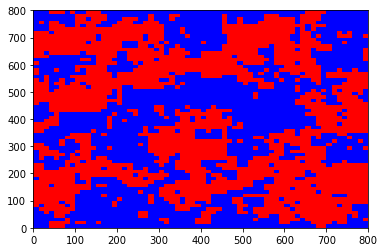

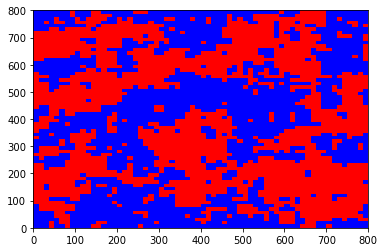

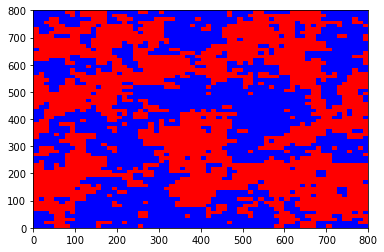

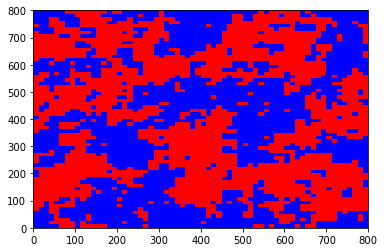

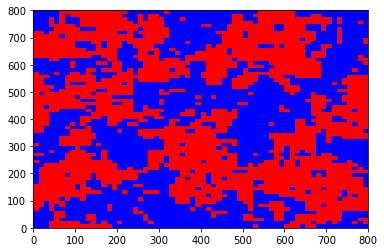

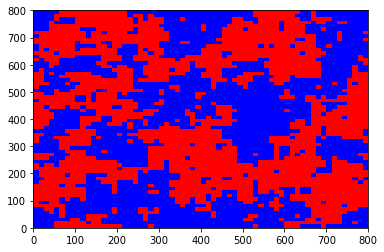

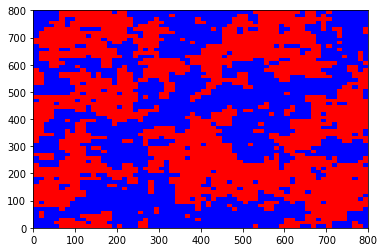

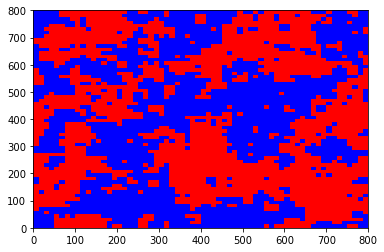

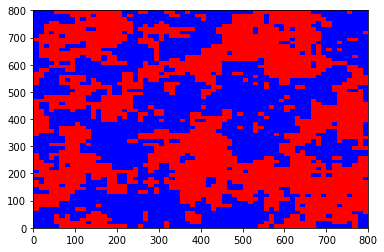

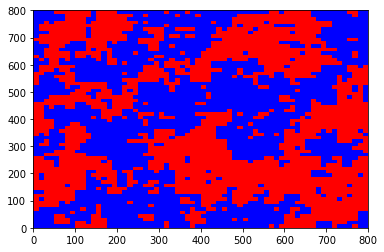

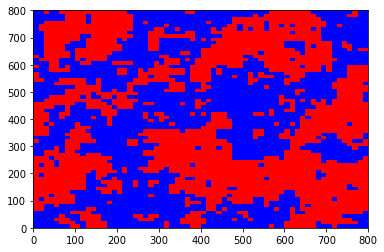

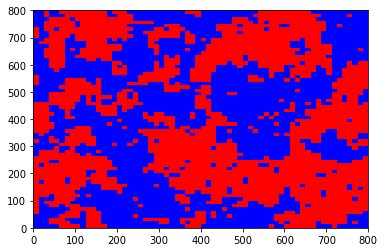

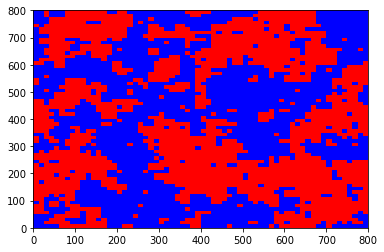

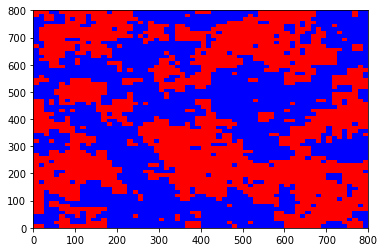

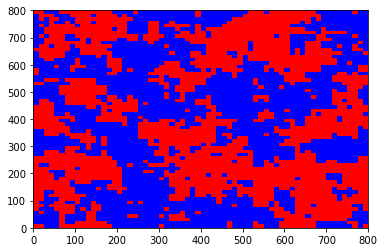

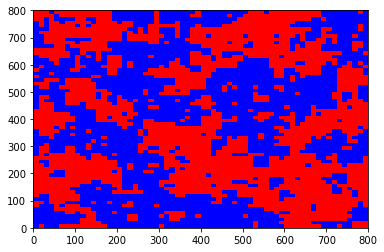

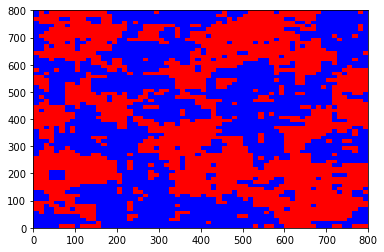

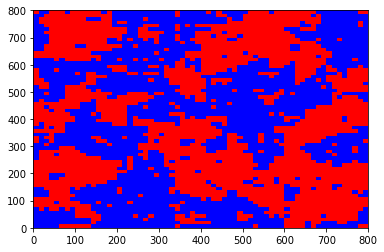

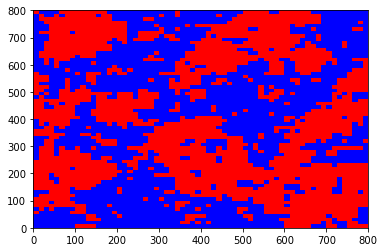

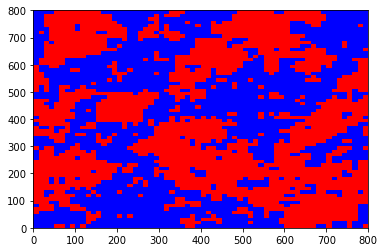

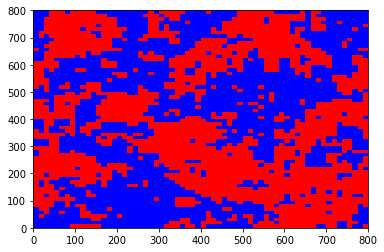

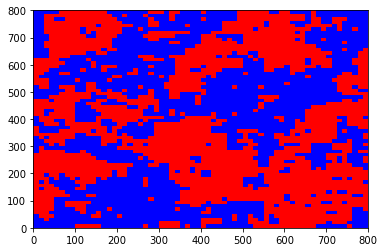

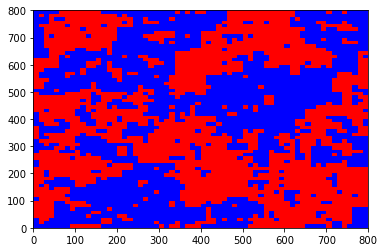

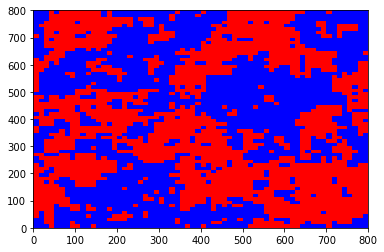

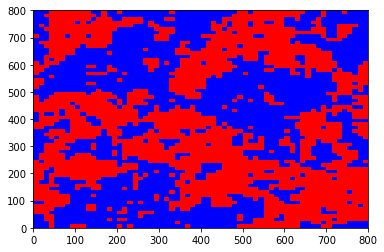

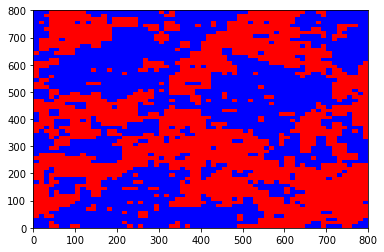

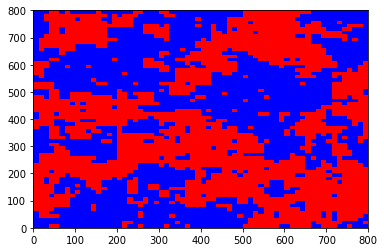

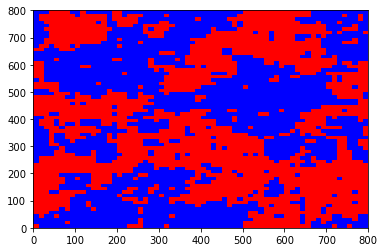

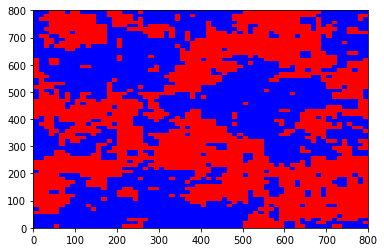

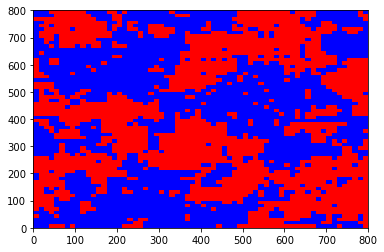

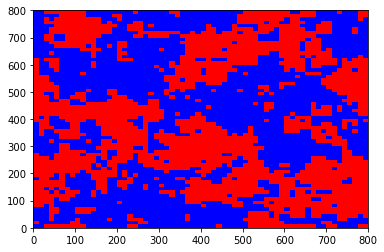

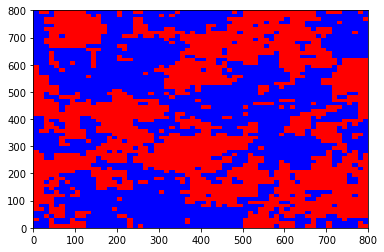

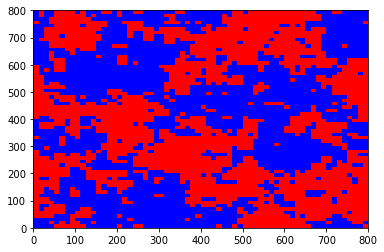

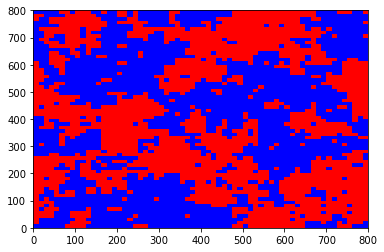

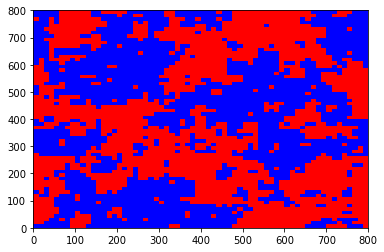

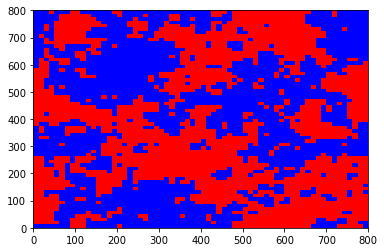

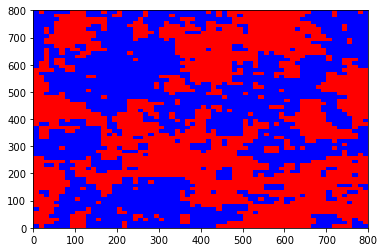

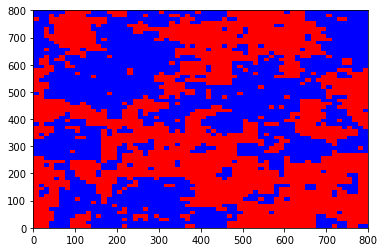

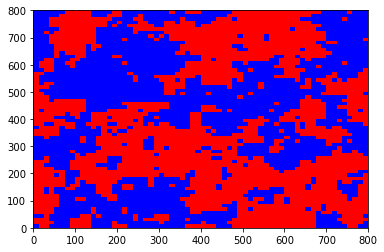

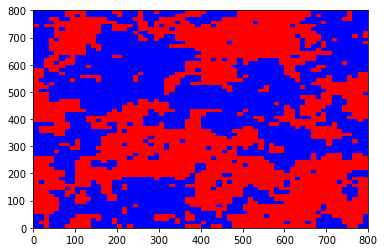

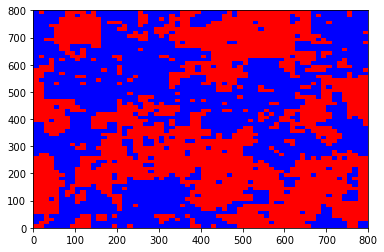

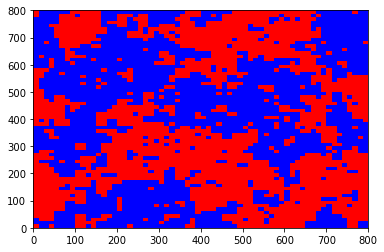

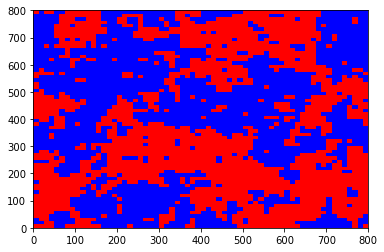

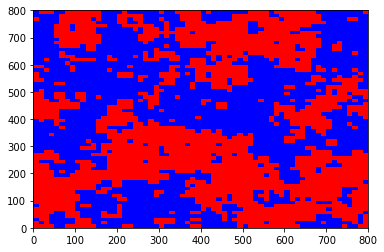

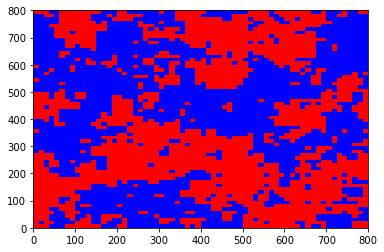

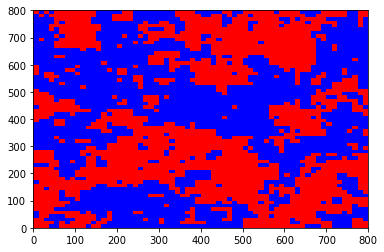

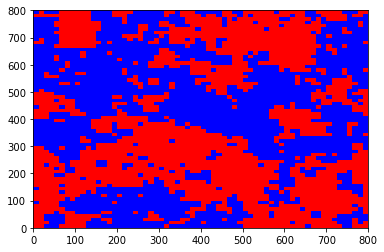

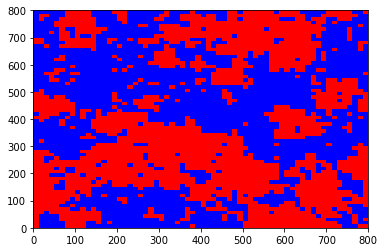

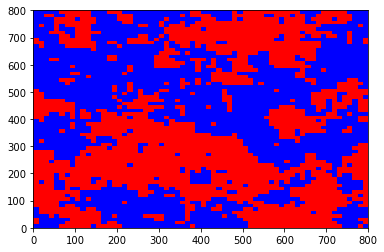

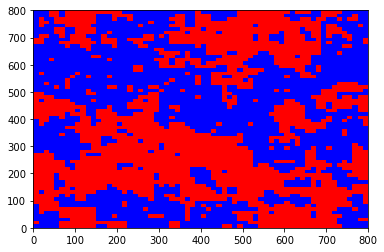

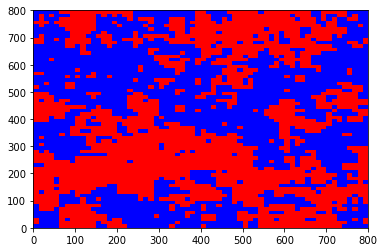

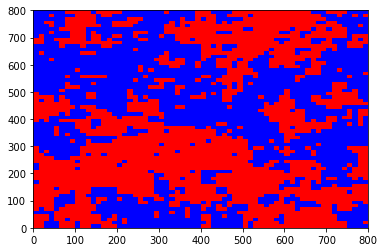

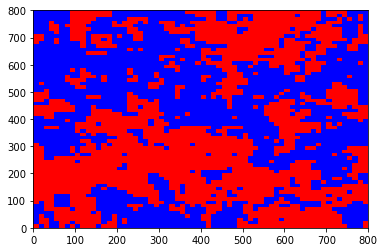

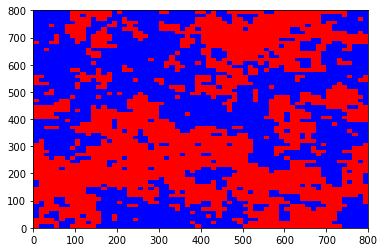

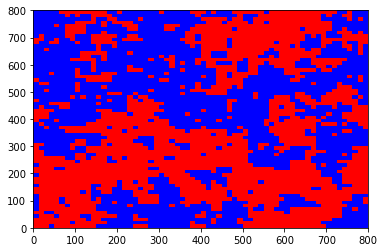

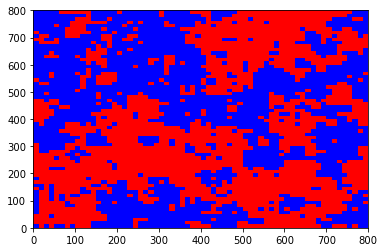

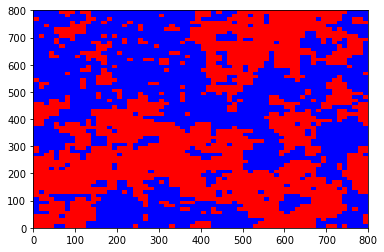

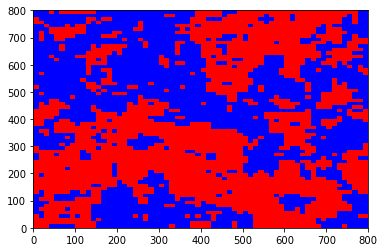

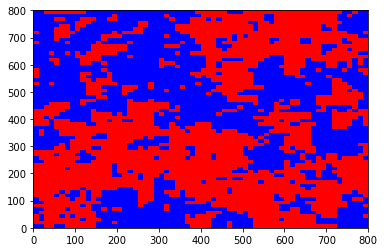

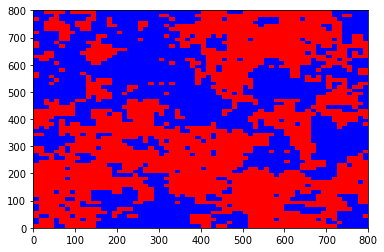

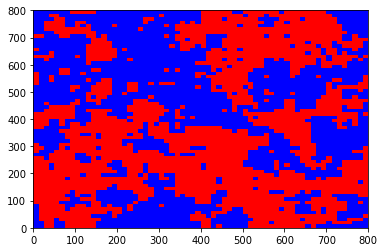

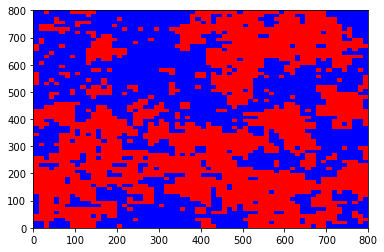

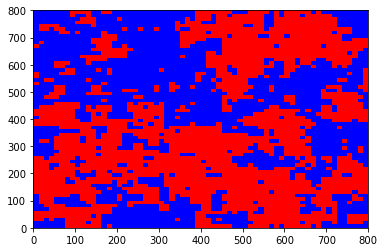

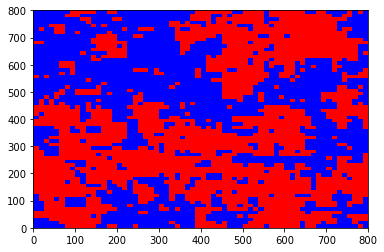

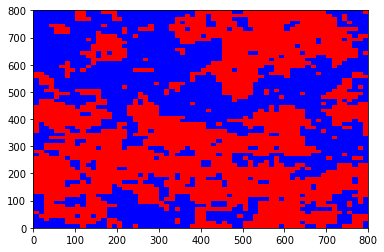

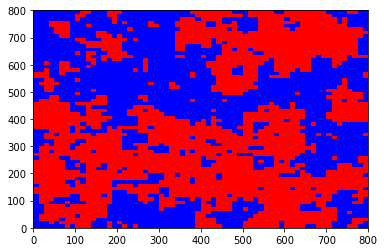

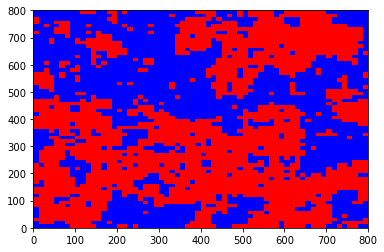

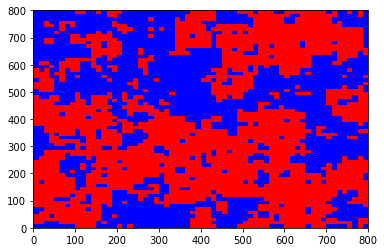

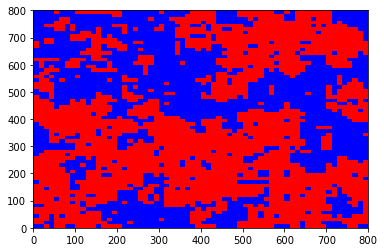

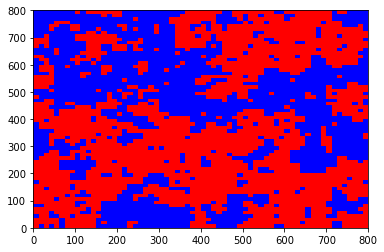

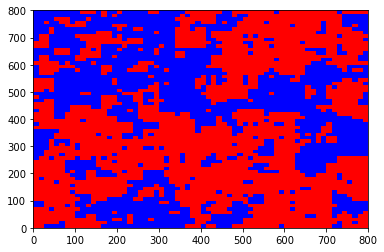

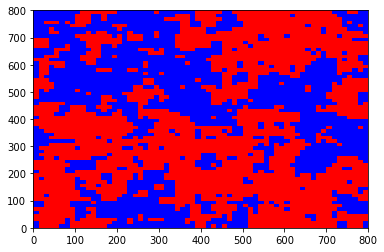

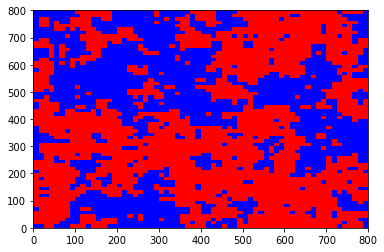

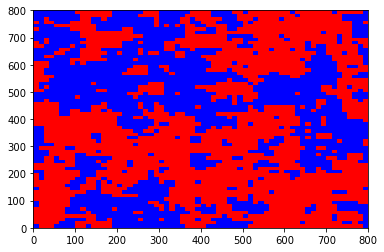

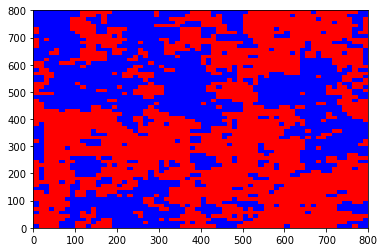

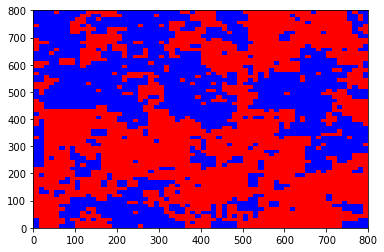

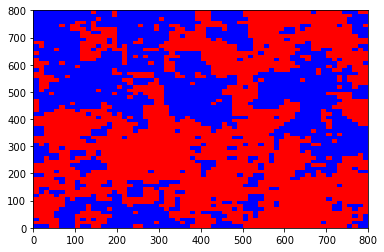

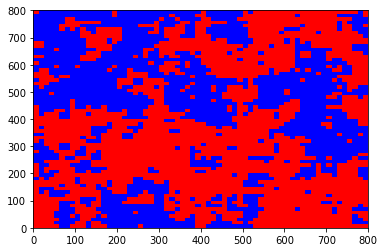

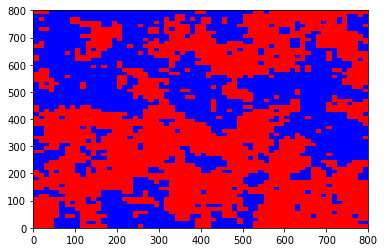

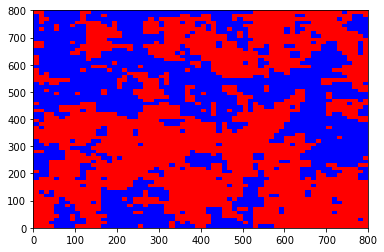

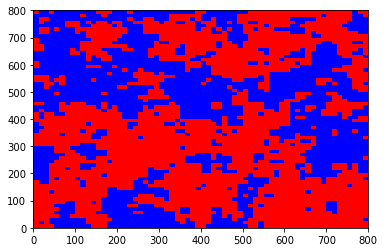

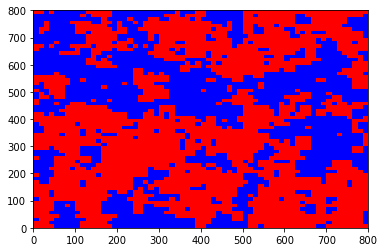

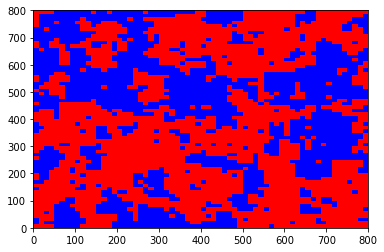

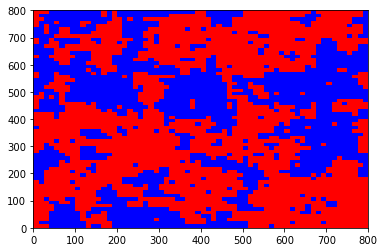

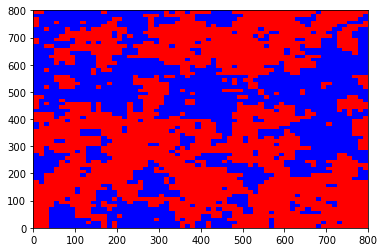

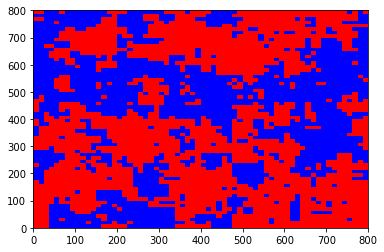

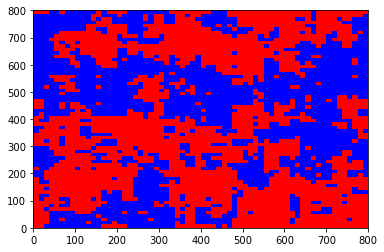

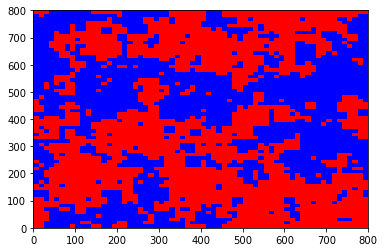

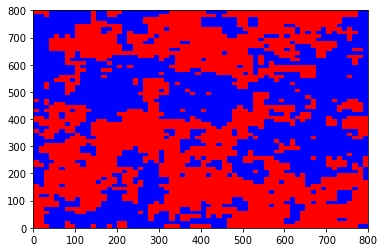

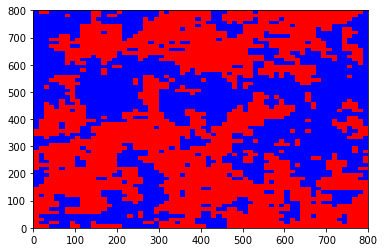

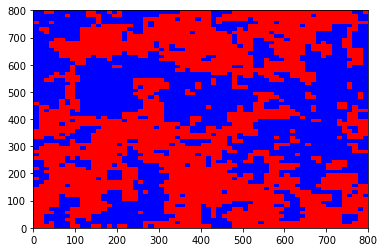

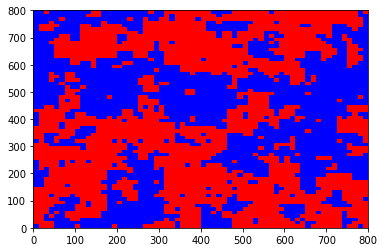

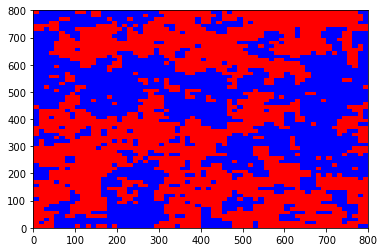

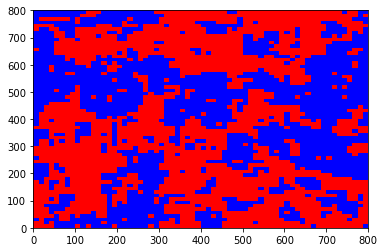

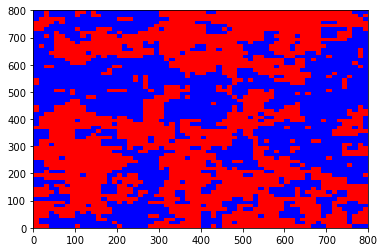

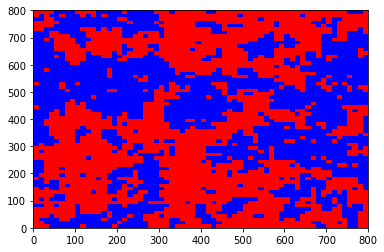

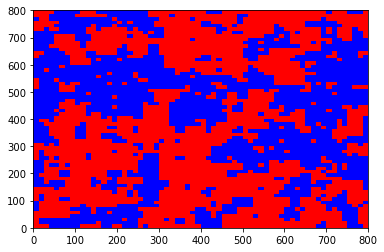

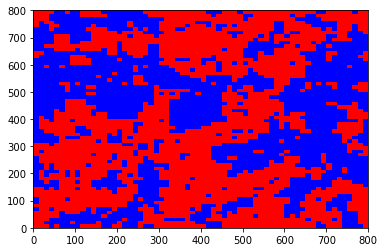

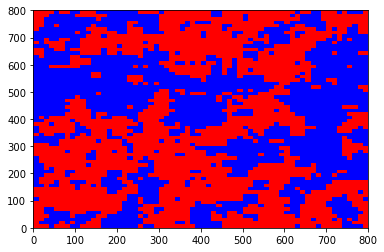

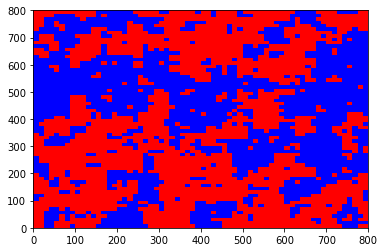

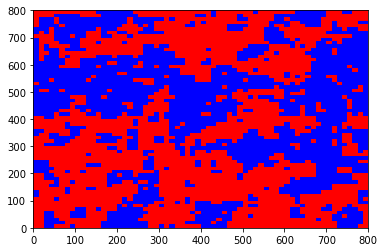

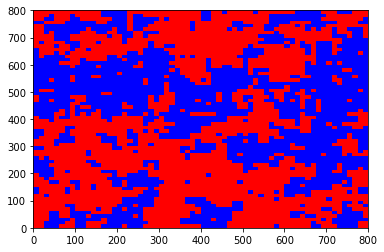

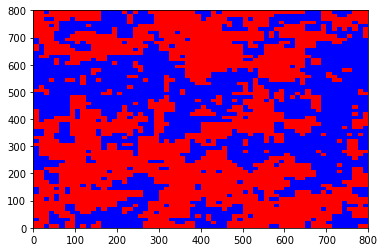

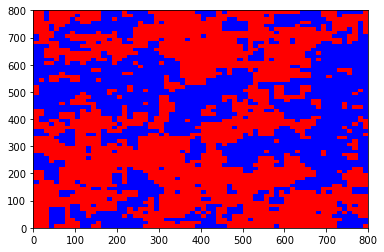

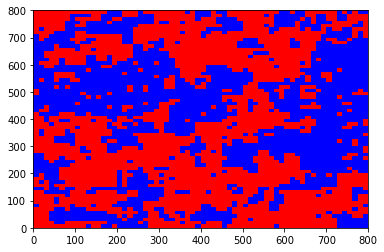

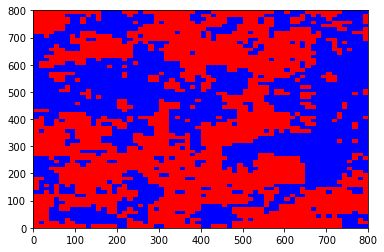

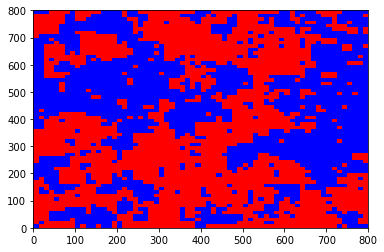

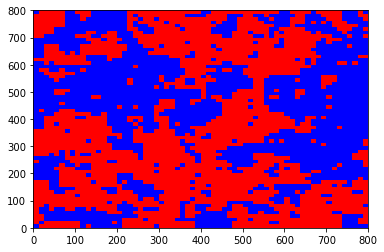

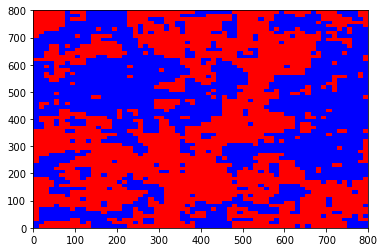

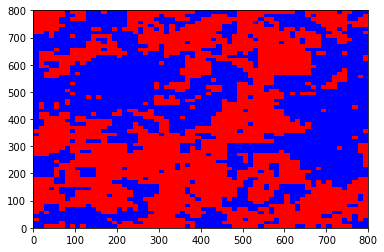

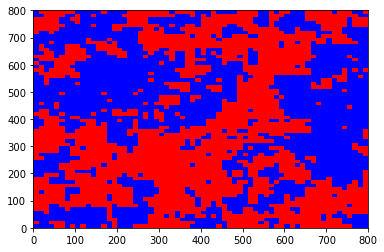

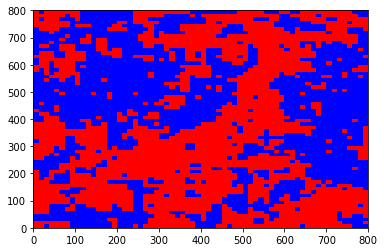

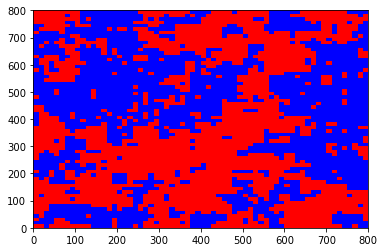

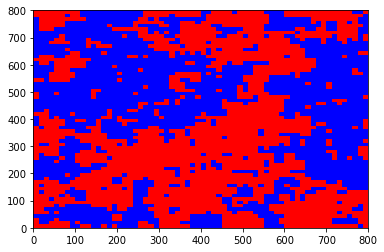

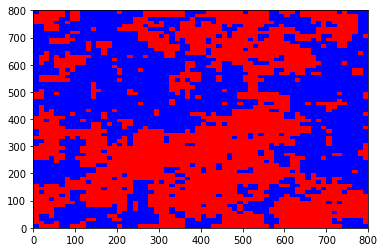

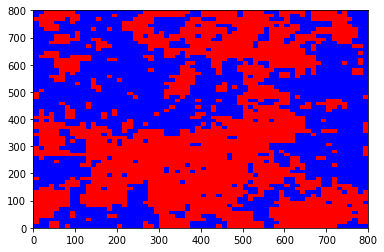

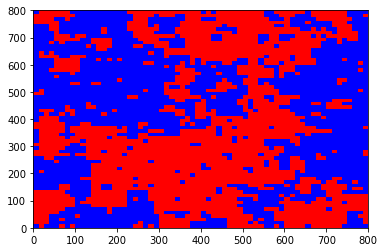

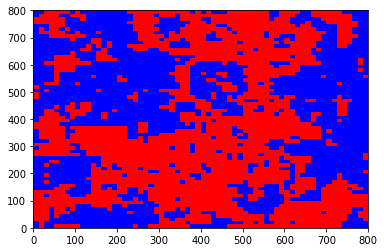

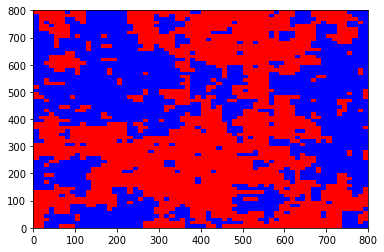

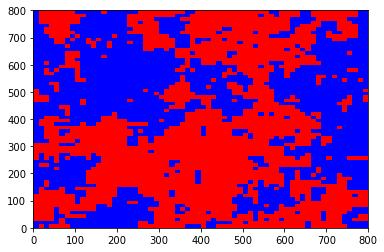

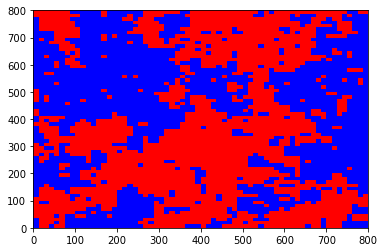

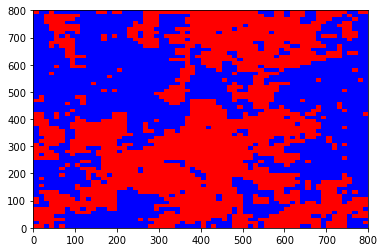

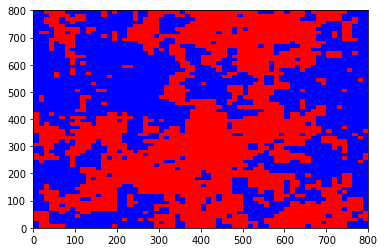

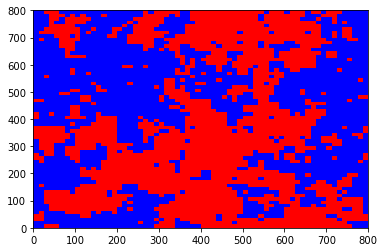

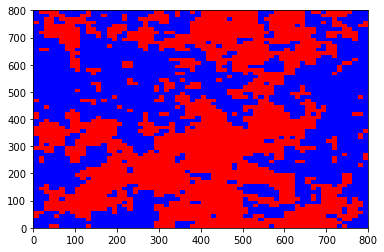

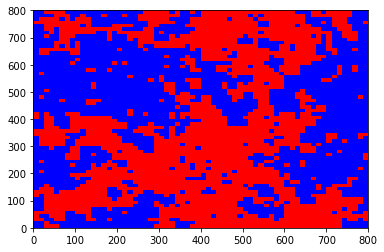

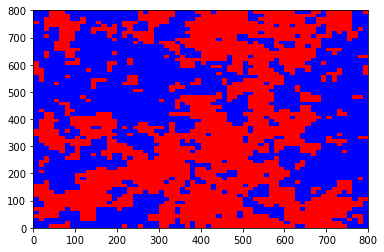

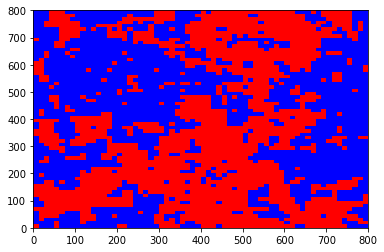

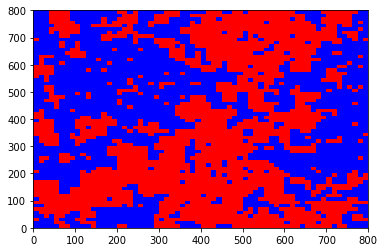

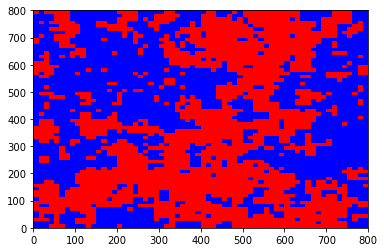

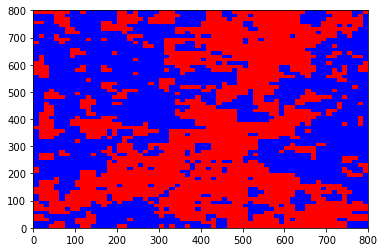

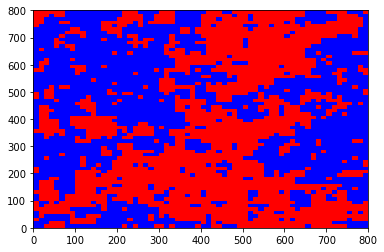

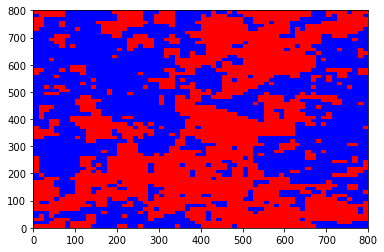

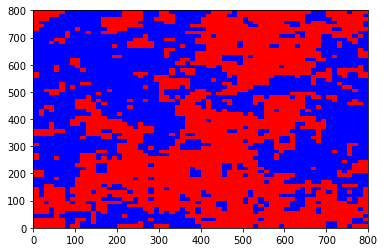

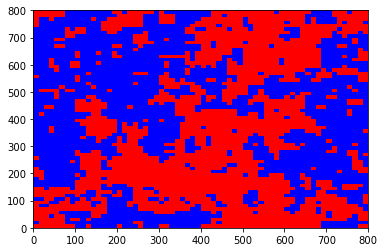

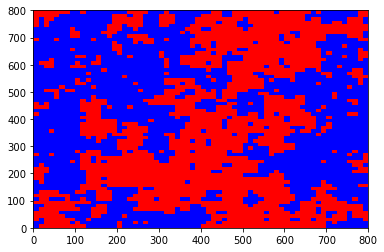

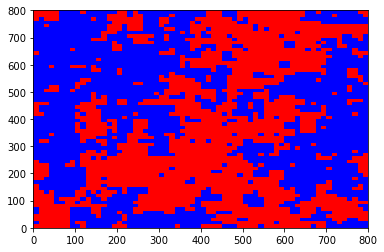

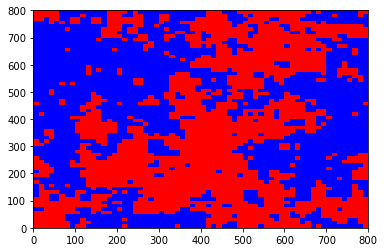

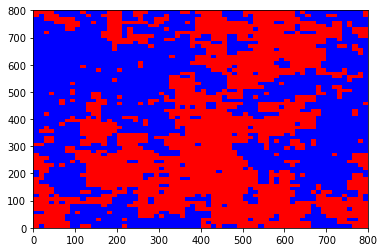

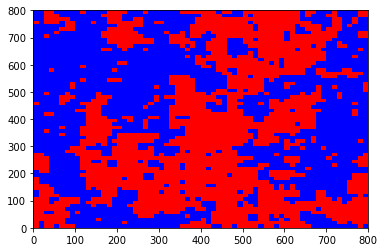

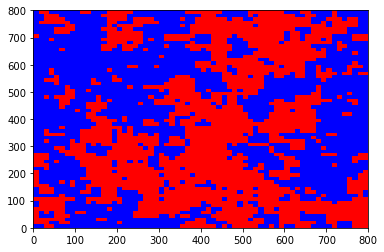

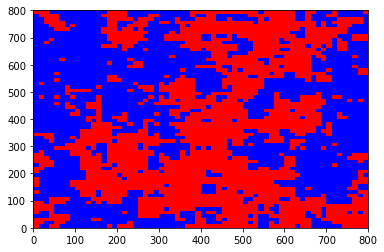

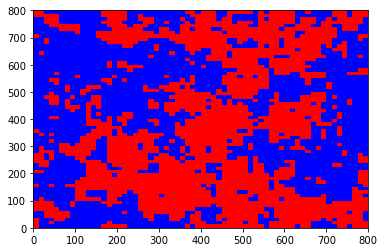

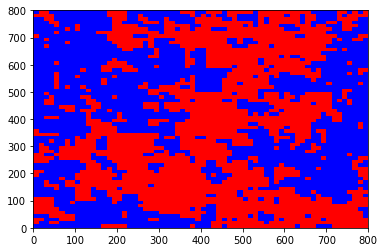

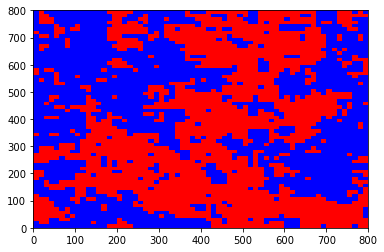

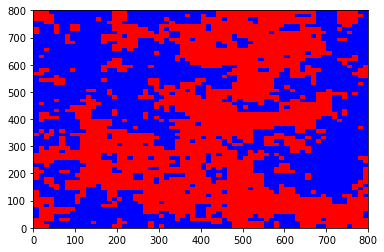

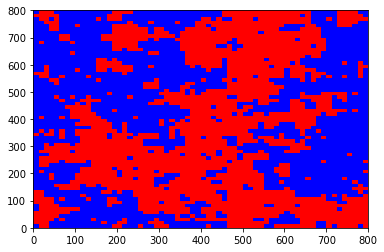

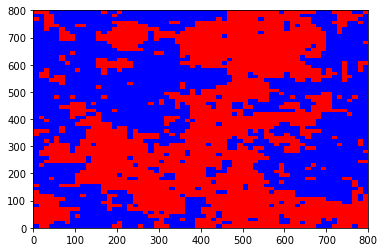

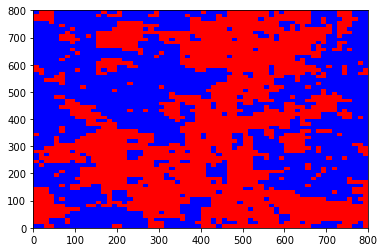

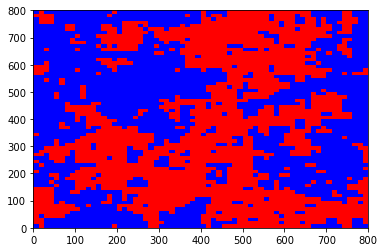

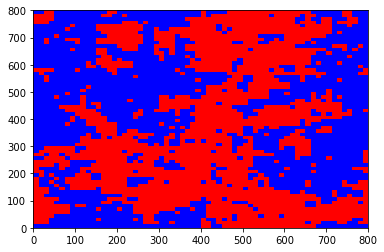

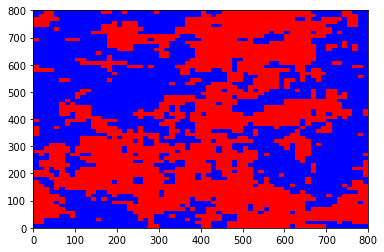

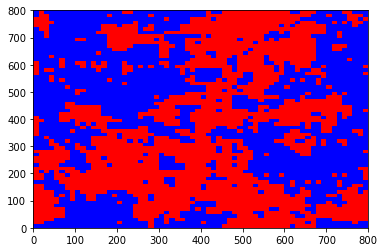

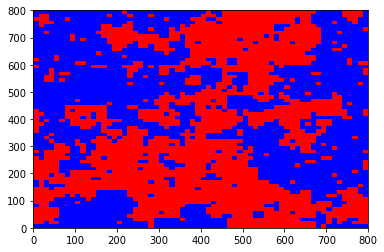

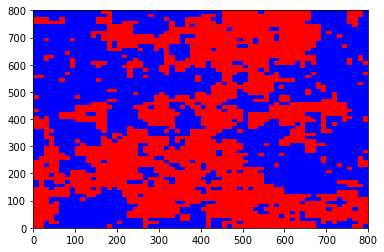

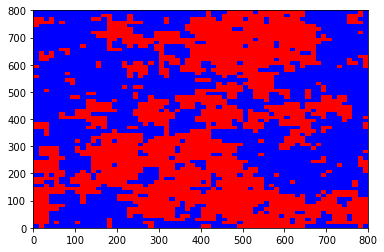

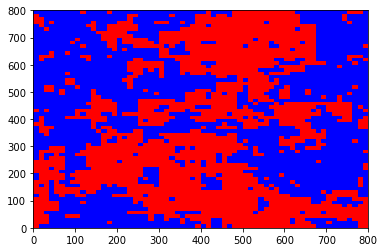

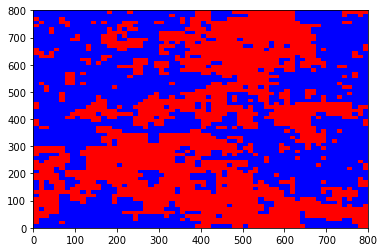

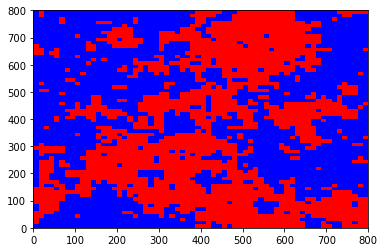

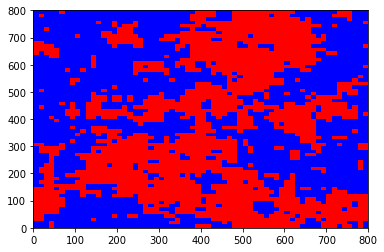

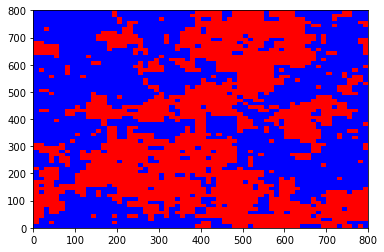

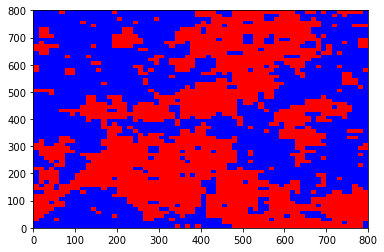

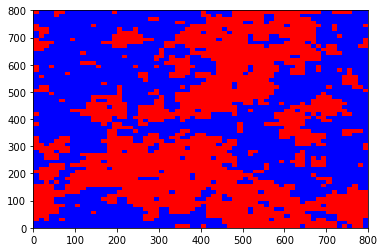

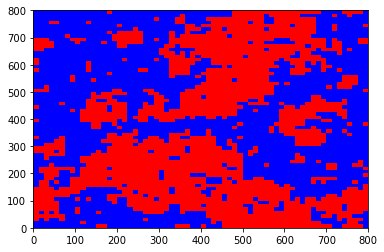

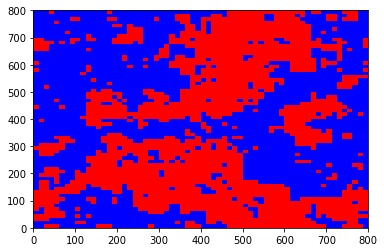

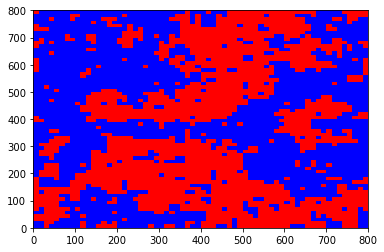

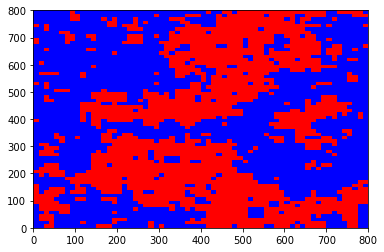

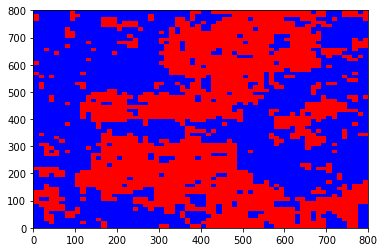

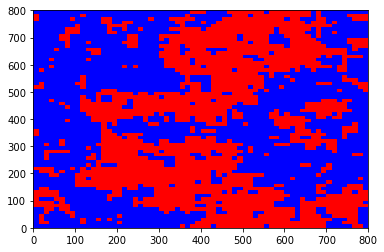

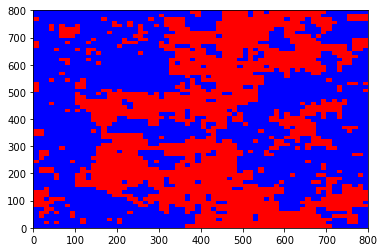

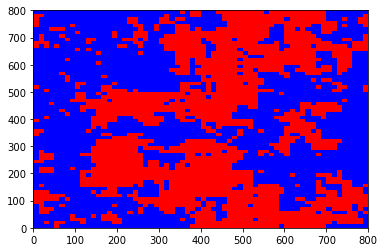

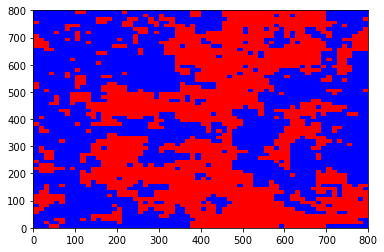

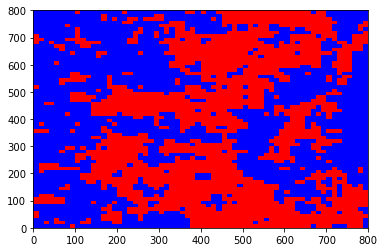

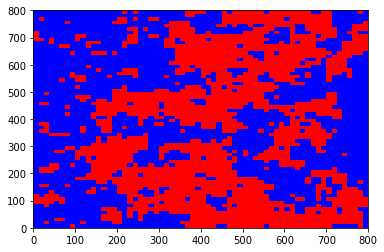

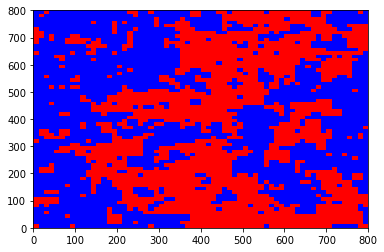

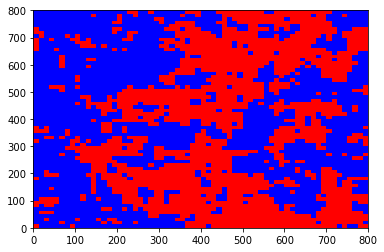

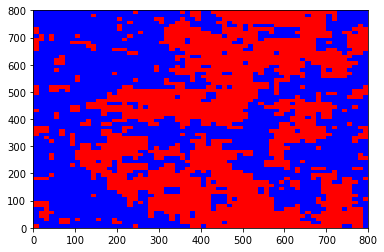

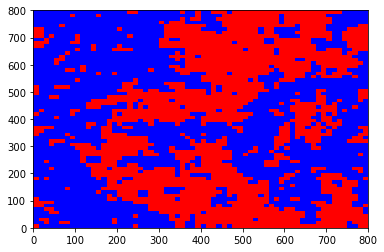

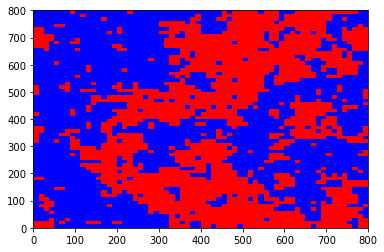

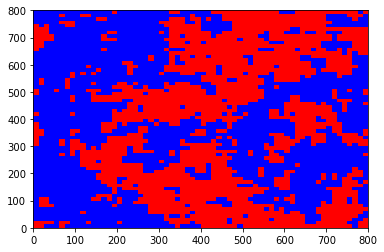

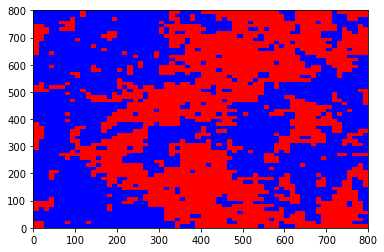

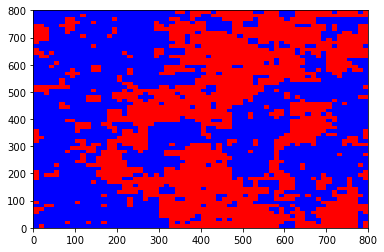

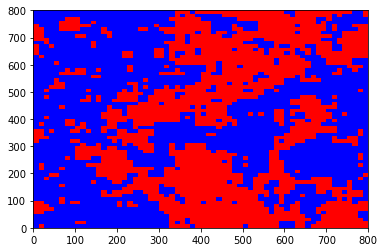

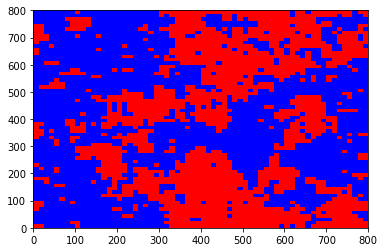

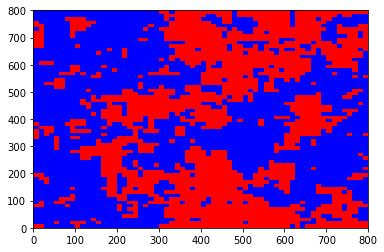

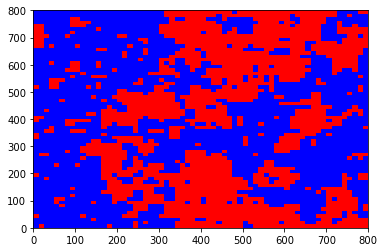

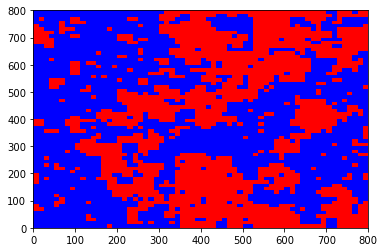

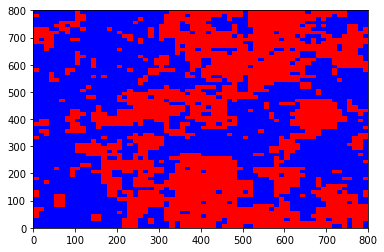

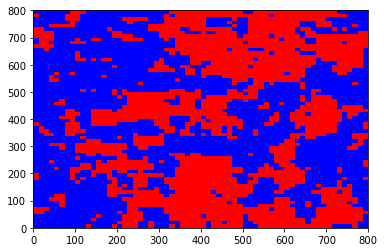

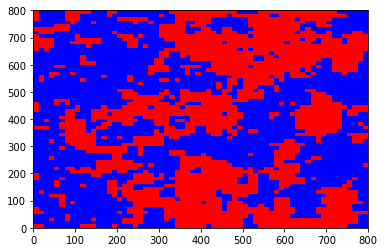

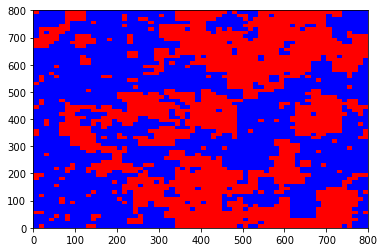

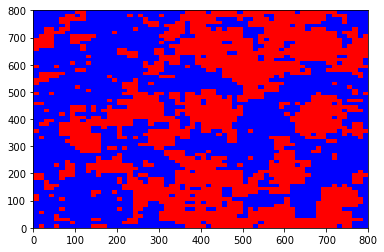

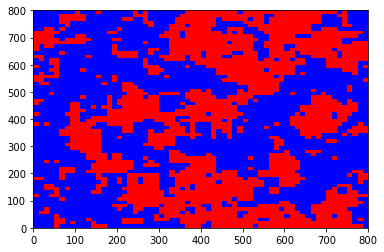

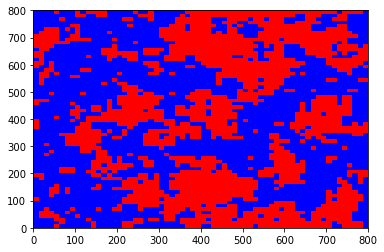

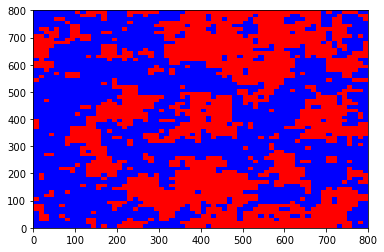

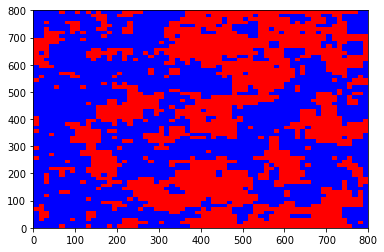

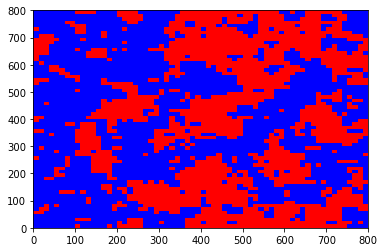

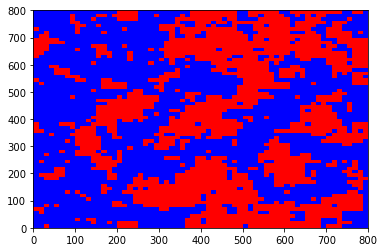

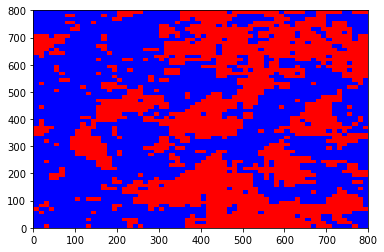

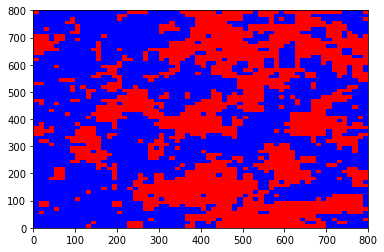

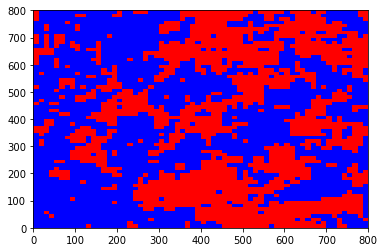

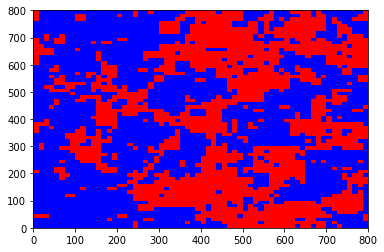

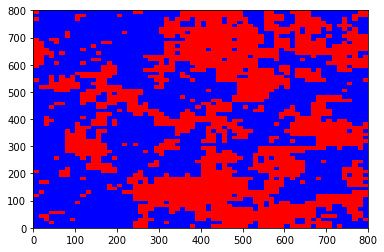

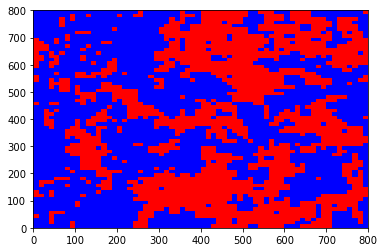

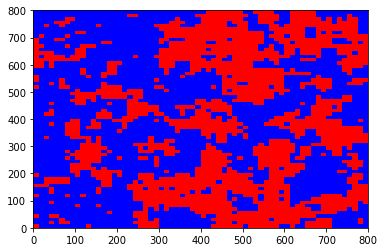

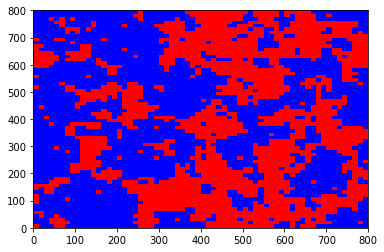

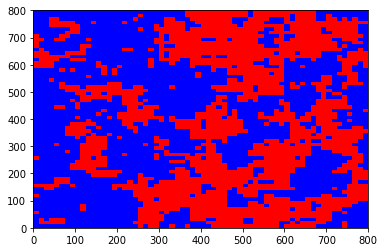

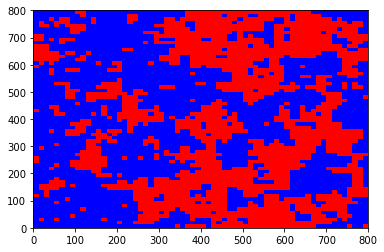

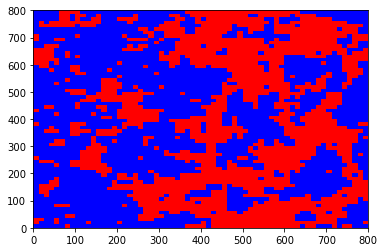

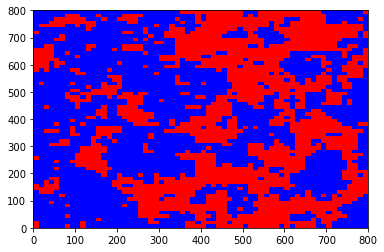

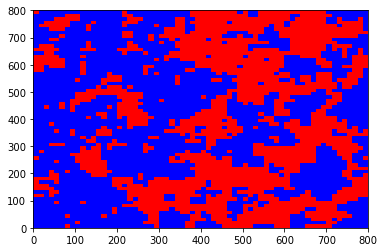

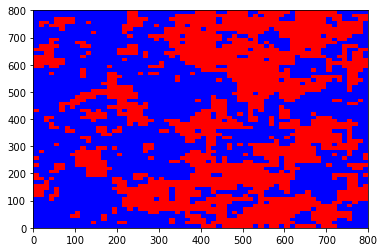

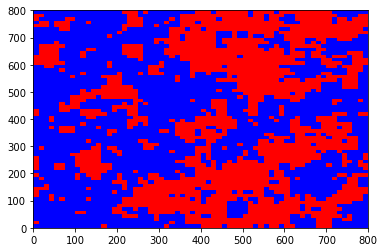

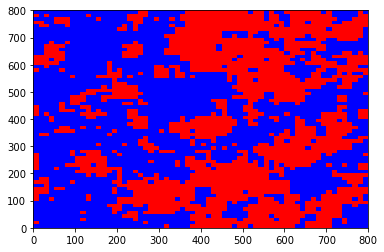

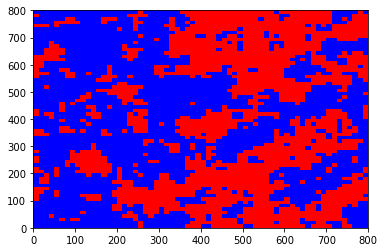

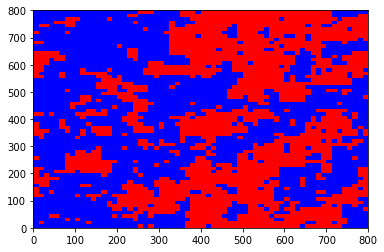

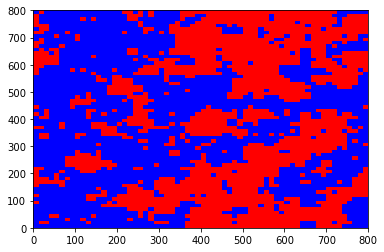

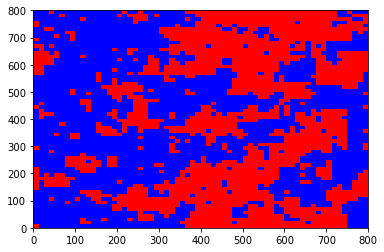

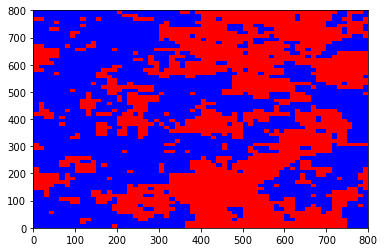

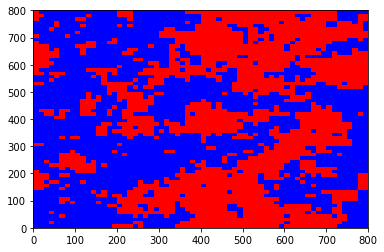

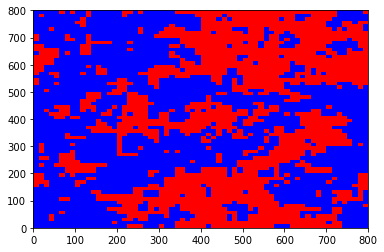

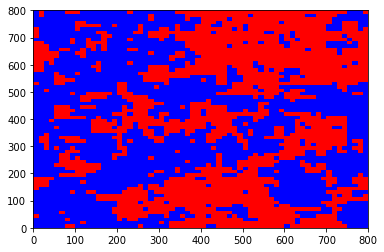

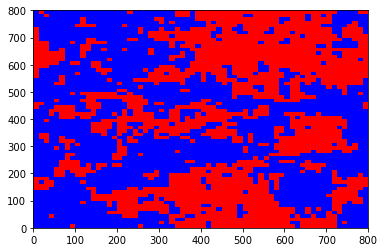

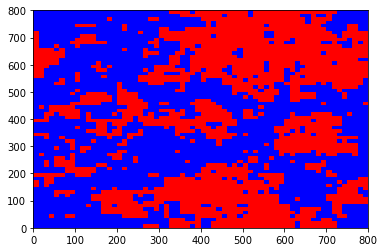

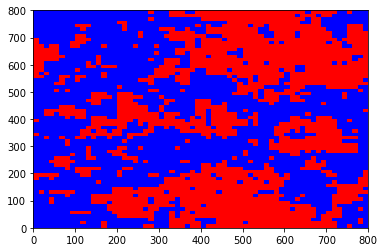

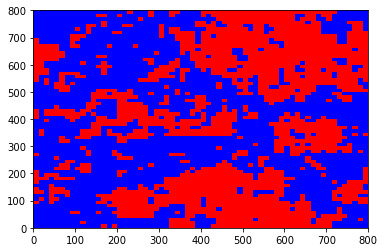

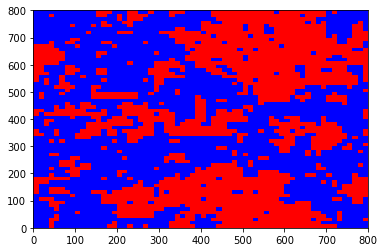

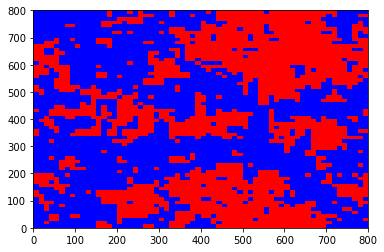

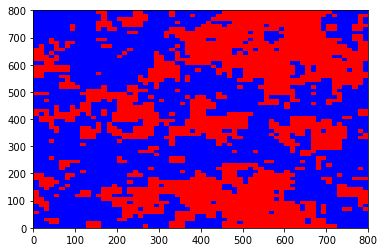

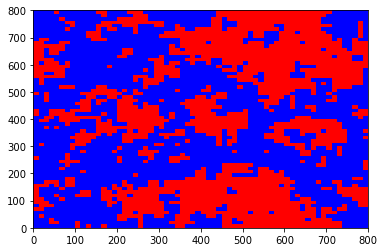

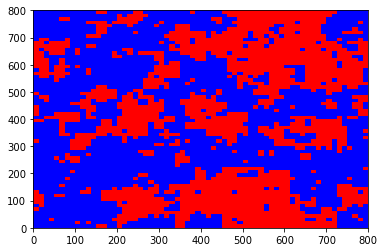

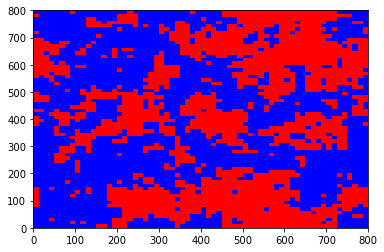

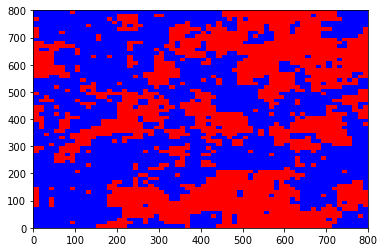

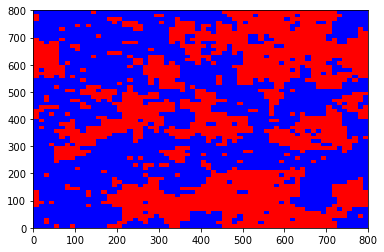

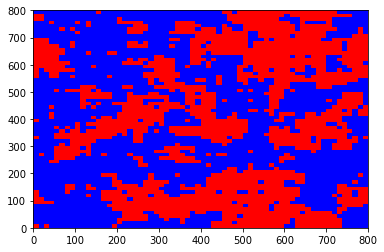

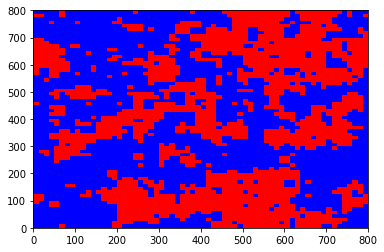

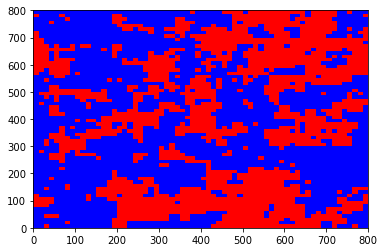

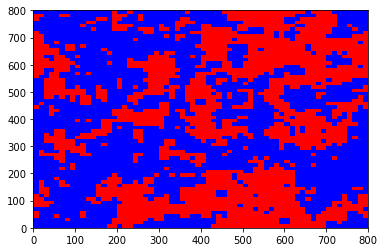

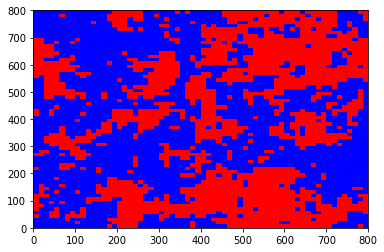

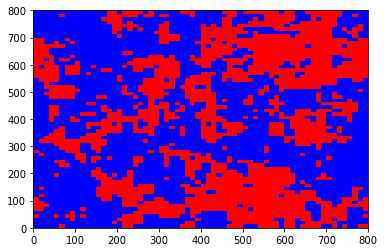

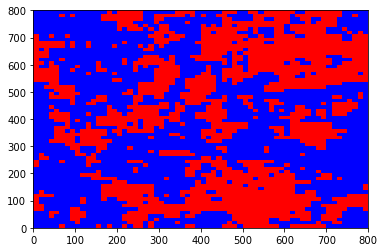

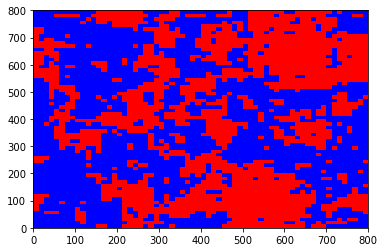

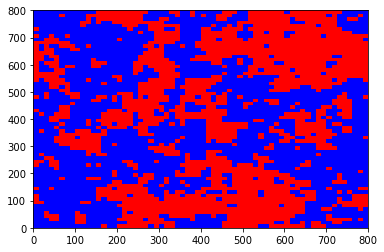

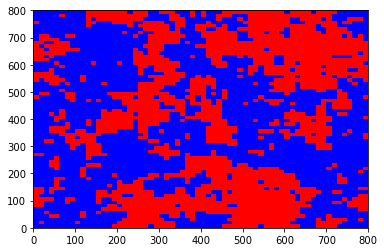

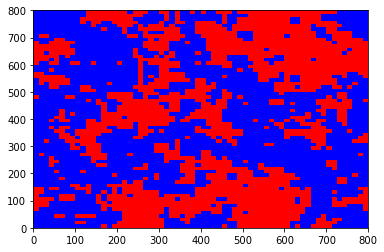

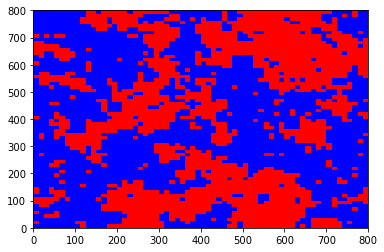

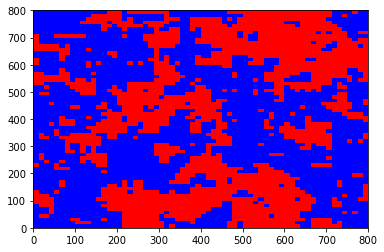

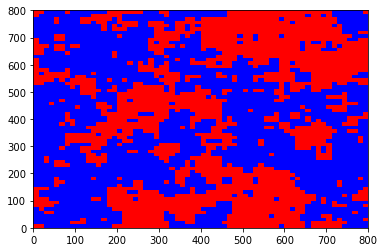

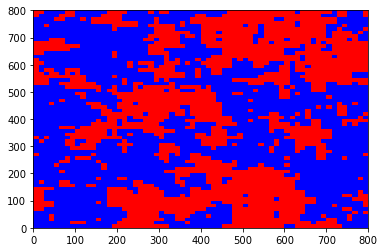

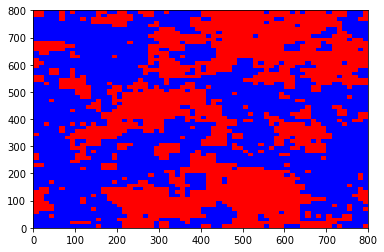

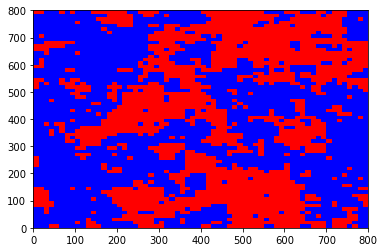

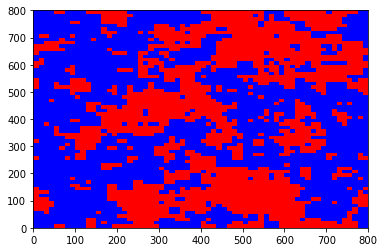

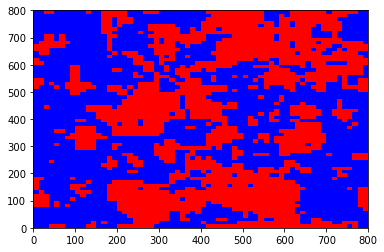

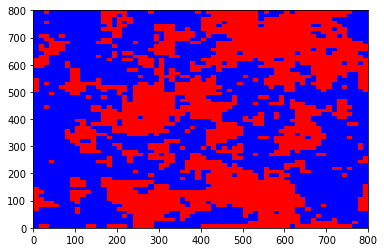

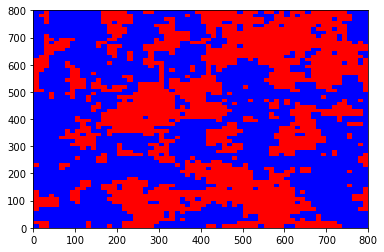

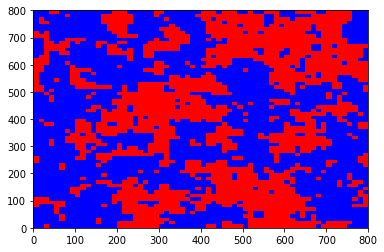

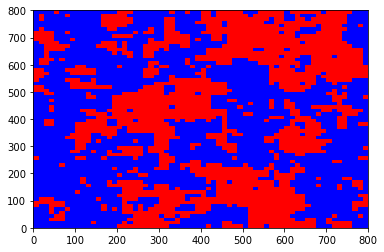

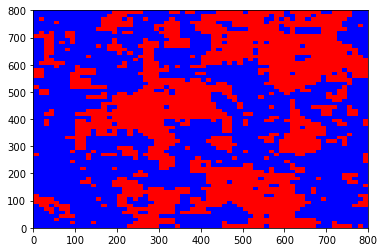

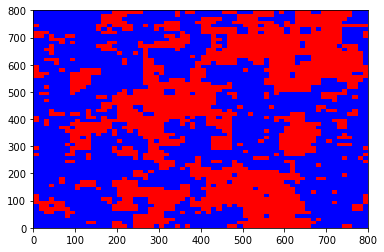

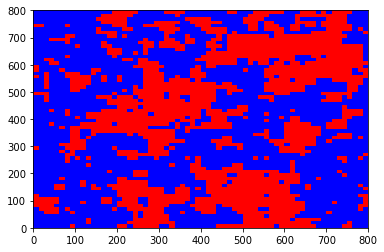

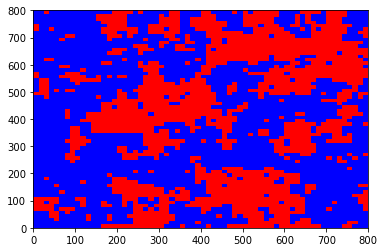

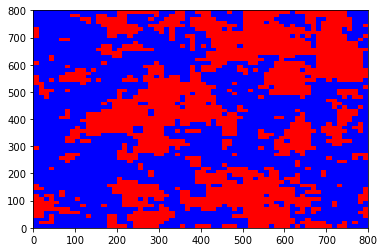

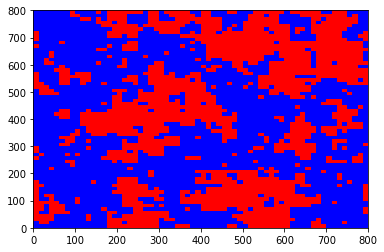

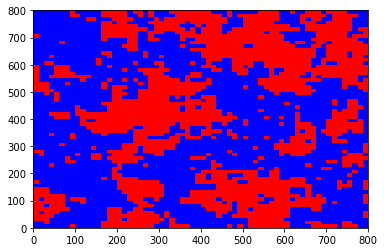

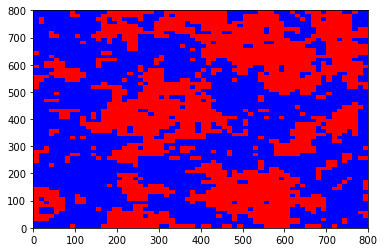

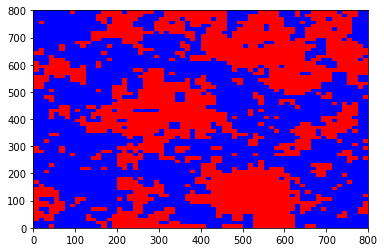

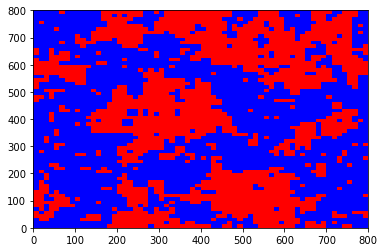

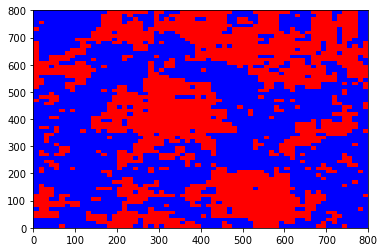

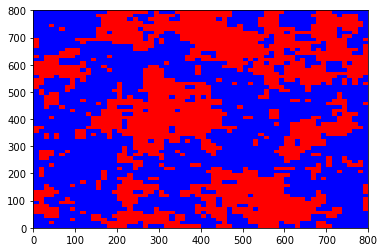

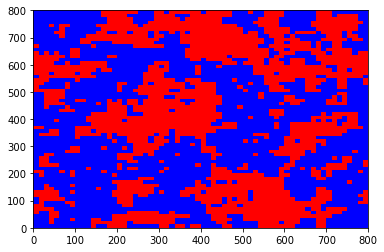

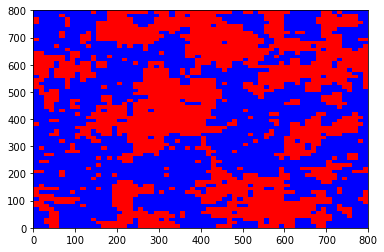

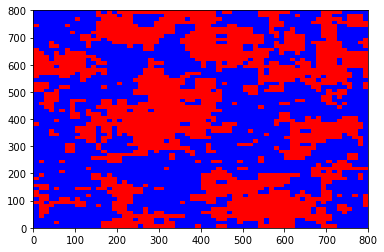

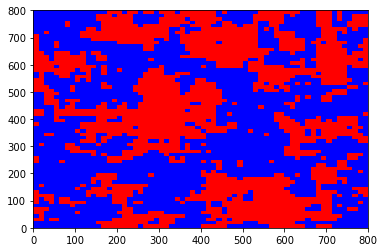

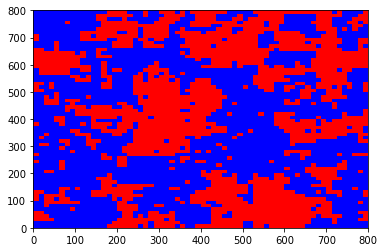

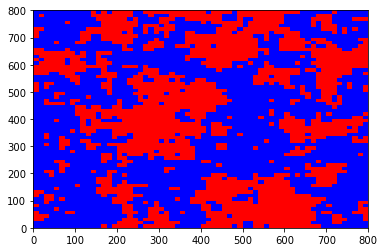

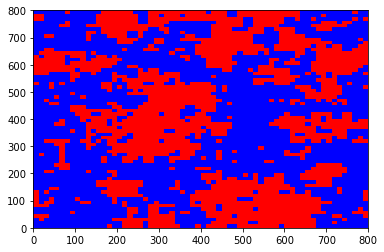

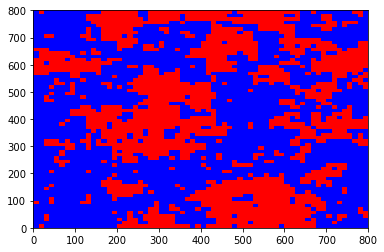

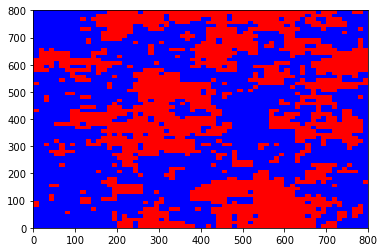

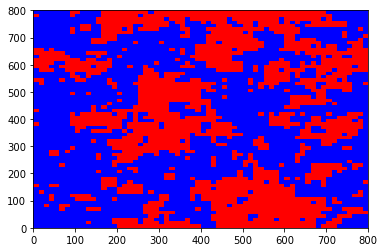

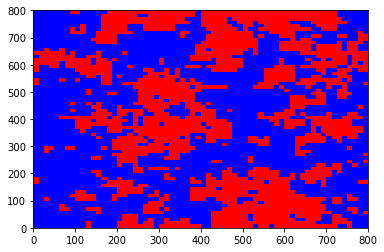

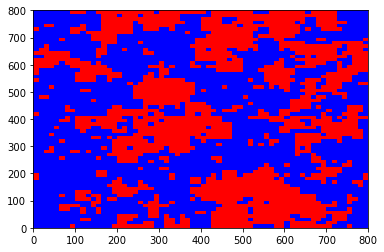

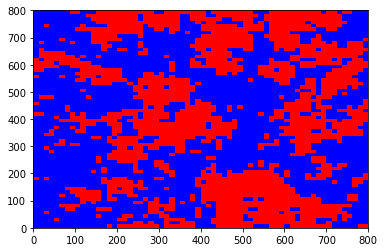

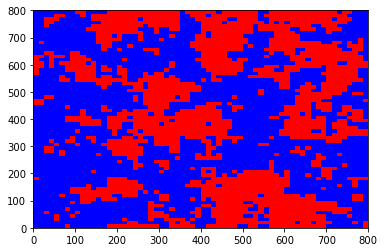

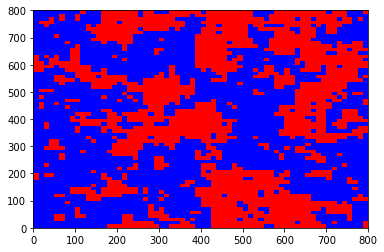

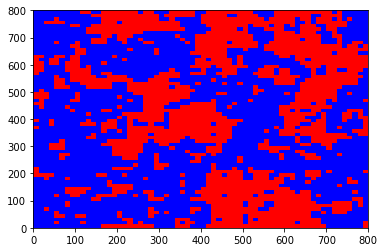

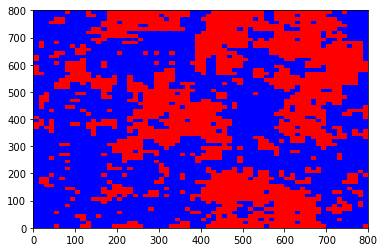

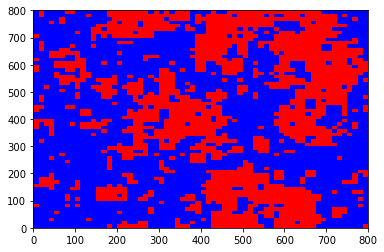

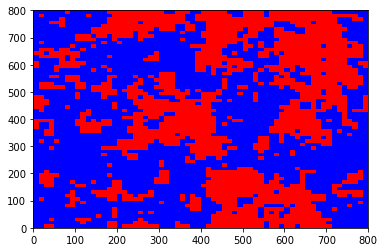

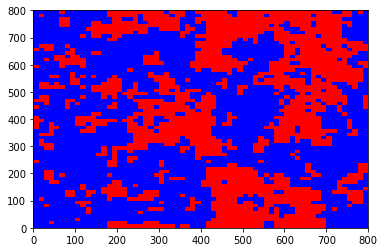

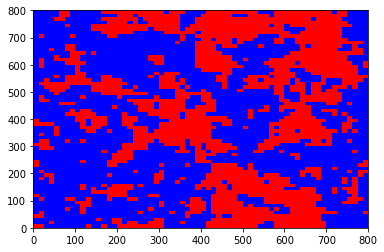

<Figure size 432x288 with 0 Axes>

In [4]:
def monteCarlo():
    isingSpins.Sweep()
    isingSpins.Display()

plt.ion()
for _ in range(1000):  # Simulate for a certain number of sweeps
    monteCarlo()

plt.ioff()
plt.show()